In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

In [2]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve,mean_squared_error
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df.head()

serial number account_info  duration_month Loan Regularity Purpose  \
0              1       BRONZE               6  YES         NO     A40   
1              2       SILVER              48  YES        YES     A40   
2              3          NaN              12  YES         NO     A46   
3              4       BRONZE              42  YES        YES     A40   
4              5       BRONZE              24  YES         NO     A40   

   credit_amount savings_account  Saving Account employment_st  ...  \
0           1169             A65             NaN           A75  ...   
1           5951             A61            72.0           A73  ...   
2           2096             A61            68.0           A74  ...   
3           7882             A61            73.0           A74  ...   
4           4870             A61            52.0           A73  ...   

   resident_since  property_type age installment_type housing_type  \
0               4           A121  67             A143         A152   
1               2           A121  22             A143         A152   
2               3           A121  49             A143         A152   
3               4           A122  45             A143         A153   
4               4           A124  53             A143         A153   

   credits_no job_type  liables telephone foreigner  
0           2     A173        1      A192      A201  
1           1     A173        1      A191      A201  
2           1     A172        2      A191      A201  
3           1     A173        2      A191      A201  
4           2     A173        2      A191      A201  

[5 rows x 25 columns]

In [4]:
df.isna().sum()/len(df)

serial number       0.000000
account_info        0.390000
duration_month      0.000000
Loan                0.000000
Regularity          0.000000
Purpose             0.000000
credit_amount       0.000000
savings_account     0.000000
Saving Account      0.171429
employment_st       0.000000
Salary              0.000000
investment          0.000000
Gender              0.000000
Status              0.000000
gurantors           0.000000
resident_since      0.000000
property_type       0.000000
age                 0.000000
installment_type    0.000000
housing_type        0.000000
credits_no          0.000000
job_type            0.000000
liables             0.000000
telephone           0.000000
foreigner           0.000000
dtype: float64

In [5]:
### since savings_account is a codified representation of Saving_Account hence we can drop Saving Account

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

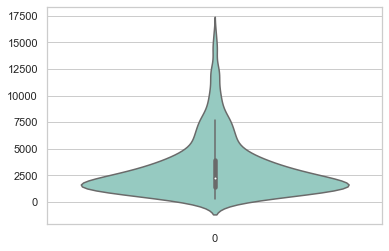

In [7]:
#plotting a boxplot of credit_amount to see its distribution


sns.set(style="whitegrid")

sns.violinplot(data=df['credit_amount'], palette="Set3",label=True)

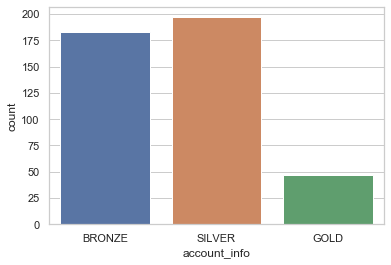

In [8]:
# let us also check the distribution of values in account_info by plotting a count plot

ax = sns.countplot(x="account_info", data=df)


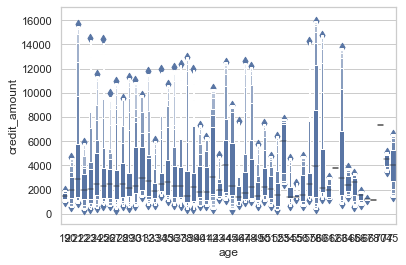

In [9]:
# lets check agewise distribution of credit

sns.boxenplot(x="age", y="credit_amount",
              color="b",scale="area", data=df,linewidth=2.5)

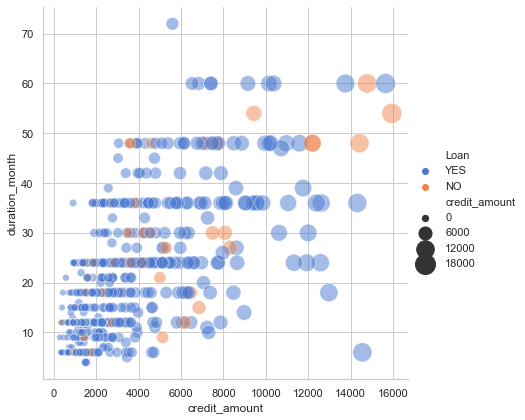

In [10]:
#plotting the distribution of credit basis the duration and loan taken or not

sns.relplot(x="credit_amount", y="duration_month", hue="Loan", size="credit_amount",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

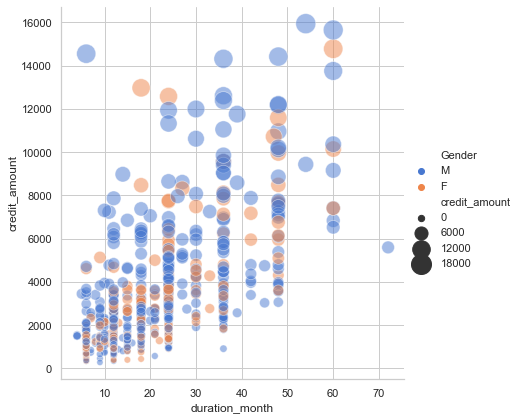

In [11]:
#plotting the distribution of credit basis the duration and gender 

sns.relplot(y="credit_amount", x="duration_month", hue="Gender", size="credit_amount",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

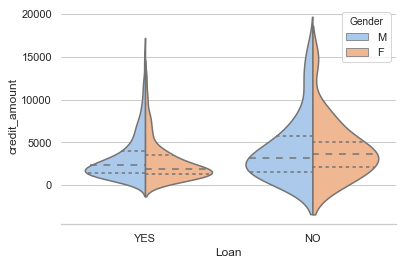

In [12]:
# lets plot some boxplots to check the median distribution of credit amount basis gender

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="Loan", y="credit_amount", hue="Gender",
               split=True, inner="quart",
               data=df)
sns.despine(left=True)

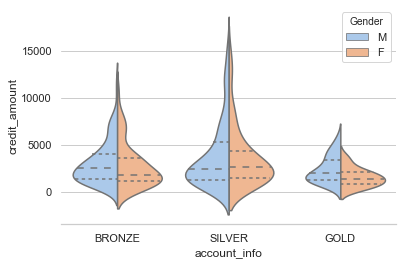

In [13]:
# lets check the impact of account type on credit amount wrt gender

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="account_info", y="credit_amount", hue="Gender",
               split=True, inner="quart",
               data=df)
sns.despine(left=True)

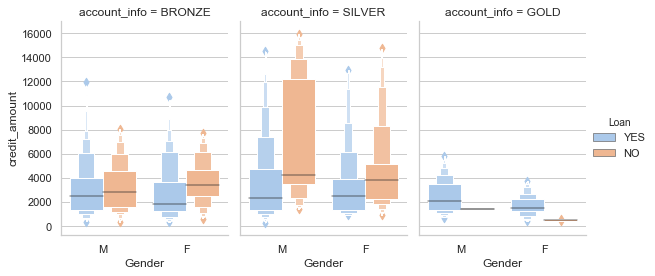

In [14]:
# lets try to see the credit amount value as ber the account type and wrt gender basis loan taken or not

g = sns.catplot(x="Gender", y="credit_amount",
                hue="Loan", col="account_info",
                data=df, kind="boxen",
                height=4, aspect=.7);

In [15]:
# lets drop Saving Account from Data

df = df.drop(columns=['Saving Account'])

In [16]:
# lets identify the NAN account types
df[df['account_info'].isna()]

serial number account_info  duration_month Loan Regularity Purpose  \
2                3          NaN              12  YES         NO     A46   
5                6          NaN              36  YES        YES     A46   
6                7          NaN              24  YES        YES     A40   
8                9          NaN              12  YES        YES     A40   
16              17          NaN              24  YES         NO     A40   
..             ...          ...             ...  ...        ...     ...   
688            689          NaN               9  YES        YES     A40   
694            695          NaN              24  YES        YES     A40   
695            696          NaN               6  YES        YES     A40   
697            698          NaN              12  YES         NO     A40   
698            699          NaN              18  YES         NO     A40   

     credit_amount savings_account employment_st  Salary  ...  resident_since  \
2             2096             A61           A74    2078  ...               3   
5             9055             A65           A73    2363  ...               4   
6             2835             A63           A75    1567  ...               4   
8             3059             A64           A74    1891  ...               4   
16            2424             A65           A75     760  ...               4   
..             ...             ...           ...     ...  ...             ...   
688           2753             A62           A75    1418  ...               4   
694           2284             A61           A74    1037  ...               2   
695           1236             A63           A73    2198  ...               4   
697            926             A61           A71    3469  ...               2   
698           1800             A61           A73    1138  ...               2   

    property_type age installment_type  housing_type credits_no  job_type  \
2            A121  49             A143          A152          1      A172   
5            A124  35             A143          A153          1      A172   
6            A122  53             A143          A152          1      A173   
8            A121  61             A143          A152          1      A172   
16           A122  53             A143          A152          2      A173   
..            ...  ..              ...           ...        ...       ...   
688          A123  35             A143          A152          1      A173   
694          A123  28             A143          A152          1      A173   
695          A122  50             A143          A151          1      A173   
697          A122  38             A143          A152          1      A171   
698          A123  24             A143          A152          2      A173   

    liables telephone  foreigner  
2         2      A191       A201  
5         2      A192       A201  
6         1      A191       A201  
8         1      A191       A201  
16        1      A191       A201  
..      ...       ...        ...  
688       1      A192       A201  
694       1      A192       A201  
695       1      A191       A201  
697       1      A191       A201  
698       1      A191       A201  

[273 rows x 24 columns]

In [17]:
## converting Categorical Data into proper forms except account_info
list1 =['Loan', 'Regularity',
       'Purpose', 'savings_account', 'employment_st',
        'investment', 'Gender', 'Status', 'gurantors',
        'property_type',  'installment_type',
       'housing_type', 'job_type',  'telephone',
       'foreigner']

for col in list1:
    df[col] = df[col].astype('category')


In [18]:
for col in list1:
    df[col] = df[col].cat.codes

In [19]:
df

serial number account_info  duration_month  Loan  Regularity  Purpose  \
0                1       BRONZE               6     1           0        0   
1                2       SILVER              48     1           1        0   
2                3          NaN              12     1           0        2   
3                4       BRONZE              42     1           1        0   
4                5       BRONZE              24     1           0        0   
..             ...          ...             ...   ...         ...      ...   
695            696          NaN               6     1           1        0   
696            697       SILVER              12     1           1        0   
697            698          NaN              12     1           0        0   
698            699          NaN              18     1           0        0   
699            700         GOLD              15     1           1        2   

     credit_amount  savings_account  employment_st  Salary  ...  \
0             1169                4              4     852  ...   
1             5951                0              2    2400  ...   
2             2096                0              3    2078  ...   
3             7882                0              3    2380  ...   
4             4870                0              2    1756  ...   
..             ...              ...            ...     ...  ...   
695           1236                2              2    2198  ...   
696           1103                0              3    1089  ...   
697            926                0              0    3469  ...   
698           1800                0              2    1138  ...   
699           1905                0              4     976  ...   

     resident_since  property_type  age  installment_type  housing_type  \
0                 4              0   67                 2             1   
1                 2              0   22                 2             1   
2                 3              0   49                 2             1   
3                 4              1   45                 2             2   
4                 4              3   53                 2             2   
..              ...            ...  ...               ...           ...   
695               4              1   50                 2             0   
696               3              0   29                 2             1   
697               2              1   38                 2             1   
698               2              2   24                 2             1   
699               4              2   40                 2             0   

     credits_no  job_type  liables  telephone  foreigner  
0             2         2        1          1          0  
1             1         2        1          0          0  
2             1         1        2          0          0  
3             1         2        2          0          0  
4             2         2        2          0          0  
..          ...       ...      ...        ...        ...  
695           1         2        1          0          0  
696           2         2        1          0          1  
697           1         0        1          0          0  
698           2         2        1          0          0  
699           1         3        1          1          0  

[700 rows x 24 columns]

In [20]:
df

serial number account_info  duration_month  Loan  Regularity  Purpose  \
0                1       BRONZE               6     1           0        0   
1                2       SILVER              48     1           1        0   
2                3          NaN              12     1           0        2   
3                4       BRONZE              42     1           1        0   
4                5       BRONZE              24     1           0        0   
..             ...          ...             ...   ...         ...      ...   
695            696          NaN               6     1           1        0   
696            697       SILVER              12     1           1        0   
697            698          NaN              12     1           0        0   
698            699          NaN              18     1           0        0   
699            700         GOLD              15     1           1        2   

     credit_amount  savings_account  employment_st  Salary  ...  \
0             1169                4              4     852  ...   
1             5951                0              2    2400  ...   
2             2096                0              3    2078  ...   
3             7882                0              3    2380  ...   
4             4870                0              2    1756  ...   
..             ...              ...            ...     ...  ...   
695           1236                2              2    2198  ...   
696           1103                0              3    1089  ...   
697            926                0              0    3469  ...   
698           1800                0              2    1138  ...   
699           1905                0              4     976  ...   

     resident_since  property_type  age  installment_type  housing_type  \
0                 4              0   67                 2             1   
1                 2              0   22                 2             1   
2                 3              0   49                 2             1   
3                 4              1   45                 2             2   
4                 4              3   53                 2             2   
..              ...            ...  ...               ...           ...   
695               4              1   50                 2             0   
696               3              0   29                 2             1   
697               2              1   38                 2             1   
698               2              2   24                 2             1   
699               4              2   40                 2             0   

     credits_no  job_type  liables  telephone  foreigner  
0             2         2        1          1          0  
1             1         2        1          0          0  
2             1         1        2          0          0  
3             1         2        2          0          0  
4             2         2        2          0          0  
..          ...       ...      ...        ...        ...  
695           1         2        1          0          0  
696           2         2        1          0          1  
697           1         0        1          0          0  
698           2         2        1          0          0  
699           1         3        1          1          0  

[700 rows x 24 columns]

In [21]:
#imputing the data of account_info 

df = df.fillna(df['account_info'].value_counts().index[0])

In [22]:
# converting account_info into category and then encoding it
df['account_info'] = df['account_info'].astype('category')
df['account_info'] = df['account_info'].cat.codes

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 24 columns):
serial number       700 non-null int64
account_info        700 non-null int8
duration_month      700 non-null int64
Loan                700 non-null int8
Regularity          700 non-null int8
Purpose             700 non-null int8
credit_amount       700 non-null int64
savings_account     700 non-null int8
employment_st       700 non-null int8
Salary              700 non-null int64
investment          700 non-null int16
Gender              700 non-null int8
Status              700 non-null int8
gurantors           700 non-null int8
resident_since      700 non-null int64
property_type       700 non-null int8
age                 700 non-null int64
installment_type    700 non-null int8
housing_type        700 non-null int8
credits_no          700 non-null int64
job_type            700 non-null int8
liables             700 non-null int64
telephone           700 non-null int8
foreigner   

## Splitting the data into train and validation

In [24]:
X = df[['duration_month', 'Loan', 'Regularity',
       'Purpose', 'account_info', 'savings_account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner']]
y = df[['credit_amount']]

feature_names = X.columns.tolist()

In [25]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train.shape

#creating lightGBM dataset
lgtrain = lgb.Dataset(X_train, y_train,
                feature_name=feature_names)
lgvalid = lgb.Dataset(X_test, y_test,
                feature_name=feature_names)

## using LightGBM model

In [26]:
params = {
    'objective' : 'regression_l2',
    'boosting':'gbdt',
    'metric' : 'mse',
    'num_leaves' : 300,
    'max_depth': 20,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.8,
    'verbosity' : 1,
    'num_iteratios':10000,
    'num_threads':2,
    'lambda_l1': 3.097758978478437,
    'lambda_l2': 2.9482537987198496,
    'min_child_weight': 6.996211413900573,
    'min_split_gain': 0.037310344962162616
}
lgb_clf = lgb.train(
    params,
    lgtrain,
    num_boost_round = 10000,
    valid_sets=[lgtrain, lgvalid],
    valid_names=["train", "valid"],
    early_stopping_rounds=5000
)

print("rmse of the validation set:", np.sqrt(mean_squared_error(y_test, lgb_clf.predict(X_test))))

[1]	train's l2: 7.46416e+06	valid's l2: 6.63956e+06
Training until validation scores don't improve for 5000 rounds
[2]	train's l2: 7.38737e+06	valid's l2: 6.57808e+06
[3]	train's l2: 7.31177e+06	valid's l2: 6.51722e+06
[4]	train's l2: 7.24555e+06	valid's l2: 6.45513e+06
[5]	train's l2: 7.18092e+06	valid's l2: 6.39348e+06
[6]	train's l2: 7.10857e+06	valid's l2: 6.33739e+06
[7]	train's l2: 7.03758e+06	valid's l2: 6.28245e+06
[8]	train's l2: 6.96774e+06	valid's l2: 6.22674e+06
[9]	train's l2: 6.89949e+06	valid's l2: 6.16756e+06
[10]	train's l2: 6.83333e+06	valid's l2: 6.11692e+06
[11]	train's l2: 6.7672e+06	valid's l2: 6.06449e+06
[12]	train's l2: 6.70901e+06	valid's l2: 6.01064e+06
[13]	train's l2: 6.66662e+06	valid's l2: 5.98549e+06
[14]	train's l2: 6.60438e+06	valid's l2: 5.93618e+06
[15]	train's l2: 6.56234e+06	valid's l2: 5.9097e+06
[16]	train's l2: 6.52412e+06	valid's l2: 5.88688e+06
[17]	train's l2: 6.46317e+06	valid's l2: 5.83613e+06
[18]	train's l2: 6.4041e+06	valid's l2: 5.79155

[166]	train's l2: 2.90311e+06	valid's l2: 3.39549e+06
[167]	train's l2: 2.89585e+06	valid's l2: 3.3952e+06
[168]	train's l2: 2.88597e+06	valid's l2: 3.39177e+06
[169]	train's l2: 2.87812e+06	valid's l2: 3.3853e+06
[170]	train's l2: 2.87074e+06	valid's l2: 3.37708e+06
[171]	train's l2: 2.86081e+06	valid's l2: 3.36932e+06
[172]	train's l2: 2.85286e+06	valid's l2: 3.3649e+06
[173]	train's l2: 2.84316e+06	valid's l2: 3.35696e+06
[174]	train's l2: 2.83427e+06	valid's l2: 3.35269e+06
[175]	train's l2: 2.82631e+06	valid's l2: 3.34648e+06
[176]	train's l2: 2.81867e+06	valid's l2: 3.34565e+06
[177]	train's l2: 2.81169e+06	valid's l2: 3.3392e+06
[178]	train's l2: 2.80334e+06	valid's l2: 3.33526e+06
[179]	train's l2: 2.79554e+06	valid's l2: 3.33513e+06
[180]	train's l2: 2.78753e+06	valid's l2: 3.33537e+06
[181]	train's l2: 2.77934e+06	valid's l2: 3.33305e+06
[182]	train's l2: 2.77183e+06	valid's l2: 3.32595e+06
[183]	train's l2: 2.7638e+06	valid's l2: 3.32693e+06
[184]	train's l2: 2.75593e+06	val

[502]	train's l2: 1.51344e+06	valid's l2: 3.03206e+06
[503]	train's l2: 1.51104e+06	valid's l2: 3.03124e+06
[504]	train's l2: 1.50872e+06	valid's l2: 3.03072e+06
[505]	train's l2: 1.50672e+06	valid's l2: 3.03046e+06
[506]	train's l2: 1.5041e+06	valid's l2: 3.03202e+06
[507]	train's l2: 1.50065e+06	valid's l2: 3.03302e+06
[508]	train's l2: 1.49857e+06	valid's l2: 3.03056e+06
[509]	train's l2: 1.49628e+06	valid's l2: 3.02883e+06
[510]	train's l2: 1.49351e+06	valid's l2: 3.02896e+06
[511]	train's l2: 1.49052e+06	valid's l2: 3.02798e+06
[512]	train's l2: 1.48791e+06	valid's l2: 3.02743e+06
[513]	train's l2: 1.48504e+06	valid's l2: 3.02575e+06
[514]	train's l2: 1.48183e+06	valid's l2: 3.02512e+06
[515]	train's l2: 1.47957e+06	valid's l2: 3.02596e+06
[516]	train's l2: 1.47736e+06	valid's l2: 3.02788e+06
[517]	train's l2: 1.47448e+06	valid's l2: 3.02695e+06
[518]	train's l2: 1.47196e+06	valid's l2: 3.02614e+06
[519]	train's l2: 1.47014e+06	valid's l2: 3.02509e+06
[520]	train's l2: 1.46796e+06

[691]	train's l2: 1.1308e+06	valid's l2: 3.04899e+06
[692]	train's l2: 1.12915e+06	valid's l2: 3.04982e+06
[693]	train's l2: 1.1276e+06	valid's l2: 3.05014e+06
[694]	train's l2: 1.12607e+06	valid's l2: 3.05067e+06
[695]	train's l2: 1.12446e+06	valid's l2: 3.05101e+06
[696]	train's l2: 1.12263e+06	valid's l2: 3.05042e+06
[697]	train's l2: 1.12132e+06	valid's l2: 3.052e+06
[698]	train's l2: 1.11985e+06	valid's l2: 3.05346e+06
[699]	train's l2: 1.11834e+06	valid's l2: 3.05344e+06
[700]	train's l2: 1.11722e+06	valid's l2: 3.0526e+06
[701]	train's l2: 1.11585e+06	valid's l2: 3.05285e+06
[702]	train's l2: 1.1144e+06	valid's l2: 3.05454e+06
[703]	train's l2: 1.11299e+06	valid's l2: 3.05351e+06
[704]	train's l2: 1.11173e+06	valid's l2: 3.05274e+06
[705]	train's l2: 1.11017e+06	valid's l2: 3.0525e+06
[706]	train's l2: 1.1089e+06	valid's l2: 3.05354e+06
[707]	train's l2: 1.10713e+06	valid's l2: 3.0529e+06
[708]	train's l2: 1.1057e+06	valid's l2: 3.0546e+06
[709]	train's l2: 1.10442e+06	valid's l

[945]	train's l2: 821336	valid's l2: 3.08022e+06
[946]	train's l2: 820596	valid's l2: 3.07993e+06
[947]	train's l2: 819502	valid's l2: 3.0796e+06
[948]	train's l2: 818540	valid's l2: 3.07923e+06
[949]	train's l2: 817773	valid's l2: 3.07809e+06
[950]	train's l2: 816786	valid's l2: 3.07783e+06
[951]	train's l2: 815708	valid's l2: 3.07839e+06
[952]	train's l2: 814440	valid's l2: 3.07869e+06
[953]	train's l2: 813528	valid's l2: 3.07793e+06
[954]	train's l2: 812457	valid's l2: 3.07771e+06
[955]	train's l2: 811756	valid's l2: 3.07712e+06
[956]	train's l2: 810756	valid's l2: 3.07768e+06
[957]	train's l2: 809543	valid's l2: 3.0759e+06
[958]	train's l2: 808726	valid's l2: 3.07532e+06
[959]	train's l2: 807728	valid's l2: 3.07511e+06
[960]	train's l2: 807128	valid's l2: 3.07451e+06
[961]	train's l2: 806295	valid's l2: 3.07542e+06
[962]	train's l2: 805731	valid's l2: 3.07517e+06
[963]	train's l2: 805052	valid's l2: 3.07574e+06
[964]	train's l2: 803960	valid's l2: 3.07565e+06
[965]	train's l2: 8028

[1193]	train's l2: 617325	valid's l2: 3.07911e+06
[1194]	train's l2: 616950	valid's l2: 3.07845e+06
[1195]	train's l2: 615994	valid's l2: 3.07798e+06
[1196]	train's l2: 615328	valid's l2: 3.07838e+06
[1197]	train's l2: 614723	valid's l2: 3.07868e+06
[1198]	train's l2: 614013	valid's l2: 3.07881e+06
[1199]	train's l2: 613548	valid's l2: 3.078e+06
[1200]	train's l2: 612868	valid's l2: 3.0776e+06
[1201]	train's l2: 612222	valid's l2: 3.07803e+06
[1202]	train's l2: 611486	valid's l2: 3.07806e+06
[1203]	train's l2: 610697	valid's l2: 3.07872e+06
[1204]	train's l2: 610188	valid's l2: 3.07795e+06
[1205]	train's l2: 609453	valid's l2: 3.07907e+06
[1206]	train's l2: 608787	valid's l2: 3.07848e+06
[1207]	train's l2: 608027	valid's l2: 3.07956e+06
[1208]	train's l2: 607318	valid's l2: 3.07972e+06
[1209]	train's l2: 606597	valid's l2: 3.08017e+06
[1210]	train's l2: 606126	valid's l2: 3.08017e+06
[1211]	train's l2: 605468	valid's l2: 3.07948e+06
[1212]	train's l2: 604710	valid's l2: 3.0803e+06
[121

[1486]	train's l2: 459266	valid's l2: 3.07848e+06
[1487]	train's l2: 458750	valid's l2: 3.07817e+06
[1488]	train's l2: 458350	valid's l2: 3.07912e+06
[1489]	train's l2: 457839	valid's l2: 3.0791e+06
[1490]	train's l2: 457365	valid's l2: 3.0784e+06
[1491]	train's l2: 456928	valid's l2: 3.07883e+06
[1492]	train's l2: 456391	valid's l2: 3.07872e+06
[1493]	train's l2: 456054	valid's l2: 3.07898e+06
[1494]	train's l2: 455646	valid's l2: 3.07984e+06
[1495]	train's l2: 455143	valid's l2: 3.08019e+06
[1496]	train's l2: 454496	valid's l2: 3.08053e+06
[1497]	train's l2: 453884	valid's l2: 3.0815e+06
[1498]	train's l2: 453500	valid's l2: 3.0819e+06
[1499]	train's l2: 453051	valid's l2: 3.08202e+06
[1500]	train's l2: 452597	valid's l2: 3.08271e+06
[1501]	train's l2: 452170	valid's l2: 3.08289e+06
[1502]	train's l2: 451768	valid's l2: 3.08204e+06
[1503]	train's l2: 451090	valid's l2: 3.08293e+06
[1504]	train's l2: 450449	valid's l2: 3.08302e+06
[1505]	train's l2: 450064	valid's l2: 3.08426e+06
[150

[1737]	train's l2: 354965	valid's l2: 3.10786e+06
[1738]	train's l2: 354669	valid's l2: 3.10768e+06
[1739]	train's l2: 354417	valid's l2: 3.10717e+06
[1740]	train's l2: 354130	valid's l2: 3.10798e+06
[1741]	train's l2: 353814	valid's l2: 3.10782e+06
[1742]	train's l2: 353442	valid's l2: 3.10868e+06
[1743]	train's l2: 353192	valid's l2: 3.1097e+06
[1744]	train's l2: 352743	valid's l2: 3.11002e+06
[1745]	train's l2: 352465	valid's l2: 3.11093e+06
[1746]	train's l2: 352100	valid's l2: 3.11076e+06
[1747]	train's l2: 351704	valid's l2: 3.11044e+06
[1748]	train's l2: 351383	valid's l2: 3.11014e+06
[1749]	train's l2: 351016	valid's l2: 3.1103e+06
[1750]	train's l2: 350757	valid's l2: 3.11051e+06
[1751]	train's l2: 350461	valid's l2: 3.11065e+06
[1752]	train's l2: 350127	valid's l2: 3.11148e+06
[1753]	train's l2: 349859	valid's l2: 3.11232e+06
[1754]	train's l2: 349445	valid's l2: 3.11193e+06
[1755]	train's l2: 349091	valid's l2: 3.11139e+06
[1756]	train's l2: 348772	valid's l2: 3.11104e+06
[1

[1901]	train's l2: 305375	valid's l2: 3.12151e+06
[1902]	train's l2: 305026	valid's l2: 3.12196e+06
[1903]	train's l2: 304783	valid's l2: 3.12236e+06
[1904]	train's l2: 304538	valid's l2: 3.12308e+06
[1905]	train's l2: 304262	valid's l2: 3.12347e+06
[1906]	train's l2: 303968	valid's l2: 3.12315e+06
[1907]	train's l2: 303687	valid's l2: 3.1229e+06
[1908]	train's l2: 303407	valid's l2: 3.12326e+06
[1909]	train's l2: 303141	valid's l2: 3.12284e+06
[1910]	train's l2: 302820	valid's l2: 3.12292e+06
[1911]	train's l2: 302470	valid's l2: 3.12264e+06
[1912]	train's l2: 302195	valid's l2: 3.12262e+06
[1913]	train's l2: 301829	valid's l2: 3.12193e+06
[1914]	train's l2: 301620	valid's l2: 3.12237e+06
[1915]	train's l2: 301357	valid's l2: 3.12284e+06
[1916]	train's l2: 301038	valid's l2: 3.12345e+06
[1917]	train's l2: 300736	valid's l2: 3.12292e+06
[1918]	train's l2: 300450	valid's l2: 3.12272e+06
[1919]	train's l2: 300177	valid's l2: 3.12262e+06
[1920]	train's l2: 299870	valid's l2: 3.12197e+06
[

[2191]	train's l2: 237230	valid's l2: 3.12844e+06
[2192]	train's l2: 236955	valid's l2: 3.12853e+06
[2193]	train's l2: 236761	valid's l2: 3.12805e+06
[2194]	train's l2: 236514	valid's l2: 3.12812e+06
[2195]	train's l2: 236396	valid's l2: 3.12803e+06
[2196]	train's l2: 236247	valid's l2: 3.12832e+06
[2197]	train's l2: 236035	valid's l2: 3.12803e+06
[2198]	train's l2: 235821	valid's l2: 3.12769e+06
[2199]	train's l2: 235561	valid's l2: 3.12827e+06
[2200]	train's l2: 235291	valid's l2: 3.12845e+06
[2201]	train's l2: 235048	valid's l2: 3.12855e+06
[2202]	train's l2: 234847	valid's l2: 3.12816e+06
[2203]	train's l2: 234698	valid's l2: 3.12808e+06
[2204]	train's l2: 234518	valid's l2: 3.12801e+06
[2205]	train's l2: 234359	valid's l2: 3.12846e+06
[2206]	train's l2: 234189	valid's l2: 3.12844e+06
[2207]	train's l2: 233934	valid's l2: 3.12896e+06
[2208]	train's l2: 233679	valid's l2: 3.12899e+06
[2209]	train's l2: 233410	valid's l2: 3.12779e+06
[2210]	train's l2: 233254	valid's l2: 3.12794e+06


[2364]	train's l2: 204866	valid's l2: 3.14221e+06
[2365]	train's l2: 204691	valid's l2: 3.14229e+06
[2366]	train's l2: 204522	valid's l2: 3.14238e+06
[2367]	train's l2: 204357	valid's l2: 3.1429e+06
[2368]	train's l2: 204180	valid's l2: 3.14325e+06
[2369]	train's l2: 204042	valid's l2: 3.14364e+06
[2370]	train's l2: 203862	valid's l2: 3.14366e+06
[2371]	train's l2: 203698	valid's l2: 3.14367e+06
[2372]	train's l2: 203547	valid's l2: 3.14303e+06
[2373]	train's l2: 203352	valid's l2: 3.1427e+06
[2374]	train's l2: 203184	valid's l2: 3.14259e+06
[2375]	train's l2: 203021	valid's l2: 3.14262e+06
[2376]	train's l2: 202860	valid's l2: 3.14252e+06
[2377]	train's l2: 202689	valid's l2: 3.14197e+06
[2378]	train's l2: 202399	valid's l2: 3.14207e+06
[2379]	train's l2: 202236	valid's l2: 3.14217e+06
[2380]	train's l2: 201962	valid's l2: 3.14216e+06
[2381]	train's l2: 201797	valid's l2: 3.14221e+06
[2382]	train's l2: 201652	valid's l2: 3.14253e+06
[2383]	train's l2: 201526	valid's l2: 3.14294e+06
[2

[2642]	train's l2: 163317	valid's l2: 3.15081e+06
[2643]	train's l2: 163215	valid's l2: 3.15109e+06
[2644]	train's l2: 163100	valid's l2: 3.15091e+06
[2645]	train's l2: 162958	valid's l2: 3.15091e+06
[2646]	train's l2: 162836	valid's l2: 3.15093e+06
[2647]	train's l2: 162679	valid's l2: 3.15043e+06
[2648]	train's l2: 162573	valid's l2: 3.15086e+06
[2649]	train's l2: 162463	valid's l2: 3.15106e+06
[2650]	train's l2: 162341	valid's l2: 3.1507e+06
[2651]	train's l2: 162239	valid's l2: 3.15065e+06
[2652]	train's l2: 162087	valid's l2: 3.15107e+06
[2653]	train's l2: 161986	valid's l2: 3.15105e+06
[2654]	train's l2: 161836	valid's l2: 3.15144e+06
[2655]	train's l2: 161689	valid's l2: 3.15185e+06
[2656]	train's l2: 161544	valid's l2: 3.15257e+06
[2657]	train's l2: 161413	valid's l2: 3.15328e+06
[2658]	train's l2: 161267	valid's l2: 3.15359e+06
[2659]	train's l2: 161166	valid's l2: 3.15414e+06
[2660]	train's l2: 161012	valid's l2: 3.15418e+06
[2661]	train's l2: 160873	valid's l2: 3.1547e+06
[2

[2906]	train's l2: 132786	valid's l2: 3.16076e+06
[2907]	train's l2: 132698	valid's l2: 3.16064e+06
[2908]	train's l2: 132634	valid's l2: 3.16049e+06
[2909]	train's l2: 132536	valid's l2: 3.16032e+06
[2910]	train's l2: 132432	valid's l2: 3.16051e+06
[2911]	train's l2: 132339	valid's l2: 3.16057e+06
[2912]	train's l2: 132265	valid's l2: 3.16031e+06
[2913]	train's l2: 132179	valid's l2: 3.16008e+06
[2914]	train's l2: 132076	valid's l2: 3.16041e+06
[2915]	train's l2: 131976	valid's l2: 3.16045e+06
[2916]	train's l2: 131877	valid's l2: 3.16042e+06
[2917]	train's l2: 131802	valid's l2: 3.16064e+06
[2918]	train's l2: 131691	valid's l2: 3.16039e+06
[2919]	train's l2: 131608	valid's l2: 3.16028e+06
[2920]	train's l2: 131491	valid's l2: 3.15986e+06
[2921]	train's l2: 131392	valid's l2: 3.15981e+06
[2922]	train's l2: 131320	valid's l2: 3.15994e+06
[2923]	train's l2: 131201	valid's l2: 3.15974e+06
[2924]	train's l2: 131111	valid's l2: 3.15968e+06
[2925]	train's l2: 131021	valid's l2: 3.15962e+06


[3218]	train's l2: 104653	valid's l2: 3.17539e+06
[3219]	train's l2: 104585	valid's l2: 3.17537e+06
[3220]	train's l2: 104518	valid's l2: 3.17554e+06
[3221]	train's l2: 104411	valid's l2: 3.17586e+06
[3222]	train's l2: 104324	valid's l2: 3.17586e+06
[3223]	train's l2: 104225	valid's l2: 3.1755e+06
[3224]	train's l2: 104141	valid's l2: 3.17582e+06
[3225]	train's l2: 104096	valid's l2: 3.17601e+06
[3226]	train's l2: 104046	valid's l2: 3.17613e+06
[3227]	train's l2: 103955	valid's l2: 3.17603e+06
[3228]	train's l2: 103880	valid's l2: 3.17628e+06
[3229]	train's l2: 103800	valid's l2: 3.17625e+06
[3230]	train's l2: 103723	valid's l2: 3.17648e+06
[3231]	train's l2: 103671	valid's l2: 3.17612e+06
[3232]	train's l2: 103582	valid's l2: 3.17604e+06
[3233]	train's l2: 103488	valid's l2: 3.17605e+06
[3234]	train's l2: 103425	valid's l2: 3.17658e+06
[3235]	train's l2: 103331	valid's l2: 3.17703e+06
[3236]	train's l2: 103286	valid's l2: 3.17736e+06
[3237]	train's l2: 103188	valid's l2: 3.177e+06
[32

[3543]	train's l2: 82845	valid's l2: 3.19007e+06
[3544]	train's l2: 82789.5	valid's l2: 3.18978e+06
[3545]	train's l2: 82737.7	valid's l2: 3.18944e+06
[3546]	train's l2: 82677.3	valid's l2: 3.18953e+06
[3547]	train's l2: 82610.7	valid's l2: 3.18965e+06
[3548]	train's l2: 82538.7	valid's l2: 3.18968e+06
[3549]	train's l2: 82479.2	valid's l2: 3.18964e+06
[3550]	train's l2: 82406.7	valid's l2: 3.18994e+06
[3551]	train's l2: 82357.8	valid's l2: 3.19014e+06
[3552]	train's l2: 82316.6	valid's l2: 3.19027e+06
[3553]	train's l2: 82251.9	valid's l2: 3.19044e+06
[3554]	train's l2: 82202.3	valid's l2: 3.19058e+06
[3555]	train's l2: 82140.4	valid's l2: 3.1903e+06
[3556]	train's l2: 82091.2	valid's l2: 3.19076e+06
[3557]	train's l2: 82035	valid's l2: 3.19045e+06
[3558]	train's l2: 81977.9	valid's l2: 3.19032e+06
[3559]	train's l2: 81928.2	valid's l2: 3.19061e+06
[3560]	train's l2: 81872.7	valid's l2: 3.19041e+06
[3561]	train's l2: 81815.1	valid's l2: 3.1905e+06
[3562]	train's l2: 81735	valid's l2: 

[3715]	train's l2: 73159.3	valid's l2: 3.19804e+06
[3716]	train's l2: 73105.4	valid's l2: 3.19823e+06
[3717]	train's l2: 73072.7	valid's l2: 3.19829e+06
[3718]	train's l2: 73040.3	valid's l2: 3.1983e+06
[3719]	train's l2: 72985.5	valid's l2: 3.19838e+06
[3720]	train's l2: 72914.1	valid's l2: 3.19807e+06
[3721]	train's l2: 72861.7	valid's l2: 3.19799e+06
[3722]	train's l2: 72803.6	valid's l2: 3.19831e+06
[3723]	train's l2: 72742.3	valid's l2: 3.19862e+06
[3724]	train's l2: 72707.1	valid's l2: 3.19909e+06
[3725]	train's l2: 72635.6	valid's l2: 3.19896e+06
[3726]	train's l2: 72590.6	valid's l2: 3.19935e+06
[3727]	train's l2: 72555.3	valid's l2: 3.19939e+06
[3728]	train's l2: 72505	valid's l2: 3.1992e+06
[3729]	train's l2: 72443.9	valid's l2: 3.19934e+06
[3730]	train's l2: 72389.8	valid's l2: 3.19965e+06
[3731]	train's l2: 72341.3	valid's l2: 3.20004e+06
[3732]	train's l2: 72303.5	valid's l2: 3.20017e+06
[3733]	train's l2: 72255.7	valid's l2: 3.2002e+06
[3734]	train's l2: 72193.8	valid's l

[3878]	train's l2: 65416	valid's l2: 3.205e+06
[3879]	train's l2: 65389.8	valid's l2: 3.20511e+06
[3880]	train's l2: 65339.6	valid's l2: 3.20491e+06
[3881]	train's l2: 65312.8	valid's l2: 3.205e+06
[3882]	train's l2: 65275.8	valid's l2: 3.20515e+06
[3883]	train's l2: 65226.9	valid's l2: 3.20486e+06
[3884]	train's l2: 65190.1	valid's l2: 3.20475e+06
[3885]	train's l2: 65142.6	valid's l2: 3.20484e+06
[3886]	train's l2: 65103.4	valid's l2: 3.20451e+06
[3887]	train's l2: 65074.6	valid's l2: 3.2046e+06
[3888]	train's l2: 65029.3	valid's l2: 3.20471e+06
[3889]	train's l2: 64977.8	valid's l2: 3.20454e+06
[3890]	train's l2: 64913.4	valid's l2: 3.20463e+06
[3891]	train's l2: 64877.3	valid's l2: 3.20487e+06
[3892]	train's l2: 64843.7	valid's l2: 3.20493e+06
[3893]	train's l2: 64784.5	valid's l2: 3.20487e+06
[3894]	train's l2: 64748.7	valid's l2: 3.20486e+06
[3895]	train's l2: 64713.5	valid's l2: 3.20483e+06
[3896]	train's l2: 64683.9	valid's l2: 3.20481e+06
[3897]	train's l2: 64633.6	valid's l2:

[4219]	train's l2: 52342.3	valid's l2: 3.21065e+06
[4220]	train's l2: 52312.5	valid's l2: 3.21058e+06
[4221]	train's l2: 52276.9	valid's l2: 3.21094e+06
[4222]	train's l2: 52242.3	valid's l2: 3.21084e+06
[4223]	train's l2: 52211.9	valid's l2: 3.21077e+06
[4224]	train's l2: 52170.6	valid's l2: 3.21056e+06
[4225]	train's l2: 52150.1	valid's l2: 3.21069e+06
[4226]	train's l2: 52117.4	valid's l2: 3.21063e+06
[4227]	train's l2: 52091.8	valid's l2: 3.21078e+06
[4228]	train's l2: 52058.3	valid's l2: 3.21088e+06
[4229]	train's l2: 52022.3	valid's l2: 3.21079e+06
[4230]	train's l2: 51985.4	valid's l2: 3.21072e+06
[4231]	train's l2: 51951.2	valid's l2: 3.2107e+06
[4232]	train's l2: 51913.8	valid's l2: 3.21074e+06
[4233]	train's l2: 51872.3	valid's l2: 3.21086e+06
[4234]	train's l2: 51818	valid's l2: 3.21093e+06
[4235]	train's l2: 51785.7	valid's l2: 3.21086e+06
[4236]	train's l2: 51752.4	valid's l2: 3.21096e+06
[4237]	train's l2: 51714.6	valid's l2: 3.21075e+06
[4238]	train's l2: 51677.6	valid's

[4406]	train's l2: 46275.6	valid's l2: 3.21602e+06
[4407]	train's l2: 46230.7	valid's l2: 3.2158e+06
[4408]	train's l2: 46199.8	valid's l2: 3.21582e+06
[4409]	train's l2: 46176.9	valid's l2: 3.21587e+06
[4410]	train's l2: 46140.2	valid's l2: 3.21599e+06
[4411]	train's l2: 46114.6	valid's l2: 3.21601e+06
[4412]	train's l2: 46089.1	valid's l2: 3.21605e+06
[4413]	train's l2: 46064.4	valid's l2: 3.216e+06
[4414]	train's l2: 46037.9	valid's l2: 3.21589e+06
[4415]	train's l2: 46007.3	valid's l2: 3.21614e+06
[4416]	train's l2: 45976	valid's l2: 3.21639e+06
[4417]	train's l2: 45929.8	valid's l2: 3.21636e+06
[4418]	train's l2: 45907.8	valid's l2: 3.21639e+06
[4419]	train's l2: 45870.1	valid's l2: 3.21628e+06
[4420]	train's l2: 45847.5	valid's l2: 3.21617e+06
[4421]	train's l2: 45816.1	valid's l2: 3.21614e+06
[4422]	train's l2: 45798.6	valid's l2: 3.21624e+06
[4423]	train's l2: 45776.8	valid's l2: 3.21613e+06
[4424]	train's l2: 45749.6	valid's l2: 3.21628e+06
[4425]	train's l2: 45712.4	valid's l

[4611]	train's l2: 40226.1	valid's l2: 3.22075e+06
[4612]	train's l2: 40198.6	valid's l2: 3.22076e+06
[4613]	train's l2: 40164.4	valid's l2: 3.22065e+06
[4614]	train's l2: 40145.5	valid's l2: 3.22093e+06
[4615]	train's l2: 40125.5	valid's l2: 3.22089e+06
[4616]	train's l2: 40094.1	valid's l2: 3.2211e+06
[4617]	train's l2: 40073.4	valid's l2: 3.22118e+06
[4618]	train's l2: 40054.4	valid's l2: 3.22118e+06
[4619]	train's l2: 40021.3	valid's l2: 3.22134e+06
[4620]	train's l2: 40001.3	valid's l2: 3.22119e+06
[4621]	train's l2: 39982.4	valid's l2: 3.22119e+06
[4622]	train's l2: 39941.6	valid's l2: 3.22101e+06
[4623]	train's l2: 39916.1	valid's l2: 3.22089e+06
[4624]	train's l2: 39881.7	valid's l2: 3.22078e+06
[4625]	train's l2: 39861.2	valid's l2: 3.22089e+06
[4626]	train's l2: 39831.9	valid's l2: 3.22111e+06
[4627]	train's l2: 39811.3	valid's l2: 3.22103e+06
[4628]	train's l2: 39791.1	valid's l2: 3.22099e+06
[4629]	train's l2: 39767.9	valid's l2: 3.22086e+06
[4630]	train's l2: 39735.9	valid

[4782]	train's l2: 36032.9	valid's l2: 3.2172e+06
[4783]	train's l2: 36013.9	valid's l2: 3.21709e+06
[4784]	train's l2: 35984.4	valid's l2: 3.21689e+06
[4785]	train's l2: 35965.7	valid's l2: 3.21693e+06
[4786]	train's l2: 35942.3	valid's l2: 3.2172e+06
[4787]	train's l2: 35913.2	valid's l2: 3.21714e+06
[4788]	train's l2: 35884.7	valid's l2: 3.21708e+06
[4789]	train's l2: 35867.5	valid's l2: 3.21706e+06
[4790]	train's l2: 35849.5	valid's l2: 3.21713e+06
[4791]	train's l2: 35829.9	valid's l2: 3.21737e+06
[4792]	train's l2: 35803.9	valid's l2: 3.21719e+06
[4793]	train's l2: 35789.3	valid's l2: 3.21723e+06
[4794]	train's l2: 35765	valid's l2: 3.21712e+06
[4795]	train's l2: 35735.8	valid's l2: 3.21712e+06
[4796]	train's l2: 35708.5	valid's l2: 3.21722e+06
[4797]	train's l2: 35693.1	valid's l2: 3.21741e+06
[4798]	train's l2: 35676.4	valid's l2: 3.21745e+06
[4799]	train's l2: 35659	valid's l2: 3.21757e+06
[4800]	train's l2: 35628.7	valid's l2: 3.21786e+06
[4801]	train's l2: 35605.7	valid's l2

[4946]	train's l2: 32615.1	valid's l2: 3.22444e+06
[4947]	train's l2: 32600.1	valid's l2: 3.22434e+06
[4948]	train's l2: 32583.9	valid's l2: 3.22435e+06
[4949]	train's l2: 32556.7	valid's l2: 3.22422e+06
[4950]	train's l2: 32541.2	valid's l2: 3.22413e+06
[4951]	train's l2: 32525.9	valid's l2: 3.22424e+06
[4952]	train's l2: 32510.1	valid's l2: 3.2245e+06
[4953]	train's l2: 32495.2	valid's l2: 3.2244e+06
[4954]	train's l2: 32475.4	valid's l2: 3.22447e+06
[4955]	train's l2: 32460.6	valid's l2: 3.22476e+06
[4956]	train's l2: 32440.6	valid's l2: 3.2249e+06
[4957]	train's l2: 32422.6	valid's l2: 3.22494e+06
[4958]	train's l2: 32402.3	valid's l2: 3.22493e+06
[4959]	train's l2: 32382.2	valid's l2: 3.22492e+06
[4960]	train's l2: 32359.6	valid's l2: 3.22502e+06
[4961]	train's l2: 32344.8	valid's l2: 3.22501e+06
[4962]	train's l2: 32315.5	valid's l2: 3.22521e+06
[4963]	train's l2: 32286.2	valid's l2: 3.22539e+06
[4964]	train's l2: 32264.5	valid's l2: 3.2255e+06
[4965]	train's l2: 32251.1	valid's 

[5281]	train's l2: 26757	valid's l2: 3.2355e+06
[5282]	train's l2: 26738.6	valid's l2: 3.23548e+06
[5283]	train's l2: 26726.7	valid's l2: 3.2355e+06
[5284]	train's l2: 26709.9	valid's l2: 3.23535e+06
[5285]	train's l2: 26692.1	valid's l2: 3.23535e+06
[5286]	train's l2: 26674.5	valid's l2: 3.23514e+06
[5287]	train's l2: 26658.7	valid's l2: 3.23516e+06
[5288]	train's l2: 26643.9	valid's l2: 3.23521e+06
[5289]	train's l2: 26627.3	valid's l2: 3.23518e+06
[5290]	train's l2: 26612.1	valid's l2: 3.23536e+06
[5291]	train's l2: 26602	valid's l2: 3.23538e+06
[5292]	train's l2: 26586.3	valid's l2: 3.23537e+06
[5293]	train's l2: 26565.1	valid's l2: 3.23555e+06
[5294]	train's l2: 26550.3	valid's l2: 3.23574e+06
[5295]	train's l2: 26533.7	valid's l2: 3.23585e+06
[5296]	train's l2: 26520.7	valid's l2: 3.23595e+06
[5297]	train's l2: 26493.9	valid's l2: 3.23601e+06
[5298]	train's l2: 26473.6	valid's l2: 3.23589e+06
[5299]	train's l2: 26449.6	valid's l2: 3.23606e+06
[5300]	train's l2: 26438.7	valid's l2

[5456]	train's l2: 24020.5	valid's l2: 3.24264e+06
[5457]	train's l2: 24006.2	valid's l2: 3.24278e+06
[5458]	train's l2: 23997.2	valid's l2: 3.24281e+06
[5459]	train's l2: 23979.5	valid's l2: 3.24294e+06
[5460]	train's l2: 23966.9	valid's l2: 3.24301e+06
[5461]	train's l2: 23955.4	valid's l2: 3.24301e+06
[5462]	train's l2: 23938.3	valid's l2: 3.24318e+06
[5463]	train's l2: 23922.5	valid's l2: 3.24302e+06
[5464]	train's l2: 23909.8	valid's l2: 3.243e+06
[5465]	train's l2: 23898.4	valid's l2: 3.24305e+06
[5466]	train's l2: 23888	valid's l2: 3.24295e+06
[5467]	train's l2: 23872.1	valid's l2: 3.24288e+06
[5468]	train's l2: 23860.3	valid's l2: 3.24298e+06
[5469]	train's l2: 23842.6	valid's l2: 3.24306e+06
[5470]	train's l2: 23819.1	valid's l2: 3.24298e+06
[5471]	train's l2: 23805.7	valid's l2: 3.24316e+06
[5472]	train's l2: 23795.6	valid's l2: 3.24327e+06
[5473]	train's l2: 23782.7	valid's l2: 3.24328e+06
[5474]	train's l2: 23764.7	valid's l2: 3.2434e+06
[5475]	train's l2: 23750	valid's l2:

Text(0.5, 1.0, 'LightGBM - Feature Importance')

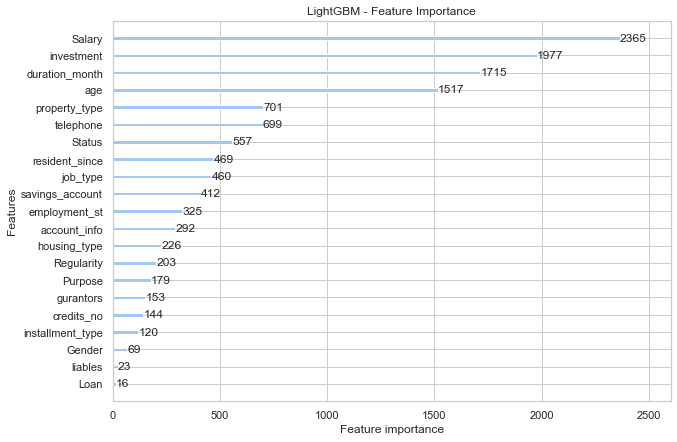

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
lgb.plot_importance(lgb_clf, max_num_features=30, ax=ax)
plt.title("LightGBM - Feature Importance")

### the above gives us an idea regarding the most important features

In [28]:
### lets train the lightGBM model on best 10 features got accuracy of 97 

X = df[['serial number','investment','Salary','age',
       'duration_month','employment_st','property_type','resident_since','savings_account','Status']]
y = df[['credit_amount']]

feature_names = X.columns.tolist()

In [29]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train.shape

#creating lightGBM dataset
lgtrain = lgb.Dataset(X_train, y_train,
                feature_name=feature_names)
lgvalid = lgb.Dataset(X_test, y_test,
                feature_name=feature_names)

In [30]:
params = {
    'objective' : 'regression_l2',
    'boosting':'dart',
    'metric' : 'mse',
    'num_leaves' : 300,
    'max_depth': 20,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.8,
    'verbosity' : 1,
    'num_iteratios':10000,
    'num_threads':2,
    'lambda_l1': 3.097758978478437,
    'lambda_l2': 2.9482537987198496,
    'min_child_weight': 6.996211413900573,
    'min_split_gain': 0.037310344962162616
}
lgb_clf = lgb.train(
    params,
    lgtrain,
    num_boost_round = 10000,
    valid_sets=[lgtrain, lgvalid],
    valid_names=["train", "valid"],
    early_stopping_rounds=5000
)

print("rmse of the validation set:", np.sqrt(mean_squared_error(y_test, lgb_clf.predict(X_test))))

[1]	train's l2: 7.50126e+06	valid's l2: 6.68609e+06
[2]	train's l2: 7.46042e+06	valid's l2: 6.67037e+06
[3]	train's l2: 7.38498e+06	valid's l2: 6.61187e+06
[4]	train's l2: 7.32484e+06	valid's l2: 6.55439e+06
[5]	train's l2: 7.25224e+06	valid's l2: 6.49707e+06
[6]	train's l2: 7.18044e+06	valid's l2: 6.44149e+06
[7]	train's l2: 7.11045e+06	valid's l2: 6.38142e+06
[8]	train's l2: 7.12782e+06	valid's l2: 6.3864e+06
[9]	train's l2: 7.05824e+06	valid's l2: 6.33218e+06
[10]	train's l2: 6.99048e+06	valid's l2: 6.27453e+06
[11]	train's l2: 6.9523e+06	valid's l2: 6.2589e+06
[12]	train's l2: 6.96579e+06	valid's l2: 6.26314e+06
[13]	train's l2: 6.93053e+06	valid's l2: 6.24433e+06
[14]	train's l2: 6.89961e+06	valid's l2: 6.23465e+06
[15]	train's l2: 6.84507e+06	valid's l2: 6.18291e+06
[16]	train's l2: 6.7804e+06	valid's l2: 6.13214e+06
[17]	train's l2: 6.71733e+06	valid's l2: 6.08318e+06
[18]	train's l2: 6.66488e+06	valid's l2: 6.03322e+06
[19]	train's l2: 6.60305e+06	valid's l2: 5.98616e+06
[20]	t

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[121]	train's l2: 7.17809e+06	valid's l2: 6.90555e+06
[122]	train's l2: 7.20393e+06	valid's l2: 6.92781e+06
[123]	train's l2: 7.13044e+06	valid's l2: 6.85964e+06
[124]	train's l2: 7.07409e+06	valid's l2: 6.82147e+06
[125]	train's l2: 7.09507e+06	valid's l2: 6.84129e+06
[126]	train's l2: 7.11833e+06	valid's l2: 6.86177e+06
[127]	train's l2: 7.04623e+06	valid's l2: 6.79911e+06
[128]	train's l2: 7.06859e+06	valid's l2: 6.81651e+06
[129]	train's l2: 7.0134e+06	valid's l2: 6.77772e+06
[130]	train's l2: 6.94309e+06	valid's l2: 6.71709e+06
[131]	train's l2: 6.96893e+06	valid's l2: 6.73921e+06
[132]	train's l2: 6.90413e+06	valid's l2: 6.6744e+06
[133]	train's l2: 6.85123e+06	valid's l2: 6.63904e+06
[134]	train's l2: 7.1422e+06	valid's l2: 6.92585e+06
[135]	train's l2: 7.08577e+06	valid's l2: 6.88445e+06
[136]	train's l2: 7.47996e+06	valid's l2: 7.27416e+06
[137]	train's l2: 7.50613e+06	valid's l2: 7.29658e+06
[138]	train's l2: 7.42543e+06	valid's l2: 7.22025e+06
[139]	train's l2: 7.34687e+06	

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[205]	train's l2: 6.90628e+06	valid's l2: 6.8243e+06
[206]	train's l2: 6.84839e+06	valid's l2: 6.77946e+06
[207]	train's l2: 6.87896e+06	valid's l2: 6.8062e+06
[208]	train's l2: 6.81329e+06	valid's l2: 6.74317e+06
[209]	train's l2: 6.84765e+06	valid's l2: 6.773e+06
[210]	train's l2: 6.8723e+06	valid's l2: 6.79194e+06
[211]	train's l2: 6.90327e+06	valid's l2: 6.81904e+06
[212]	train's l2: 6.83335e+06	valid's l2: 6.75689e+06
[213]	train's l2: 6.77681e+06	valid's l2: 6.71502e+06
[214]	train's l2: 6.7092e+06	valid's l2: 6.65727e+06
[215]	train's l2: 6.64619e+06	valid's l2: 6.59679e+06
[216]	train's l2: 6.67752e+06	valid's l2: 6.6229e+06
[217]	train's l2: 6.61107e+06	valid's l2: 6.5607e+06
[218]	train's l2: 6.54595e+06	valid's l2: 6.50533e+06
[219]	train's l2: 6.68688e+06	valid's l2: 6.64212e+06
[220]	train's l2: 6.61998e+06	valid's l2: 6.57967e+06
[221]	train's l2: 6.65329e+06	valid's l2: 6.60736e+06
[222]	train's l2: 6.59106e+06	valid's l2: 6.5432e+06
[223]	train's l2: 6.52661e+06	valid'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[289]	train's l2: 5.47133e+06	valid's l2: 5.60688e+06
[290]	train's l2: 5.42786e+06	valid's l2: 5.56574e+06
[291]	train's l2: 5.38986e+06	valid's l2: 5.541e+06
[292]	train's l2: 5.42127e+06	valid's l2: 5.56734e+06
[293]	train's l2: 5.45114e+06	valid's l2: 5.59288e+06
[294]	train's l2: 5.40772e+06	valid's l2: 5.54745e+06
[295]	train's l2: 5.43798e+06	valid's l2: 5.57294e+06
[296]	train's l2: 5.46527e+06	valid's l2: 5.59676e+06
[297]	train's l2: 5.41918e+06	valid's l2: 5.55728e+06
[298]	train's l2: 5.44505e+06	valid's l2: 5.57937e+06
[299]	train's l2: 5.39883e+06	valid's l2: 5.54062e+06
[300]	train's l2: 5.42256e+06	valid's l2: 5.56021e+06
[301]	train's l2: 5.50214e+06	valid's l2: 5.63526e+06
[302]	train's l2: 5.46304e+06	valid's l2: 5.60977e+06
[303]	train's l2: 5.49159e+06	valid's l2: 5.6351e+06
[304]	train's l2: 5.52068e+06	valid's l2: 5.65908e+06
[305]	train's l2: 5.55101e+06	valid's l2: 5.68484e+06
[306]	train's l2: 5.57675e+06	valid's l2: 5.70675e+06
[307]	train's l2: 5.59865e+06	

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[354]	train's l2: 5.06966e+06	valid's l2: 5.29814e+06
[355]	train's l2: 5.09459e+06	valid's l2: 5.31943e+06
[356]	train's l2: 5.05402e+06	valid's l2: 5.28582e+06
[357]	train's l2: 5.07487e+06	valid's l2: 5.30268e+06
[358]	train's l2: 5.03655e+06	valid's l2: 5.26602e+06
[359]	train's l2: 5.11216e+06	valid's l2: 5.3365e+06
[360]	train's l2: 5.0713e+06	valid's l2: 5.30273e+06
[361]	train's l2: 5.03025e+06	valid's l2: 5.26707e+06
[362]	train's l2: 4.99012e+06	valid's l2: 5.23324e+06
[363]	train's l2: 5.01534e+06	valid's l2: 5.25536e+06
[364]	train's l2: 5.03791e+06	valid's l2: 5.27463e+06
[365]	train's l2: 5.00466e+06	valid's l2: 5.25327e+06
[366]	train's l2: 5.02797e+06	valid's l2: 5.27276e+06
[367]	train's l2: 5.05522e+06	valid's l2: 5.29629e+06
[368]	train's l2: 5.01753e+06	valid's l2: 5.25658e+06
[369]	train's l2: 5.03857e+06	valid's l2: 5.27461e+06
[370]	train's l2: 5.00116e+06	valid's l2: 5.23517e+06
[371]	train's l2: 5.02438e+06	valid's l2: 5.25416e+06
[372]	train's l2: 4.9874e+06	

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[429]	train's l2: 4.22542e+06	valid's l2: 4.61604e+06
[430]	train's l2: 4.27653e+06	valid's l2: 4.66196e+06
[431]	train's l2: 4.25144e+06	valid's l2: 4.64521e+06
[432]	train's l2: 4.22379e+06	valid's l2: 4.62443e+06
[433]	train's l2: 4.19649e+06	valid's l2: 4.60375e+06
[434]	train's l2: 4.21631e+06	valid's l2: 4.61971e+06
[435]	train's l2: 4.23525e+06	valid's l2: 4.63431e+06
[436]	train's l2: 4.20807e+06	valid's l2: 4.61392e+06
[437]	train's l2: 4.18396e+06	valid's l2: 4.59798e+06
[438]	train's l2: 4.20185e+06	valid's l2: 4.61229e+06
[439]	train's l2: 4.24752e+06	valid's l2: 4.65346e+06
[440]	train's l2: 4.2202e+06	valid's l2: 4.63233e+06
[441]	train's l2: 4.19499e+06	valid's l2: 4.62024e+06
[442]	train's l2: 4.16801e+06	valid's l2: 4.59997e+06
[443]	train's l2: 4.18605e+06	valid's l2: 4.61346e+06
[444]	train's l2: 4.15908e+06	valid's l2: 4.59491e+06
[445]	train's l2: 4.13411e+06	valid's l2: 4.57075e+06
[446]	train's l2: 4.15277e+06	valid's l2: 4.5855e+06
[447]	train's l2: 4.12687e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[489]	train's l2: 3.84181e+06	valid's l2: 4.38419e+06
[490]	train's l2: 3.85869e+06	valid's l2: 4.39733e+06
[491]	train's l2: 3.87553e+06	valid's l2: 4.41009e+06
[492]	train's l2: 3.89112e+06	valid's l2: 4.42147e+06
[493]	train's l2: 3.90816e+06	valid's l2: 4.4351e+06
[494]	train's l2: 3.88516e+06	valid's l2: 4.41786e+06
[495]	train's l2: 3.86408e+06	valid's l2: 4.39416e+06
[496]	train's l2: 3.84209e+06	valid's l2: 4.37915e+06
[497]	train's l2: 3.82083e+06	valid's l2: 4.36463e+06
[498]	train's l2: 3.79961e+06	valid's l2: 4.34996e+06
[499]	train's l2: 3.81488e+06	valid's l2: 4.36207e+06
[500]	train's l2: 3.79338e+06	valid's l2: 4.34628e+06
[501]	train's l2: 3.80978e+06	valid's l2: 4.35881e+06
[502]	train's l2: 3.78967e+06	valid's l2: 4.33732e+06
[503]	train's l2: 3.76865e+06	valid's l2: 4.32341e+06
[504]	train's l2: 3.78487e+06	valid's l2: 4.33547e+06
[505]	train's l2: 3.79916e+06	valid's l2: 4.34564e+06
[506]	train's l2: 3.77788e+06	valid's l2: 4.33051e+06
[507]	train's l2: 3.75805e+0

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[554]	train's l2: 3.59267e+06	valid's l2: 4.21051e+06
[555]	train's l2: 3.57508e+06	valid's l2: 4.19049e+06
[556]	train's l2: 3.58965e+06	valid's l2: 4.20138e+06
[557]	train's l2: 3.60354e+06	valid's l2: 4.21077e+06
[558]	train's l2: 3.58437e+06	valid's l2: 4.19802e+06
[559]	train's l2: 3.56627e+06	valid's l2: 4.18689e+06
[560]	train's l2: 3.54823e+06	valid's l2: 4.17567e+06
[561]	train's l2: 3.56281e+06	valid's l2: 4.1859e+06
[562]	train's l2: 3.57543e+06	valid's l2: 4.19487e+06
[563]	train's l2: 3.58853e+06	valid's l2: 4.20449e+06
[564]	train's l2: 3.60357e+06	valid's l2: 4.21528e+06
[565]	train's l2: 3.58461e+06	valid's l2: 4.20229e+06
[566]	train's l2: 3.56686e+06	valid's l2: 4.19006e+06
[567]	train's l2: 3.54882e+06	valid's l2: 4.17871e+06
[568]	train's l2: 3.56164e+06	valid's l2: 4.18795e+06
[569]	train's l2: 3.57581e+06	valid's l2: 4.1982e+06
[570]	train's l2: 3.5885e+06	valid's l2: 4.20691e+06
[571]	train's l2: 3.5696e+06	valid's l2: 4.19436e+06
[572]	train's l2: 3.55159e+06	v

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[609]	train's l2: 3.62204e+06	valid's l2: 4.24244e+06
[610]	train's l2: 3.60343e+06	valid's l2: 4.23384e+06
[611]	train's l2: 3.58527e+06	valid's l2: 4.22639e+06
[612]	train's l2: 3.56811e+06	valid's l2: 4.21826e+06
[613]	train's l2: 3.58075e+06	valid's l2: 4.22686e+06
[614]	train's l2: 3.56384e+06	valid's l2: 4.218e+06
[615]	train's l2: 3.54547e+06	valid's l2: 4.20434e+06
[616]	train's l2: 3.52726e+06	valid's l2: 4.19172e+06
[617]	train's l2: 3.53883e+06	valid's l2: 4.19995e+06
[618]	train's l2: 3.52131e+06	valid's l2: 4.18808e+06
[619]	train's l2: 3.50409e+06	valid's l2: 4.17608e+06
[620]	train's l2: 3.48714e+06	valid's l2: 4.16463e+06
[621]	train's l2: 3.49821e+06	valid's l2: 4.17298e+06
[622]	train's l2: 3.52921e+06	valid's l2: 4.19994e+06
[623]	train's l2: 3.512e+06	valid's l2: 4.18193e+06
[624]	train's l2: 3.52367e+06	valid's l2: 4.19019e+06
[625]	train's l2: 3.50648e+06	valid's l2: 4.17909e+06
[626]	train's l2: 3.48889e+06	valid's l2: 4.16784e+06
[627]	train's l2: 3.47181e+06	v

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[679]	train's l2: 3.38889e+06	valid's l2: 4.12928e+06
[680]	train's l2: 3.37265e+06	valid's l2: 4.11959e+06
[681]	train's l2: 3.40024e+06	valid's l2: 4.1433e+06
[682]	train's l2: 3.41035e+06	valid's l2: 4.1504e+06
[683]	train's l2: 3.39387e+06	valid's l2: 4.13976e+06
[684]	train's l2: 3.37806e+06	valid's l2: 4.12948e+06
[685]	train's l2: 3.38981e+06	valid's l2: 4.13737e+06
[686]	train's l2: 3.37361e+06	valid's l2: 4.12682e+06
[687]	train's l2: 3.38464e+06	valid's l2: 4.13422e+06
[688]	train's l2: 3.3962e+06	valid's l2: 4.14262e+06
[689]	train's l2: 3.38101e+06	valid's l2: 4.13673e+06
[690]	train's l2: 3.36492e+06	valid's l2: 4.12689e+06
[691]	train's l2: 3.37525e+06	valid's l2: 4.13376e+06
[692]	train's l2: 3.38607e+06	valid's l2: 4.14117e+06
[693]	train's l2: 3.3706e+06	valid's l2: 4.13113e+06
[694]	train's l2: 3.35511e+06	valid's l2: 4.11509e+06
[695]	train's l2: 3.36516e+06	valid's l2: 4.12157e+06
[696]	train's l2: 3.34891e+06	valid's l2: 4.11135e+06
[697]	train's l2: 3.33127e+06	v

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[798]	train's l2: 3.14255e+06	valid's l2: 4.03584e+06
[799]	train's l2: 3.12853e+06	valid's l2: 4.02705e+06
[800]	train's l2: 3.13752e+06	valid's l2: 4.03318e+06
[801]	train's l2: 3.12449e+06	valid's l2: 4.02357e+06
[802]	train's l2: 3.13191e+06	valid's l2: 4.02832e+06
[803]	train's l2: 3.1395e+06	valid's l2: 4.03323e+06
[804]	train's l2: 3.14827e+06	valid's l2: 4.03896e+06
[805]	train's l2: 3.15615e+06	valid's l2: 4.04424e+06
[806]	train's l2: 3.16452e+06	valid's l2: 4.0497e+06
[807]	train's l2: 3.15019e+06	valid's l2: 4.04017e+06
[808]	train's l2: 3.1363e+06	valid's l2: 4.03329e+06
[809]	train's l2: 3.14436e+06	valid's l2: 4.03856e+06
[810]	train's l2: 3.13079e+06	valid's l2: 4.03096e+06
[811]	train's l2: 3.11771e+06	valid's l2: 4.02348e+06
[812]	train's l2: 3.12641e+06	valid's l2: 4.02941e+06
[813]	train's l2: 3.11314e+06	valid's l2: 4.02246e+06
[814]	train's l2: 3.12114e+06	valid's l2: 4.02793e+06
[815]	train's l2: 3.10862e+06	valid's l2: 4.02389e+06
[816]	train's l2: 3.09586e+06	

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[869]	train's l2: 2.89623e+06	valid's l2: 3.9513e+06
[870]	train's l2: 2.90395e+06	valid's l2: 3.9562e+06
[871]	train's l2: 2.91125e+06	valid's l2: 3.96132e+06
[872]	train's l2: 2.89958e+06	valid's l2: 3.95599e+06
[873]	train's l2: 2.90733e+06	valid's l2: 3.96087e+06
[874]	train's l2: 2.92641e+06	valid's l2: 3.9765e+06
[875]	train's l2: 2.93402e+06	valid's l2: 3.9813e+06
[876]	train's l2: 2.92275e+06	valid's l2: 3.97415e+06
[877]	train's l2: 2.92927e+06	valid's l2: 3.97833e+06
[878]	train's l2: 2.91756e+06	valid's l2: 3.97126e+06
[879]	train's l2: 2.92479e+06	valid's l2: 3.97549e+06
[880]	train's l2: 2.93344e+06	valid's l2: 3.9807e+06
[881]	train's l2: 2.94115e+06	valid's l2: 3.98533e+06
[882]	train's l2: 2.92978e+06	valid's l2: 3.97822e+06
[883]	train's l2: 2.93685e+06	valid's l2: 3.98295e+06
[884]	train's l2: 2.92565e+06	valid's l2: 3.97689e+06
[885]	train's l2: 2.91379e+06	valid's l2: 3.97003e+06
[886]	train's l2: 2.90294e+06	valid's l2: 3.95915e+06
[887]	train's l2: 2.89279e+06	va

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[932]	train's l2: 2.88015e+06	valid's l2: 3.96967e+06
[933]	train's l2: 2.86929e+06	valid's l2: 3.96334e+06
[934]	train's l2: 2.8591e+06	valid's l2: 3.96036e+06
[935]	train's l2: 2.84831e+06	valid's l2: 3.95269e+06
[936]	train's l2: 2.85544e+06	valid's l2: 3.95749e+06
[937]	train's l2: 2.86379e+06	valid's l2: 3.96231e+06
[938]	train's l2: 2.85268e+06	valid's l2: 3.95695e+06
[939]	train's l2: 2.85856e+06	valid's l2: 3.96037e+06
[940]	train's l2: 2.84842e+06	valid's l2: 3.95873e+06
[941]	train's l2: 2.86583e+06	valid's l2: 3.97326e+06
[942]	train's l2: 2.85474e+06	valid's l2: 3.96805e+06
[943]	train's l2: 2.86143e+06	valid's l2: 3.97258e+06
[944]	train's l2: 2.85114e+06	valid's l2: 3.96737e+06
[945]	train's l2: 2.85892e+06	valid's l2: 3.9718e+06
[946]	train's l2: 2.8647e+06	valid's l2: 3.97538e+06
[947]	train's l2: 2.85365e+06	valid's l2: 3.9756e+06
[948]	train's l2: 2.84178e+06	valid's l2: 3.97402e+06
[949]	train's l2: 2.83133e+06	valid's l2: 3.97116e+06
[950]	train's l2: 2.8212e+06	va

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[993]	train's l2: 2.76265e+06	valid's l2: 3.96609e+06
[994]	train's l2: 2.75262e+06	valid's l2: 3.96077e+06
[995]	train's l2: 2.75938e+06	valid's l2: 3.96466e+06
[996]	train's l2: 2.74977e+06	valid's l2: 3.95982e+06
[997]	train's l2: 2.74069e+06	valid's l2: 3.95525e+06
[998]	train's l2: 2.74634e+06	valid's l2: 3.95877e+06
[999]	train's l2: 2.73639e+06	valid's l2: 3.95326e+06
[1000]	train's l2: 2.74183e+06	valid's l2: 3.95644e+06
[1001]	train's l2: 2.74774e+06	valid's l2: 3.9602e+06
[1002]	train's l2: 2.75445e+06	valid's l2: 3.96434e+06
[1003]	train's l2: 2.74468e+06	valid's l2: 3.95874e+06
[1004]	train's l2: 2.73545e+06	valid's l2: 3.95376e+06
[1005]	train's l2: 2.72711e+06	valid's l2: 3.94937e+06
[1006]	train's l2: 2.7327e+06	valid's l2: 3.9525e+06
[1007]	train's l2: 2.72318e+06	valid's l2: 3.9464e+06
[1008]	train's l2: 2.71421e+06	valid's l2: 3.9428e+06
[1009]	train's l2: 2.70521e+06	valid's l2: 3.94106e+06
[1010]	train's l2: 2.69587e+06	valid's l2: 3.93456e+06
[1011]	train's l2: 2.

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1058]	train's l2: 2.63231e+06	valid's l2: 3.92112e+06
[1059]	train's l2: 2.63747e+06	valid's l2: 3.92405e+06
[1060]	train's l2: 2.64296e+06	valid's l2: 3.92729e+06
[1061]	train's l2: 2.64891e+06	valid's l2: 3.93093e+06
[1062]	train's l2: 2.6543e+06	valid's l2: 3.93409e+06
[1063]	train's l2: 2.6457e+06	valid's l2: 3.92927e+06
[1064]	train's l2: 2.65062e+06	valid's l2: 3.93214e+06
[1065]	train's l2: 2.65539e+06	valid's l2: 3.93525e+06
[1066]	train's l2: 2.64677e+06	valid's l2: 3.93103e+06
[1067]	train's l2: 2.65147e+06	valid's l2: 3.93389e+06
[1068]	train's l2: 2.64286e+06	valid's l2: 3.92932e+06
[1069]	train's l2: 2.64837e+06	valid's l2: 3.93263e+06
[1070]	train's l2: 2.63994e+06	valid's l2: 3.92746e+06
[1071]	train's l2: 2.63059e+06	valid's l2: 3.92442e+06
[1072]	train's l2: 2.63724e+06	valid's l2: 3.9283e+06
[1073]	train's l2: 2.6287e+06	valid's l2: 3.92485e+06
[1074]	train's l2: 2.6339e+06	valid's l2: 3.92774e+06
[1075]	train's l2: 2.625e+06	valid's l2: 3.92398e+06
[1076]	train's l

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1115]	train's l2: 2.64817e+06	valid's l2: 3.95251e+06
[1116]	train's l2: 2.653e+06	valid's l2: 3.95529e+06
[1117]	train's l2: 2.65787e+06	valid's l2: 3.95846e+06
[1118]	train's l2: 2.64881e+06	valid's l2: 3.95206e+06
[1119]	train's l2: 2.65502e+06	valid's l2: 3.95594e+06
[1120]	train's l2: 2.661e+06	valid's l2: 3.95958e+06
[1121]	train's l2: 2.65151e+06	valid's l2: 3.95038e+06
[1122]	train's l2: 2.64205e+06	valid's l2: 3.94171e+06
[1123]	train's l2: 2.63241e+06	valid's l2: 3.93961e+06
[1124]	train's l2: 2.63747e+06	valid's l2: 3.94281e+06
[1125]	train's l2: 2.62857e+06	valid's l2: 3.9374e+06
[1126]	train's l2: 2.6197e+06	valid's l2: 3.92983e+06
[1127]	train's l2: 2.62552e+06	valid's l2: 3.93338e+06
[1128]	train's l2: 2.6169e+06	valid's l2: 3.92912e+06
[1129]	train's l2: 2.6082e+06	valid's l2: 3.92398e+06
[1130]	train's l2: 2.61249e+06	valid's l2: 3.92637e+06
[1131]	train's l2: 2.61749e+06	valid's l2: 3.92936e+06
[1132]	train's l2: 2.60895e+06	valid's l2: 3.92634e+06
[1133]	train's l2

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1178]	train's l2: 2.59073e+06	valid's l2: 3.94256e+06
[1179]	train's l2: 2.5824e+06	valid's l2: 3.93266e+06
[1180]	train's l2: 2.58673e+06	valid's l2: 3.93543e+06
[1181]	train's l2: 2.59107e+06	valid's l2: 3.93822e+06
[1182]	train's l2: 2.58252e+06	valid's l2: 3.93282e+06
[1183]	train's l2: 2.57369e+06	valid's l2: 3.9266e+06
[1184]	train's l2: 2.56385e+06	valid's l2: 3.92549e+06
[1185]	train's l2: 2.5554e+06	valid's l2: 3.91894e+06
[1186]	train's l2: 2.56098e+06	valid's l2: 3.92236e+06
[1187]	train's l2: 2.55217e+06	valid's l2: 3.91708e+06
[1188]	train's l2: 2.54284e+06	valid's l2: 3.91738e+06
[1189]	train's l2: 2.54722e+06	valid's l2: 3.91992e+06
[1190]	train's l2: 2.56153e+06	valid's l2: 3.93125e+06
[1191]	train's l2: 2.56695e+06	valid's l2: 3.93434e+06
[1192]	train's l2: 2.57261e+06	valid's l2: 3.93756e+06
[1193]	train's l2: 2.57758e+06	valid's l2: 3.94055e+06
[1194]	train's l2: 2.56838e+06	valid's l2: 3.93827e+06
[1195]	train's l2: 2.55926e+06	valid's l2: 3.93608e+06
[1196]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1236]	train's l2: 2.45606e+06	valid's l2: 3.90371e+06
[1237]	train's l2: 2.44812e+06	valid's l2: 3.89573e+06
[1238]	train's l2: 2.45248e+06	valid's l2: 3.89786e+06
[1239]	train's l2: 2.45648e+06	valid's l2: 3.90007e+06
[1240]	train's l2: 2.46152e+06	valid's l2: 3.90263e+06
[1241]	train's l2: 2.46678e+06	valid's l2: 3.90566e+06
[1242]	train's l2: 2.45881e+06	valid's l2: 3.90681e+06
[1243]	train's l2: 2.46271e+06	valid's l2: 3.90929e+06
[1244]	train's l2: 2.45445e+06	valid's l2: 3.90697e+06
[1245]	train's l2: 2.44651e+06	valid's l2: 3.90562e+06
[1246]	train's l2: 2.43911e+06	valid's l2: 3.90121e+06
[1247]	train's l2: 2.44327e+06	valid's l2: 3.90359e+06
[1248]	train's l2: 2.44846e+06	valid's l2: 3.90633e+06
[1249]	train's l2: 2.4532e+06	valid's l2: 3.90892e+06
[1250]	train's l2: 2.44525e+06	valid's l2: 3.90841e+06
[1251]	train's l2: 2.43794e+06	valid's l2: 3.90011e+06
[1252]	train's l2: 2.44229e+06	valid's l2: 3.90244e+06
[1253]	train's l2: 2.44604e+06	valid's l2: 3.90466e+06
[1254]	tra

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1285]	train's l2: 2.43351e+06	valid's l2: 3.90172e+06
[1286]	train's l2: 2.43833e+06	valid's l2: 3.90442e+06
[1287]	train's l2: 2.44343e+06	valid's l2: 3.90723e+06
[1288]	train's l2: 2.44815e+06	valid's l2: 3.90982e+06
[1289]	train's l2: 2.45244e+06	valid's l2: 3.91248e+06
[1290]	train's l2: 2.45713e+06	valid's l2: 3.91517e+06
[1291]	train's l2: 2.44938e+06	valid's l2: 3.90768e+06
[1292]	train's l2: 2.44186e+06	valid's l2: 3.89914e+06
[1293]	train's l2: 2.44521e+06	valid's l2: 3.90121e+06
[1294]	train's l2: 2.44974e+06	valid's l2: 3.9038e+06
[1295]	train's l2: 2.44207e+06	valid's l2: 3.89958e+06
[1296]	train's l2: 2.44631e+06	valid's l2: 3.90189e+06
[1297]	train's l2: 2.43906e+06	valid's l2: 3.89246e+06
[1298]	train's l2: 2.43162e+06	valid's l2: 3.88798e+06
[1299]	train's l2: 2.42388e+06	valid's l2: 3.88395e+06
[1300]	train's l2: 2.41687e+06	valid's l2: 3.88081e+06
[1301]	train's l2: 2.40936e+06	valid's l2: 3.87653e+06
[1302]	train's l2: 2.40137e+06	valid's l2: 3.87266e+06
[1303]	tra

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1339]	train's l2: 2.348e+06	valid's l2: 3.85881e+06
[1340]	train's l2: 2.35281e+06	valid's l2: 3.861e+06
[1341]	train's l2: 2.35745e+06	valid's l2: 3.86297e+06
[1342]	train's l2: 2.34992e+06	valid's l2: 3.86086e+06
[1343]	train's l2: 2.35325e+06	valid's l2: 3.86282e+06
[1344]	train's l2: 2.35816e+06	valid's l2: 3.8653e+06
[1345]	train's l2: 2.36185e+06	valid's l2: 3.86723e+06
[1346]	train's l2: 2.36667e+06	valid's l2: 3.86979e+06
[1347]	train's l2: 2.35949e+06	valid's l2: 3.86668e+06
[1348]	train's l2: 2.36398e+06	valid's l2: 3.86874e+06
[1349]	train's l2: 2.35687e+06	valid's l2: 3.86569e+06
[1350]	train's l2: 2.36168e+06	valid's l2: 3.86799e+06
[1351]	train's l2: 2.35476e+06	valid's l2: 3.86698e+06
[1352]	train's l2: 2.35929e+06	valid's l2: 3.86939e+06
[1353]	train's l2: 2.3523e+06	valid's l2: 3.86679e+06
[1354]	train's l2: 2.34537e+06	valid's l2: 3.8646e+06
[1355]	train's l2: 2.33846e+06	valid's l2: 3.86108e+06
[1356]	train's l2: 2.33182e+06	valid's l2: 3.85602e+06
[1357]	train's l

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1395]	train's l2: 2.25396e+06	valid's l2: 3.81202e+06
[1396]	train's l2: 2.24828e+06	valid's l2: 3.80956e+06
[1397]	train's l2: 2.24194e+06	valid's l2: 3.80807e+06
[1398]	train's l2: 2.24562e+06	valid's l2: 3.80964e+06
[1399]	train's l2: 2.24886e+06	valid's l2: 3.81138e+06
[1400]	train's l2: 2.24285e+06	valid's l2: 3.809e+06
[1401]	train's l2: 2.24619e+06	valid's l2: 3.81073e+06
[1402]	train's l2: 2.24997e+06	valid's l2: 3.81277e+06
[1403]	train's l2: 2.2436e+06	valid's l2: 3.80967e+06
[1404]	train's l2: 2.24742e+06	valid's l2: 3.81173e+06
[1405]	train's l2: 2.24179e+06	valid's l2: 3.80924e+06
[1406]	train's l2: 2.24562e+06	valid's l2: 3.81104e+06
[1407]	train's l2: 2.23978e+06	valid's l2: 3.80907e+06
[1408]	train's l2: 2.24359e+06	valid's l2: 3.81103e+06
[1409]	train's l2: 2.23759e+06	valid's l2: 3.80826e+06
[1410]	train's l2: 2.24225e+06	valid's l2: 3.81017e+06
[1411]	train's l2: 2.24594e+06	valid's l2: 3.81195e+06
[1412]	train's l2: 2.23947e+06	valid's l2: 3.81078e+06
[1413]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1434]	train's l2: 2.23434e+06	valid's l2: 3.82438e+06
[1435]	train's l2: 2.23794e+06	valid's l2: 3.82617e+06
[1436]	train's l2: 2.24083e+06	valid's l2: 3.82781e+06
[1437]	train's l2: 2.23514e+06	valid's l2: 3.82736e+06
[1438]	train's l2: 2.23923e+06	valid's l2: 3.82946e+06
[1439]	train's l2: 2.23355e+06	valid's l2: 3.82976e+06
[1440]	train's l2: 2.23661e+06	valid's l2: 3.83134e+06
[1441]	train's l2: 2.23946e+06	valid's l2: 3.83279e+06
[1442]	train's l2: 2.24296e+06	valid's l2: 3.83454e+06
[1443]	train's l2: 2.237e+06	valid's l2: 3.8329e+06
[1444]	train's l2: 2.24084e+06	valid's l2: 3.8349e+06
[1445]	train's l2: 2.2349e+06	valid's l2: 3.83235e+06
[1446]	train's l2: 2.22913e+06	valid's l2: 3.83034e+06
[1447]	train's l2: 2.23288e+06	valid's l2: 3.83212e+06
[1448]	train's l2: 2.23588e+06	valid's l2: 3.83387e+06
[1449]	train's l2: 2.24001e+06	valid's l2: 3.83586e+06
[1450]	train's l2: 2.23334e+06	valid's l2: 3.83392e+06
[1451]	train's l2: 2.2273e+06	valid's l2: 3.83164e+06
[1452]	train's 

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1482]	train's l2: 2.19607e+06	valid's l2: 3.83075e+06
[1483]	train's l2: 2.19032e+06	valid's l2: 3.82673e+06
[1484]	train's l2: 2.18411e+06	valid's l2: 3.82335e+06
[1485]	train's l2: 2.18737e+06	valid's l2: 3.82483e+06
[1486]	train's l2: 2.19094e+06	valid's l2: 3.82636e+06
[1487]	train's l2: 2.19441e+06	valid's l2: 3.82786e+06
[1488]	train's l2: 2.19807e+06	valid's l2: 3.82956e+06
[1489]	train's l2: 2.20181e+06	valid's l2: 3.83129e+06
[1490]	train's l2: 2.20622e+06	valid's l2: 3.83301e+06
[1491]	train's l2: 2.19959e+06	valid's l2: 3.83163e+06
[1492]	train's l2: 2.20239e+06	valid's l2: 3.83337e+06
[1493]	train's l2: 2.20544e+06	valid's l2: 3.83474e+06
[1494]	train's l2: 2.20877e+06	valid's l2: 3.83623e+06
[1495]	train's l2: 2.21274e+06	valid's l2: 3.83763e+06
[1496]	train's l2: 2.21538e+06	valid's l2: 3.83907e+06
[1497]	train's l2: 2.20989e+06	valid's l2: 3.83652e+06
[1498]	train's l2: 2.20412e+06	valid's l2: 3.83036e+06
[1499]	train's l2: 2.20724e+06	valid's l2: 3.83215e+06
[1500]	tr

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1528]	train's l2: 2.20906e+06	valid's l2: 3.84124e+06
[1529]	train's l2: 2.21218e+06	valid's l2: 3.84306e+06
[1530]	train's l2: 2.21493e+06	valid's l2: 3.84467e+06
[1531]	train's l2: 2.21859e+06	valid's l2: 3.84661e+06
[1532]	train's l2: 2.2126e+06	valid's l2: 3.84391e+06
[1533]	train's l2: 2.2158e+06	valid's l2: 3.84539e+06
[1534]	train's l2: 2.20909e+06	valid's l2: 3.84506e+06
[1535]	train's l2: 2.20323e+06	valid's l2: 3.84292e+06
[1536]	train's l2: 2.20649e+06	valid's l2: 3.8444e+06
[1537]	train's l2: 2.2005e+06	valid's l2: 3.84057e+06
[1538]	train's l2: 2.20371e+06	valid's l2: 3.84204e+06
[1539]	train's l2: 2.19788e+06	valid's l2: 3.83837e+06
[1540]	train's l2: 2.20197e+06	valid's l2: 3.84057e+06
[1541]	train's l2: 2.19606e+06	valid's l2: 3.83833e+06
[1542]	train's l2: 2.19904e+06	valid's l2: 3.83976e+06
[1543]	train's l2: 2.19314e+06	valid's l2: 3.83755e+06
[1544]	train's l2: 2.18744e+06	valid's l2: 3.8358e+06
[1545]	train's l2: 2.19135e+06	valid's l2: 3.83739e+06
[1546]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1598]	train's l2: 2.08885e+06	valid's l2: 3.80947e+06
[1599]	train's l2: 2.08423e+06	valid's l2: 3.80737e+06
[1600]	train's l2: 2.07959e+06	valid's l2: 3.80401e+06
[1601]	train's l2: 2.07502e+06	valid's l2: 3.8031e+06
[1602]	train's l2: 2.0704e+06	valid's l2: 3.80117e+06
[1603]	train's l2: 2.07357e+06	valid's l2: 3.80242e+06
[1604]	train's l2: 2.06891e+06	valid's l2: 3.8009e+06
[1605]	train's l2: 2.07178e+06	valid's l2: 3.80216e+06
[1606]	train's l2: 2.06652e+06	valid's l2: 3.79996e+06
[1607]	train's l2: 2.06219e+06	valid's l2: 3.79707e+06
[1608]	train's l2: 2.06559e+06	valid's l2: 3.79845e+06
[1609]	train's l2: 2.06839e+06	valid's l2: 3.8001e+06
[1610]	train's l2: 2.07633e+06	valid's l2: 3.80628e+06
[1611]	train's l2: 2.08442e+06	valid's l2: 3.81269e+06
[1612]	train's l2: 2.08704e+06	valid's l2: 3.81348e+06
[1613]	train's l2: 2.08987e+06	valid's l2: 3.81465e+06
[1614]	train's l2: 2.08363e+06	valid's l2: 3.81416e+06
[1615]	train's l2: 2.07878e+06	valid's l2: 3.813e+06
[1616]	train's 

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1656]	train's l2: 2.06791e+06	valid's l2: 3.82322e+06
[1657]	train's l2: 2.06303e+06	valid's l2: 3.82208e+06
[1658]	train's l2: 2.05823e+06	valid's l2: 3.8187e+06
[1659]	train's l2: 2.0535e+06	valid's l2: 3.81786e+06
[1660]	train's l2: 2.05629e+06	valid's l2: 3.81914e+06
[1661]	train's l2: 2.05954e+06	valid's l2: 3.82038e+06
[1662]	train's l2: 2.05478e+06	valid's l2: 3.81927e+06
[1663]	train's l2: 2.04905e+06	valid's l2: 3.81679e+06
[1664]	train's l2: 2.04265e+06	valid's l2: 3.81628e+06
[1665]	train's l2: 2.04633e+06	valid's l2: 3.81759e+06
[1666]	train's l2: 2.04931e+06	valid's l2: 3.81872e+06
[1667]	train's l2: 2.04462e+06	valid's l2: 3.81652e+06
[1668]	train's l2: 2.04767e+06	valid's l2: 3.81803e+06
[1669]	train's l2: 2.05052e+06	valid's l2: 3.81916e+06
[1670]	train's l2: 2.04571e+06	valid's l2: 3.81809e+06
[1671]	train's l2: 2.04103e+06	valid's l2: 3.81715e+06
[1672]	train's l2: 2.04355e+06	valid's l2: 3.81839e+06
[1673]	train's l2: 2.04586e+06	valid's l2: 3.81931e+06
[1674]	trai

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[1732]	train's l2: 1.96709e+06	valid's l2: 3.79865e+06
[1733]	train's l2: 1.96301e+06	valid's l2: 3.79521e+06
[1734]	train's l2: 1.96505e+06	valid's l2: 3.79597e+06
[1735]	train's l2: 1.96755e+06	valid's l2: 3.79691e+06
[1736]	train's l2: 1.97096e+06	valid's l2: 3.79813e+06
[1737]	train's l2: 1.97343e+06	valid's l2: 3.79928e+06
[1738]	train's l2: 1.96816e+06	valid's l2: 3.79834e+06
[1739]	train's l2: 1.9642e+06	valid's l2: 3.79747e+06
[1740]	train's l2: 1.95983e+06	valid's l2: 3.7942e+06
[1741]	train's l2: 1.95577e+06	valid's l2: 3.79321e+06
[1742]	train's l2: 1.95157e+06	valid's l2: 3.79184e+06
[1743]	train's l2: 1.95462e+06	valid's l2: 3.79285e+06
[1744]	train's l2: 1.95046e+06	valid's l2: 3.79258e+06
[1745]	train's l2: 1.94626e+06	valid's l2: 3.79075e+06
[1746]	train's l2: 1.94869e+06	valid's l2: 3.79172e+06
[1747]	train's l2: 1.94451e+06	valid's l2: 3.79072e+06
[1748]	train's l2: 1.94712e+06	valid's l2: 3.79146e+06
[1749]	train's l2: 1.94975e+06	valid's l2: 3.7921e+06
[1750]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1798]	train's l2: 1.92705e+06	valid's l2: 3.79719e+06
[1799]	train's l2: 1.92909e+06	valid's l2: 3.79799e+06
[1800]	train's l2: 1.92513e+06	valid's l2: 3.79831e+06
[1801]	train's l2: 1.9209e+06	valid's l2: 3.79549e+06
[1802]	train's l2: 1.91687e+06	valid's l2: 3.79167e+06
[1803]	train's l2: 1.91274e+06	valid's l2: 3.78858e+06
[1804]	train's l2: 1.90915e+06	valid's l2: 3.78717e+06
[1805]	train's l2: 1.90434e+06	valid's l2: 3.78578e+06
[1806]	train's l2: 1.90063e+06	valid's l2: 3.78434e+06
[1807]	train's l2: 1.90307e+06	valid's l2: 3.78529e+06
[1808]	train's l2: 1.89927e+06	valid's l2: 3.78507e+06
[1809]	train's l2: 1.90148e+06	valid's l2: 3.78614e+06
[1810]	train's l2: 1.89654e+06	valid's l2: 3.78511e+06
[1811]	train's l2: 1.89855e+06	valid's l2: 3.78585e+06
[1812]	train's l2: 1.89462e+06	valid's l2: 3.78349e+06
[1813]	train's l2: 1.89059e+06	valid's l2: 3.78275e+06
[1814]	train's l2: 1.8929e+06	valid's l2: 3.78354e+06
[1815]	train's l2: 1.88803e+06	valid's l2: 3.7816e+06
[1816]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1859]	train's l2: 1.87515e+06	valid's l2: 3.77634e+06
[1860]	train's l2: 1.8771e+06	valid's l2: 3.77695e+06
[1861]	train's l2: 1.87371e+06	valid's l2: 3.77602e+06
[1862]	train's l2: 1.8757e+06	valid's l2: 3.77667e+06
[1863]	train's l2: 1.8717e+06	valid's l2: 3.77517e+06
[1864]	train's l2: 1.86795e+06	valid's l2: 3.7747e+06
[1865]	train's l2: 1.8639e+06	valid's l2: 3.77355e+06
[1866]	train's l2: 1.8659e+06	valid's l2: 3.77413e+06
[1867]	train's l2: 1.86132e+06	valid's l2: 3.77372e+06
[1868]	train's l2: 1.86379e+06	valid's l2: 3.77444e+06
[1869]	train's l2: 1.86012e+06	valid's l2: 3.77321e+06
[1870]	train's l2: 1.86264e+06	valid's l2: 3.77394e+06
[1871]	train's l2: 1.85888e+06	valid's l2: 3.77133e+06
[1872]	train's l2: 1.85432e+06	valid's l2: 3.772e+06
[1873]	train's l2: 1.85722e+06	valid's l2: 3.77313e+06
[1874]	train's l2: 1.85352e+06	valid's l2: 3.77305e+06
[1875]	train's l2: 1.85548e+06	valid's l2: 3.77374e+06
[1876]	train's l2: 1.85132e+06	valid's l2: 3.77267e+06
[1877]	train's l2

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1909]	train's l2: 1.84498e+06	valid's l2: 3.7773e+06
[1910]	train's l2: 1.84729e+06	valid's l2: 3.77816e+06
[1911]	train's l2: 1.84989e+06	valid's l2: 3.77912e+06
[1912]	train's l2: 1.84618e+06	valid's l2: 3.77593e+06
[1913]	train's l2: 1.84834e+06	valid's l2: 3.77661e+06
[1914]	train's l2: 1.85054e+06	valid's l2: 3.7773e+06
[1915]	train's l2: 1.85678e+06	valid's l2: 3.78186e+06
[1916]	train's l2: 1.8589e+06	valid's l2: 3.78243e+06
[1917]	train's l2: 1.85494e+06	valid's l2: 3.78294e+06
[1918]	train's l2: 1.85701e+06	valid's l2: 3.78372e+06
[1919]	train's l2: 1.85921e+06	valid's l2: 3.78464e+06
[1920]	train's l2: 1.86187e+06	valid's l2: 3.78577e+06
[1921]	train's l2: 1.86469e+06	valid's l2: 3.78672e+06
[1922]	train's l2: 1.86091e+06	valid's l2: 3.78277e+06
[1923]	train's l2: 1.8568e+06	valid's l2: 3.78387e+06
[1924]	train's l2: 1.85899e+06	valid's l2: 3.7845e+06
[1925]	train's l2: 1.86153e+06	valid's l2: 3.78533e+06
[1926]	train's l2: 1.85745e+06	valid's l2: 3.78344e+06
[1927]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[1961]	train's l2: 1.82633e+06	valid's l2: 3.77358e+06
[1962]	train's l2: 1.82296e+06	valid's l2: 3.77452e+06
[1963]	train's l2: 1.82471e+06	valid's l2: 3.77518e+06
[1964]	train's l2: 1.8212e+06	valid's l2: 3.77527e+06
[1965]	train's l2: 1.81769e+06	valid's l2: 3.77451e+06
[1966]	train's l2: 1.82005e+06	valid's l2: 3.77518e+06
[1967]	train's l2: 1.81674e+06	valid's l2: 3.7743e+06
[1968]	train's l2: 1.81316e+06	valid's l2: 3.77366e+06
[1969]	train's l2: 1.81489e+06	valid's l2: 3.77416e+06
[1970]	train's l2: 1.81714e+06	valid's l2: 3.77478e+06
[1971]	train's l2: 1.81314e+06	valid's l2: 3.77358e+06
[1972]	train's l2: 1.81502e+06	valid's l2: 3.7742e+06
[1973]	train's l2: 1.81726e+06	valid's l2: 3.77501e+06
[1974]	train's l2: 1.81361e+06	valid's l2: 3.77567e+06
[1975]	train's l2: 1.81039e+06	valid's l2: 3.77295e+06
[1976]	train's l2: 1.81217e+06	valid's l2: 3.77373e+06
[1977]	train's l2: 1.81415e+06	valid's l2: 3.77441e+06
[1978]	train's l2: 1.81056e+06	valid's l2: 3.77213e+06
[1979]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2016]	train's l2: 1.77922e+06	valid's l2: 3.77517e+06
[2017]	train's l2: 1.77603e+06	valid's l2: 3.77537e+06
[2018]	train's l2: 1.77201e+06	valid's l2: 3.77345e+06
[2019]	train's l2: 1.76822e+06	valid's l2: 3.77342e+06
[2020]	train's l2: 1.76477e+06	valid's l2: 3.77393e+06
[2021]	train's l2: 1.76695e+06	valid's l2: 3.77441e+06
[2022]	train's l2: 1.76337e+06	valid's l2: 3.77212e+06
[2023]	train's l2: 1.76484e+06	valid's l2: 3.77271e+06
[2024]	train's l2: 1.76167e+06	valid's l2: 3.77149e+06
[2025]	train's l2: 1.75819e+06	valid's l2: 3.77012e+06
[2026]	train's l2: 1.75977e+06	valid's l2: 3.77068e+06
[2027]	train's l2: 1.75594e+06	valid's l2: 3.77198e+06
[2028]	train's l2: 1.75835e+06	valid's l2: 3.77231e+06
[2029]	train's l2: 1.76041e+06	valid's l2: 3.77291e+06
[2030]	train's l2: 1.75644e+06	valid's l2: 3.77287e+06
[2031]	train's l2: 1.75834e+06	valid's l2: 3.77352e+06
[2032]	train's l2: 1.76007e+06	valid's l2: 3.77393e+06
[2033]	train's l2: 1.76214e+06	valid's l2: 3.77452e+06
[2034]	tr

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2065]	train's l2: 1.74589e+06	valid's l2: 3.77786e+06
[2066]	train's l2: 1.74816e+06	valid's l2: 3.77865e+06
[2067]	train's l2: 1.74496e+06	valid's l2: 3.77613e+06
[2068]	train's l2: 1.74647e+06	valid's l2: 3.7766e+06
[2069]	train's l2: 1.74838e+06	valid's l2: 3.77707e+06
[2070]	train's l2: 1.75049e+06	valid's l2: 3.7779e+06
[2071]	train's l2: 1.74629e+06	valid's l2: 3.77765e+06
[2072]	train's l2: 1.74796e+06	valid's l2: 3.77814e+06
[2073]	train's l2: 1.744e+06	valid's l2: 3.77796e+06
[2074]	train's l2: 1.74609e+06	valid's l2: 3.7785e+06
[2075]	train's l2: 1.74308e+06	valid's l2: 3.77871e+06
[2076]	train's l2: 1.73973e+06	valid's l2: 3.77694e+06
[2077]	train's l2: 1.73648e+06	valid's l2: 3.77723e+06
[2078]	train's l2: 1.73249e+06	valid's l2: 3.77313e+06
[2079]	train's l2: 1.73427e+06	valid's l2: 3.77362e+06
[2080]	train's l2: 1.73108e+06	valid's l2: 3.77342e+06
[2081]	train's l2: 1.72758e+06	valid's l2: 3.77231e+06
[2082]	train's l2: 1.72428e+06	valid's l2: 3.77119e+06
[2083]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2128]	train's l2: 1.69943e+06	valid's l2: 3.77264e+06
[2129]	train's l2: 1.70093e+06	valid's l2: 3.77306e+06
[2130]	train's l2: 1.70279e+06	valid's l2: 3.7736e+06
[2131]	train's l2: 1.70484e+06	valid's l2: 3.77434e+06
[2132]	train's l2: 1.70155e+06	valid's l2: 3.77386e+06
[2133]	train's l2: 1.6984e+06	valid's l2: 3.77336e+06
[2134]	train's l2: 1.69985e+06	valid's l2: 3.77377e+06
[2135]	train's l2: 1.70137e+06	valid's l2: 3.77424e+06
[2136]	train's l2: 1.7029e+06	valid's l2: 3.77483e+06
[2137]	train's l2: 1.70007e+06	valid's l2: 3.77252e+06
[2138]	train's l2: 1.69587e+06	valid's l2: 3.76915e+06
[2139]	train's l2: 1.69278e+06	valid's l2: 3.76864e+06
[2140]	train's l2: 1.69477e+06	valid's l2: 3.76905e+06
[2141]	train's l2: 1.69694e+06	valid's l2: 3.76942e+06
[2142]	train's l2: 1.6938e+06	valid's l2: 3.76857e+06
[2143]	train's l2: 1.69044e+06	valid's l2: 3.7683e+06
[2144]	train's l2: 1.69189e+06	valid's l2: 3.76863e+06
[2145]	train's l2: 1.69349e+06	valid's l2: 3.76927e+06
[2146]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2190]	train's l2: 1.65078e+06	valid's l2: 3.77019e+06
[2191]	train's l2: 1.64801e+06	valid's l2: 3.77145e+06
[2192]	train's l2: 1.64953e+06	valid's l2: 3.77166e+06
[2193]	train's l2: 1.64654e+06	valid's l2: 3.77155e+06
[2194]	train's l2: 1.6432e+06	valid's l2: 3.77278e+06
[2195]	train's l2: 1.64036e+06	valid's l2: 3.77274e+06
[2196]	train's l2: 1.64235e+06	valid's l2: 3.77321e+06
[2197]	train's l2: 1.64437e+06	valid's l2: 3.77338e+06
[2198]	train's l2: 1.64167e+06	valid's l2: 3.77346e+06
[2199]	train's l2: 1.63863e+06	valid's l2: 3.77295e+06
[2200]	train's l2: 1.63587e+06	valid's l2: 3.77181e+06
[2201]	train's l2: 1.63715e+06	valid's l2: 3.77216e+06
[2202]	train's l2: 1.63894e+06	valid's l2: 3.77239e+06
[2203]	train's l2: 1.64057e+06	valid's l2: 3.77277e+06
[2204]	train's l2: 1.64214e+06	valid's l2: 3.77325e+06
[2205]	train's l2: 1.6437e+06	valid's l2: 3.77358e+06
[2206]	train's l2: 1.63988e+06	valid's l2: 3.77504e+06
[2207]	train's l2: 1.64153e+06	valid's l2: 3.7756e+06
[2208]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[2254]	train's l2: 1.6006e+06	valid's l2: 3.77513e+06
[2255]	train's l2: 1.59761e+06	valid's l2: 3.77692e+06
[2256]	train's l2: 1.59517e+06	valid's l2: 3.77616e+06
[2257]	train's l2: 1.59191e+06	valid's l2: 3.7748e+06
[2258]	train's l2: 1.58928e+06	valid's l2: 3.77468e+06
[2259]	train's l2: 1.5853e+06	valid's l2: 3.77488e+06
[2260]	train's l2: 1.58664e+06	valid's l2: 3.77518e+06
[2261]	train's l2: 1.58416e+06	valid's l2: 3.7747e+06
[2262]	train's l2: 1.58161e+06	valid's l2: 3.77346e+06
[2263]	train's l2: 1.58363e+06	valid's l2: 3.77382e+06
[2264]	train's l2: 1.58065e+06	valid's l2: 3.77446e+06
[2265]	train's l2: 1.58202e+06	valid's l2: 3.77483e+06
[2266]	train's l2: 1.58361e+06	valid's l2: 3.77534e+06
[2267]	train's l2: 1.58523e+06	valid's l2: 3.77564e+06
[2268]	train's l2: 1.58685e+06	valid's l2: 3.77599e+06
[2269]	train's l2: 1.58919e+06	valid's l2: 3.77647e+06
[2270]	train's l2: 1.58558e+06	valid's l2: 3.77709e+06
[2271]	train's l2: 1.58697e+06	valid's l2: 3.7773e+06
[2272]	train's 

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2314]	train's l2: 1.56192e+06	valid's l2: 3.78129e+06
[2315]	train's l2: 1.55884e+06	valid's l2: 3.78176e+06
[2316]	train's l2: 1.55667e+06	valid's l2: 3.78084e+06
[2317]	train's l2: 1.55394e+06	valid's l2: 3.78164e+06
[2318]	train's l2: 1.55173e+06	valid's l2: 3.78036e+06
[2319]	train's l2: 1.55307e+06	valid's l2: 3.78065e+06
[2320]	train's l2: 1.54994e+06	valid's l2: 3.77869e+06
[2321]	train's l2: 1.54747e+06	valid's l2: 3.77722e+06
[2322]	train's l2: 1.5486e+06	valid's l2: 3.7776e+06
[2323]	train's l2: 1.54626e+06	valid's l2: 3.77871e+06
[2324]	train's l2: 1.54411e+06	valid's l2: 3.77851e+06
[2325]	train's l2: 1.54552e+06	valid's l2: 3.77898e+06
[2326]	train's l2: 1.54287e+06	valid's l2: 3.77594e+06
[2327]	train's l2: 1.5406e+06	valid's l2: 3.77452e+06
[2328]	train's l2: 1.5425e+06	valid's l2: 3.77482e+06
[2329]	train's l2: 1.53893e+06	valid's l2: 3.77579e+06
[2330]	train's l2: 1.5408e+06	valid's l2: 3.77617e+06
[2331]	train's l2: 1.53849e+06	valid's l2: 3.77658e+06
[2332]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2378]	train's l2: 1.49579e+06	valid's l2: 3.77954e+06
[2379]	train's l2: 1.49739e+06	valid's l2: 3.77985e+06
[2380]	train's l2: 1.49514e+06	valid's l2: 3.78028e+06
[2381]	train's l2: 1.49314e+06	valid's l2: 3.78063e+06
[2382]	train's l2: 1.49432e+06	valid's l2: 3.78087e+06
[2383]	train's l2: 1.4915e+06	valid's l2: 3.77914e+06
[2384]	train's l2: 1.49315e+06	valid's l2: 3.77918e+06
[2385]	train's l2: 1.49455e+06	valid's l2: 3.77939e+06
[2386]	train's l2: 1.49159e+06	valid's l2: 3.78051e+06
[2387]	train's l2: 1.4892e+06	valid's l2: 3.77805e+06
[2388]	train's l2: 1.49093e+06	valid's l2: 3.77818e+06
[2389]	train's l2: 1.48866e+06	valid's l2: 3.77821e+06
[2390]	train's l2: 1.48617e+06	valid's l2: 3.77819e+06
[2391]	train's l2: 1.48424e+06	valid's l2: 3.77814e+06
[2392]	train's l2: 1.48231e+06	valid's l2: 3.77746e+06
[2393]	train's l2: 1.4802e+06	valid's l2: 3.77871e+06
[2394]	train's l2: 1.48166e+06	valid's l2: 3.77874e+06
[2395]	train's l2: 1.47949e+06	valid's l2: 3.77863e+06
[2396]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2435]	train's l2: 1.48127e+06	valid's l2: 3.78015e+06
[2436]	train's l2: 1.47911e+06	valid's l2: 3.78093e+06
[2437]	train's l2: 1.47685e+06	valid's l2: 3.78069e+06
[2438]	train's l2: 1.47488e+06	valid's l2: 3.78023e+06
[2439]	train's l2: 1.47662e+06	valid's l2: 3.78057e+06
[2440]	train's l2: 1.47808e+06	valid's l2: 3.78077e+06
[2441]	train's l2: 1.47591e+06	valid's l2: 3.77907e+06
[2442]	train's l2: 1.47746e+06	valid's l2: 3.77947e+06
[2443]	train's l2: 1.47423e+06	valid's l2: 3.78032e+06
[2444]	train's l2: 1.4721e+06	valid's l2: 3.77976e+06
[2445]	train's l2: 1.47357e+06	valid's l2: 3.78003e+06
[2446]	train's l2: 1.47523e+06	valid's l2: 3.7803e+06
[2447]	train's l2: 1.47219e+06	valid's l2: 3.78111e+06
[2448]	train's l2: 1.474e+06	valid's l2: 3.78135e+06
[2449]	train's l2: 1.47118e+06	valid's l2: 3.78092e+06
[2450]	train's l2: 1.47277e+06	valid's l2: 3.78107e+06
[2451]	train's l2: 1.47067e+06	valid's l2: 3.77957e+06
[2452]	train's l2: 1.46842e+06	valid's l2: 3.7797e+06
[2453]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2489]	train's l2: 1.45871e+06	valid's l2: 3.77144e+06
[2490]	train's l2: 1.4558e+06	valid's l2: 3.77246e+06
[2491]	train's l2: 1.45367e+06	valid's l2: 3.77121e+06
[2492]	train's l2: 1.45493e+06	valid's l2: 3.77155e+06
[2493]	train's l2: 1.45211e+06	valid's l2: 3.77054e+06
[2494]	train's l2: 1.45032e+06	valid's l2: 3.77048e+06
[2495]	train's l2: 1.44806e+06	valid's l2: 3.77056e+06
[2496]	train's l2: 1.44959e+06	valid's l2: 3.77107e+06
[2497]	train's l2: 1.4478e+06	valid's l2: 3.77138e+06
[2498]	train's l2: 1.4491e+06	valid's l2: 3.77164e+06
[2499]	train's l2: 1.44638e+06	valid's l2: 3.77079e+06
[2500]	train's l2: 1.44787e+06	valid's l2: 3.77123e+06
[2501]	train's l2: 1.44603e+06	valid's l2: 3.77213e+06
[2502]	train's l2: 1.44788e+06	valid's l2: 3.77262e+06
[2503]	train's l2: 1.44607e+06	valid's l2: 3.77147e+06
[2504]	train's l2: 1.44346e+06	valid's l2: 3.76812e+06
[2505]	train's l2: 1.4414e+06	valid's l2: 3.76779e+06
[2506]	train's l2: 1.43861e+06	valid's l2: 3.76902e+06
[2507]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2545]	train's l2: 1.4336e+06	valid's l2: 3.76138e+06
[2546]	train's l2: 1.43535e+06	valid's l2: 3.76184e+06
[2547]	train's l2: 1.43655e+06	valid's l2: 3.76225e+06
[2548]	train's l2: 1.43756e+06	valid's l2: 3.76275e+06
[2549]	train's l2: 1.43884e+06	valid's l2: 3.76315e+06
[2550]	train's l2: 1.43645e+06	valid's l2: 3.76419e+06
[2551]	train's l2: 1.43782e+06	valid's l2: 3.7646e+06
[2552]	train's l2: 1.43564e+06	valid's l2: 3.76532e+06
[2553]	train's l2: 1.43324e+06	valid's l2: 3.7655e+06
[2554]	train's l2: 1.43492e+06	valid's l2: 3.76579e+06
[2555]	train's l2: 1.43838e+06	valid's l2: 3.76846e+06
[2556]	train's l2: 1.43611e+06	valid's l2: 3.76889e+06
[2557]	train's l2: 1.43787e+06	valid's l2: 3.76936e+06
[2558]	train's l2: 1.43935e+06	valid's l2: 3.7698e+06
[2559]	train's l2: 1.43616e+06	valid's l2: 3.76923e+06
[2560]	train's l2: 1.43404e+06	valid's l2: 3.76929e+06
[2561]	train's l2: 1.43187e+06	valid's l2: 3.76804e+06
[2562]	train's l2: 1.43338e+06	valid's l2: 3.76833e+06
[2563]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2600]	train's l2: 1.41772e+06	valid's l2: 3.7651e+06
[2601]	train's l2: 1.4155e+06	valid's l2: 3.76408e+06
[2602]	train's l2: 1.41634e+06	valid's l2: 3.76443e+06
[2603]	train's l2: 1.41784e+06	valid's l2: 3.76469e+06
[2604]	train's l2: 1.41588e+06	valid's l2: 3.76482e+06
[2605]	train's l2: 1.41981e+06	valid's l2: 3.76765e+06
[2606]	train's l2: 1.42167e+06	valid's l2: 3.76821e+06
[2607]	train's l2: 1.42338e+06	valid's l2: 3.76854e+06
[2608]	train's l2: 1.42111e+06	valid's l2: 3.76726e+06
[2609]	train's l2: 1.41844e+06	valid's l2: 3.76579e+06
[2610]	train's l2: 1.41614e+06	valid's l2: 3.7651e+06
[2611]	train's l2: 1.41743e+06	valid's l2: 3.76558e+06
[2612]	train's l2: 1.41901e+06	valid's l2: 3.76633e+06
[2613]	train's l2: 1.41615e+06	valid's l2: 3.7664e+06
[2614]	train's l2: 1.41368e+06	valid's l2: 3.76442e+06
[2615]	train's l2: 1.41559e+06	valid's l2: 3.76492e+06
[2616]	train's l2: 1.41713e+06	valid's l2: 3.76556e+06
[2617]	train's l2: 1.41826e+06	valid's l2: 3.76603e+06
[2618]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2652]	train's l2: 1.40421e+06	valid's l2: 3.76375e+06
[2653]	train's l2: 1.40169e+06	valid's l2: 3.76244e+06
[2654]	train's l2: 1.39946e+06	valid's l2: 3.76197e+06
[2655]	train's l2: 1.40075e+06	valid's l2: 3.76229e+06
[2656]	train's l2: 1.39827e+06	valid's l2: 3.76112e+06
[2657]	train's l2: 1.39974e+06	valid's l2: 3.76166e+06
[2658]	train's l2: 1.39757e+06	valid's l2: 3.76182e+06
[2659]	train's l2: 1.39541e+06	valid's l2: 3.76112e+06
[2660]	train's l2: 1.39308e+06	valid's l2: 3.76041e+06
[2661]	train's l2: 1.39438e+06	valid's l2: 3.76066e+06
[2662]	train's l2: 1.39568e+06	valid's l2: 3.76099e+06
[2663]	train's l2: 1.39247e+06	valid's l2: 3.75826e+06
[2664]	train's l2: 1.39005e+06	valid's l2: 3.75638e+06
[2665]	train's l2: 1.39156e+06	valid's l2: 3.75695e+06
[2666]	train's l2: 1.39538e+06	valid's l2: 3.75971e+06
[2667]	train's l2: 1.39674e+06	valid's l2: 3.76016e+06
[2668]	train's l2: 1.39826e+06	valid's l2: 3.76049e+06
[2669]	train's l2: 1.40034e+06	valid's l2: 3.76128e+06
[2670]	tr

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2712]	train's l2: 1.37229e+06	valid's l2: 3.74687e+06
[2713]	train's l2: 1.37378e+06	valid's l2: 3.74731e+06
[2714]	train's l2: 1.37173e+06	valid's l2: 3.7455e+06
[2715]	train's l2: 1.37306e+06	valid's l2: 3.74587e+06
[2716]	train's l2: 1.37073e+06	valid's l2: 3.74423e+06
[2717]	train's l2: 1.36856e+06	valid's l2: 3.74288e+06
[2718]	train's l2: 1.37022e+06	valid's l2: 3.74339e+06
[2719]	train's l2: 1.3714e+06	valid's l2: 3.74357e+06
[2720]	train's l2: 1.37252e+06	valid's l2: 3.74371e+06
[2721]	train's l2: 1.37367e+06	valid's l2: 3.74409e+06
[2722]	train's l2: 1.37126e+06	valid's l2: 3.74586e+06
[2723]	train's l2: 1.37263e+06	valid's l2: 3.74634e+06
[2724]	train's l2: 1.37368e+06	valid's l2: 3.74661e+06
[2725]	train's l2: 1.37526e+06	valid's l2: 3.747e+06
[2726]	train's l2: 1.37641e+06	valid's l2: 3.74736e+06
[2727]	train's l2: 1.37763e+06	valid's l2: 3.74783e+06
[2728]	train's l2: 1.38132e+06	valid's l2: 3.75064e+06
[2729]	train's l2: 1.37933e+06	valid's l2: 3.74941e+06
[2730]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2759]	train's l2: 1.3878e+06	valid's l2: 3.7551e+06
[2760]	train's l2: 1.38536e+06	valid's l2: 3.7556e+06
[2761]	train's l2: 1.3868e+06	valid's l2: 3.75603e+06
[2762]	train's l2: 1.38808e+06	valid's l2: 3.75647e+06
[2763]	train's l2: 1.38601e+06	valid's l2: 3.75492e+06
[2764]	train's l2: 1.38746e+06	valid's l2: 3.75524e+06
[2765]	train's l2: 1.38874e+06	valid's l2: 3.75572e+06
[2766]	train's l2: 1.39002e+06	valid's l2: 3.75619e+06
[2767]	train's l2: 1.39144e+06	valid's l2: 3.75673e+06
[2768]	train's l2: 1.39303e+06	valid's l2: 3.75712e+06
[2769]	train's l2: 1.38976e+06	valid's l2: 3.75868e+06
[2770]	train's l2: 1.38723e+06	valid's l2: 3.75932e+06
[2771]	train's l2: 1.3847e+06	valid's l2: 3.75876e+06
[2772]	train's l2: 1.38585e+06	valid's l2: 3.75905e+06
[2773]	train's l2: 1.38283e+06	valid's l2: 3.76046e+06
[2774]	train's l2: 1.38408e+06	valid's l2: 3.76105e+06
[2775]	train's l2: 1.38199e+06	valid's l2: 3.75972e+06
[2776]	train's l2: 1.38326e+06	valid's l2: 3.76004e+06
[2777]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2818]	train's l2: 1.37245e+06	valid's l2: 3.75479e+06
[2819]	train's l2: 1.37034e+06	valid's l2: 3.75487e+06
[2820]	train's l2: 1.36821e+06	valid's l2: 3.75431e+06
[2821]	train's l2: 1.36943e+06	valid's l2: 3.75476e+06
[2822]	train's l2: 1.37098e+06	valid's l2: 3.75528e+06
[2823]	train's l2: 1.37221e+06	valid's l2: 3.7557e+06
[2824]	train's l2: 1.37006e+06	valid's l2: 3.75474e+06
[2825]	train's l2: 1.37168e+06	valid's l2: 3.75534e+06
[2826]	train's l2: 1.37276e+06	valid's l2: 3.75566e+06
[2827]	train's l2: 1.37411e+06	valid's l2: 3.75608e+06
[2828]	train's l2: 1.37174e+06	valid's l2: 3.75648e+06
[2829]	train's l2: 1.36924e+06	valid's l2: 3.75512e+06
[2830]	train's l2: 1.3669e+06	valid's l2: 3.75415e+06
[2831]	train's l2: 1.36454e+06	valid's l2: 3.75231e+06
[2832]	train's l2: 1.36597e+06	valid's l2: 3.75267e+06
[2833]	train's l2: 1.36771e+06	valid's l2: 3.75329e+06
[2834]	train's l2: 1.36855e+06	valid's l2: 3.75358e+06
[2835]	train's l2: 1.36612e+06	valid's l2: 3.7533e+06
[2836]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2887]	train's l2: 1.3303e+06	valid's l2: 3.73849e+06
[2888]	train's l2: 1.3318e+06	valid's l2: 3.73881e+06
[2889]	train's l2: 1.32971e+06	valid's l2: 3.73849e+06
[2890]	train's l2: 1.32702e+06	valid's l2: 3.73674e+06
[2891]	train's l2: 1.32831e+06	valid's l2: 3.73703e+06
[2892]	train's l2: 1.32948e+06	valid's l2: 3.73736e+06
[2893]	train's l2: 1.32767e+06	valid's l2: 3.73746e+06
[2894]	train's l2: 1.33067e+06	valid's l2: 3.73971e+06
[2895]	train's l2: 1.33187e+06	valid's l2: 3.74011e+06
[2896]	train's l2: 1.32878e+06	valid's l2: 3.73761e+06
[2897]	train's l2: 1.33194e+06	valid's l2: 3.74008e+06
[2898]	train's l2: 1.33315e+06	valid's l2: 3.74046e+06
[2899]	train's l2: 1.33041e+06	valid's l2: 3.74098e+06
[2900]	train's l2: 1.32809e+06	valid's l2: 3.74057e+06
[2901]	train's l2: 1.32604e+06	valid's l2: 3.74044e+06
[2902]	train's l2: 1.32746e+06	valid's l2: 3.74087e+06
[2903]	train's l2: 1.32862e+06	valid's l2: 3.74125e+06
[2904]	train's l2: 1.32676e+06	valid's l2: 3.74222e+06
[2905]	trai

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[2946]	train's l2: 1.30817e+06	valid's l2: 3.7296e+06
[2947]	train's l2: 1.30628e+06	valid's l2: 3.72944e+06
[2948]	train's l2: 1.30764e+06	valid's l2: 3.72986e+06
[2949]	train's l2: 1.30872e+06	valid's l2: 3.73007e+06
[2950]	train's l2: 1.30667e+06	valid's l2: 3.7289e+06
[2951]	train's l2: 1.30449e+06	valid's l2: 3.72594e+06
[2952]	train's l2: 1.30544e+06	valid's l2: 3.72625e+06
[2953]	train's l2: 1.30844e+06	valid's l2: 3.72844e+06
[2954]	train's l2: 1.30628e+06	valid's l2: 3.72704e+06
[2955]	train's l2: 1.30791e+06	valid's l2: 3.72747e+06
[2956]	train's l2: 1.30522e+06	valid's l2: 3.72857e+06
[2957]	train's l2: 1.30646e+06	valid's l2: 3.729e+06
[2958]	train's l2: 1.3045e+06	valid's l2: 3.72783e+06
[2959]	train's l2: 1.30556e+06	valid's l2: 3.72814e+06
[2960]	train's l2: 1.30698e+06	valid's l2: 3.72847e+06
[2961]	train's l2: 1.30811e+06	valid's l2: 3.72879e+06
[2962]	train's l2: 1.30577e+06	valid's l2: 3.72649e+06
[2963]	train's l2: 1.30353e+06	valid's l2: 3.72741e+06
[2964]	train's

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3005]	train's l2: 1.27129e+06	valid's l2: 3.72358e+06
[3006]	train's l2: 1.27208e+06	valid's l2: 3.7239e+06
[3007]	train's l2: 1.27047e+06	valid's l2: 3.72515e+06
[3008]	train's l2: 1.27158e+06	valid's l2: 3.72533e+06
[3009]	train's l2: 1.26985e+06	valid's l2: 3.72593e+06
[3010]	train's l2: 1.27264e+06	valid's l2: 3.72799e+06
[3011]	train's l2: 1.27086e+06	valid's l2: 3.72923e+06
[3012]	train's l2: 1.27211e+06	valid's l2: 3.72971e+06
[3013]	train's l2: 1.27316e+06	valid's l2: 3.72993e+06
[3014]	train's l2: 1.27139e+06	valid's l2: 3.72895e+06
[3015]	train's l2: 1.26936e+06	valid's l2: 3.72911e+06
[3016]	train's l2: 1.27077e+06	valid's l2: 3.72916e+06
[3017]	train's l2: 1.26901e+06	valid's l2: 3.72839e+06
[3018]	train's l2: 1.26722e+06	valid's l2: 3.7291e+06
[3019]	train's l2: 1.26803e+06	valid's l2: 3.72939e+06
[3020]	train's l2: 1.26576e+06	valid's l2: 3.72907e+06
[3021]	train's l2: 1.26676e+06	valid's l2: 3.7294e+06
[3022]	train's l2: 1.2678e+06	valid's l2: 3.72966e+06
[3023]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3061]	train's l2: 1.24168e+06	valid's l2: 3.73454e+06
[3062]	train's l2: 1.24251e+06	valid's l2: 3.73474e+06
[3063]	train's l2: 1.2406e+06	valid's l2: 3.73404e+06
[3064]	train's l2: 1.23876e+06	valid's l2: 3.73491e+06
[3065]	train's l2: 1.24028e+06	valid's l2: 3.73493e+06
[3066]	train's l2: 1.24124e+06	valid's l2: 3.7352e+06
[3067]	train's l2: 1.24234e+06	valid's l2: 3.73562e+06
[3068]	train's l2: 1.24063e+06	valid's l2: 3.73536e+06
[3069]	train's l2: 1.24171e+06	valid's l2: 3.73547e+06
[3070]	train's l2: 1.24011e+06	valid's l2: 3.7346e+06
[3071]	train's l2: 1.24125e+06	valid's l2: 3.73489e+06
[3072]	train's l2: 1.24218e+06	valid's l2: 3.73515e+06
[3073]	train's l2: 1.24332e+06	valid's l2: 3.73535e+06
[3074]	train's l2: 1.24066e+06	valid's l2: 3.73625e+06
[3075]	train's l2: 1.24172e+06	valid's l2: 3.73653e+06
[3076]	train's l2: 1.23994e+06	valid's l2: 3.73564e+06
[3077]	train's l2: 1.24132e+06	valid's l2: 3.73591e+06
[3078]	train's l2: 1.24267e+06	valid's l2: 3.73594e+06
[3079]	train

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3116]	train's l2: 1.22212e+06	valid's l2: 3.73187e+06
[3117]	train's l2: 1.22288e+06	valid's l2: 3.73198e+06
[3118]	train's l2: 1.2212e+06	valid's l2: 3.7311e+06
[3119]	train's l2: 1.22202e+06	valid's l2: 3.73131e+06
[3120]	train's l2: 1.22007e+06	valid's l2: 3.73125e+06
[3121]	train's l2: 1.22096e+06	valid's l2: 3.73136e+06
[3122]	train's l2: 1.21918e+06	valid's l2: 3.7298e+06
[3123]	train's l2: 1.2172e+06	valid's l2: 3.7294e+06
[3124]	train's l2: 1.21834e+06	valid's l2: 3.72954e+06
[3125]	train's l2: 1.21677e+06	valid's l2: 3.72847e+06
[3126]	train's l2: 1.21776e+06	valid's l2: 3.72872e+06
[3127]	train's l2: 1.21937e+06	valid's l2: 3.72894e+06
[3128]	train's l2: 1.22071e+06	valid's l2: 3.72907e+06
[3129]	train's l2: 1.2217e+06	valid's l2: 3.72933e+06
[3130]	train's l2: 1.22023e+06	valid's l2: 3.72891e+06
[3131]	train's l2: 1.21801e+06	valid's l2: 3.72991e+06
[3132]	train's l2: 1.21882e+06	valid's l2: 3.73018e+06
[3133]	train's l2: 1.21629e+06	valid's l2: 3.72965e+06
[3134]	train's 

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3174]	train's l2: 1.20482e+06	valid's l2: 3.73421e+06
[3175]	train's l2: 1.20332e+06	valid's l2: 3.73366e+06
[3176]	train's l2: 1.20432e+06	valid's l2: 3.73376e+06
[3177]	train's l2: 1.20274e+06	valid's l2: 3.73236e+06
[3178]	train's l2: 1.20118e+06	valid's l2: 3.73268e+06
[3179]	train's l2: 1.20216e+06	valid's l2: 3.73298e+06
[3180]	train's l2: 1.20329e+06	valid's l2: 3.73326e+06
[3181]	train's l2: 1.20435e+06	valid's l2: 3.7335e+06
[3182]	train's l2: 1.20283e+06	valid's l2: 3.73476e+06
[3183]	train's l2: 1.2014e+06	valid's l2: 3.73401e+06
[3184]	train's l2: 1.20229e+06	valid's l2: 3.73408e+06
[3185]	train's l2: 1.20348e+06	valid's l2: 3.73405e+06
[3186]	train's l2: 1.20452e+06	valid's l2: 3.73428e+06
[3187]	train's l2: 1.20271e+06	valid's l2: 3.73396e+06
[3188]	train's l2: 1.20097e+06	valid's l2: 3.73274e+06
[3189]	train's l2: 1.19959e+06	valid's l2: 3.73235e+06
[3190]	train's l2: 1.20096e+06	valid's l2: 3.73268e+06
[3191]	train's l2: 1.20176e+06	valid's l2: 3.73293e+06
[3192]	trai

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3294]	train's l2: 1.16169e+06	valid's l2: 3.73534e+06
[3295]	train's l2: 1.16288e+06	valid's l2: 3.73543e+06
[3296]	train's l2: 1.16352e+06	valid's l2: 3.73557e+06
[3297]	train's l2: 1.16209e+06	valid's l2: 3.73567e+06
[3298]	train's l2: 1.16328e+06	valid's l2: 3.73584e+06
[3299]	train's l2: 1.16139e+06	valid's l2: 3.73627e+06
[3300]	train's l2: 1.15986e+06	valid's l2: 3.73621e+06
[3301]	train's l2: 1.15801e+06	valid's l2: 3.73756e+06
[3302]	train's l2: 1.15876e+06	valid's l2: 3.73778e+06
[3303]	train's l2: 1.16013e+06	valid's l2: 3.73793e+06
[3304]	train's l2: 1.15824e+06	valid's l2: 3.73706e+06
[3305]	train's l2: 1.15668e+06	valid's l2: 3.73529e+06
[3306]	train's l2: 1.15755e+06	valid's l2: 3.73537e+06
[3307]	train's l2: 1.15854e+06	valid's l2: 3.73549e+06
[3308]	train's l2: 1.15991e+06	valid's l2: 3.73555e+06
[3309]	train's l2: 1.15765e+06	valid's l2: 3.73503e+06
[3310]	train's l2: 1.15603e+06	valid's l2: 3.73431e+06
[3311]	train's l2: 1.1568e+06	valid's l2: 3.73448e+06
[3312]	tra

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3376]	train's l2: 1.10562e+06	valid's l2: 3.74183e+06
[3377]	train's l2: 1.10634e+06	valid's l2: 3.74196e+06
[3378]	train's l2: 1.10712e+06	valid's l2: 3.74213e+06
[3379]	train's l2: 1.10592e+06	valid's l2: 3.74334e+06
[3380]	train's l2: 1.10464e+06	valid's l2: 3.74322e+06
[3381]	train's l2: 1.10331e+06	valid's l2: 3.74377e+06
[3382]	train's l2: 1.10177e+06	valid's l2: 3.74667e+06
[3383]	train's l2: 1.10259e+06	valid's l2: 3.74659e+06
[3384]	train's l2: 1.10322e+06	valid's l2: 3.74677e+06
[3385]	train's l2: 1.10422e+06	valid's l2: 3.74679e+06
[3386]	train's l2: 1.10227e+06	valid's l2: 3.7463e+06
[3387]	train's l2: 1.10048e+06	valid's l2: 3.74699e+06
[3388]	train's l2: 1.09878e+06	valid's l2: 3.74803e+06
[3389]	train's l2: 1.09752e+06	valid's l2: 3.74951e+06
[3390]	train's l2: 1.09826e+06	valid's l2: 3.74946e+06
[3391]	train's l2: 1.09905e+06	valid's l2: 3.74963e+06
[3392]	train's l2: 1.09978e+06	valid's l2: 3.74965e+06
[3393]	train's l2: 1.09851e+06	valid's l2: 3.75032e+06
[3394]	tra

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3443]	train's l2: 1.08424e+06	valid's l2: 3.75395e+06
[3444]	train's l2: 1.08296e+06	valid's l2: 3.75329e+06
[3445]	train's l2: 1.08192e+06	valid's l2: 3.75367e+06
[3446]	train's l2: 1.0808e+06	valid's l2: 3.75478e+06
[3447]	train's l2: 1.08171e+06	valid's l2: 3.75504e+06
[3448]	train's l2: 1.08235e+06	valid's l2: 3.75504e+06
[3449]	train's l2: 1.08312e+06	valid's l2: 3.75505e+06
[3450]	train's l2: 1.08381e+06	valid's l2: 3.75518e+06
[3451]	train's l2: 1.0821e+06	valid's l2: 3.75669e+06
[3452]	train's l2: 1.0833e+06	valid's l2: 3.75675e+06
[3453]	train's l2: 1.08452e+06	valid's l2: 3.75669e+06
[3454]	train's l2: 1.08581e+06	valid's l2: 3.75671e+06
[3455]	train's l2: 1.08655e+06	valid's l2: 3.75679e+06
[3456]	train's l2: 1.0847e+06	valid's l2: 3.75589e+06
[3457]	train's l2: 1.08327e+06	valid's l2: 3.75786e+06
[3458]	train's l2: 1.08138e+06	valid's l2: 3.75749e+06
[3459]	train's l2: 1.08204e+06	valid's l2: 3.75754e+06
[3460]	train's l2: 1.08313e+06	valid's l2: 3.75775e+06
[3461]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3504]	train's l2: 1.07705e+06	valid's l2: 3.76394e+06
[3505]	train's l2: 1.07785e+06	valid's l2: 3.76407e+06
[3506]	train's l2: 1.07665e+06	valid's l2: 3.76507e+06
[3507]	train's l2: 1.07724e+06	valid's l2: 3.76516e+06
[3508]	train's l2: 1.07524e+06	valid's l2: 3.76467e+06
[3509]	train's l2: 1.07396e+06	valid's l2: 3.76541e+06
[3510]	train's l2: 1.07509e+06	valid's l2: 3.7656e+06
[3511]	train's l2: 1.07582e+06	valid's l2: 3.76569e+06
[3512]	train's l2: 1.07401e+06	valid's l2: 3.76607e+06
[3513]	train's l2: 1.07283e+06	valid's l2: 3.76709e+06
[3514]	train's l2: 1.07164e+06	valid's l2: 3.7671e+06
[3515]	train's l2: 1.07255e+06	valid's l2: 3.76725e+06
[3516]	train's l2: 1.07337e+06	valid's l2: 3.76751e+06
[3517]	train's l2: 1.07217e+06	valid's l2: 3.76655e+06
[3518]	train's l2: 1.0709e+06	valid's l2: 3.76597e+06
[3519]	train's l2: 1.0718e+06	valid's l2: 3.76598e+06
[3520]	train's l2: 1.07045e+06	valid's l2: 3.76591e+06
[3521]	train's l2: 1.06912e+06	valid's l2: 3.76482e+06
[3522]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[3573]	train's l2: 1.03641e+06	valid's l2: 3.76653e+06
[3574]	train's l2: 1.03508e+06	valid's l2: 3.76727e+06
[3575]	train's l2: 1.03397e+06	valid's l2: 3.76816e+06
[3576]	train's l2: 1.03275e+06	valid's l2: 3.76871e+06
[3577]	train's l2: 1.03359e+06	valid's l2: 3.76868e+06
[3578]	train's l2: 1.0322e+06	valid's l2: 3.76758e+06
[3579]	train's l2: 1.03299e+06	valid's l2: 3.76763e+06
[3580]	train's l2: 1.03354e+06	valid's l2: 3.76764e+06
[3581]	train's l2: 1.03196e+06	valid's l2: 3.76868e+06
[3582]	train's l2: 1.03274e+06	valid's l2: 3.76871e+06
[3583]	train's l2: 1.03154e+06	valid's l2: 3.76915e+06
[3584]	train's l2: 1.0325e+06	valid's l2: 3.76919e+06
[3585]	train's l2: 1.03136e+06	valid's l2: 3.76903e+06
[3586]	train's l2: 1.032e+06	valid's l2: 3.76913e+06
[3587]	train's l2: 1.0331e+06	valid's l2: 3.76912e+06
[3588]	train's l2: 1.03163e+06	valid's l2: 3.76806e+06
[3589]	train's l2: 1.03024e+06	valid's l2: 3.76868e+06
[3590]	train's l2: 1.03128e+06	valid's l2: 3.76873e+06
[3591]	train's 

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3628]	train's l2: 1.01665e+06	valid's l2: 3.77454e+06
[3629]	train's l2: 1.01563e+06	valid's l2: 3.77418e+06
[3630]	train's l2: 1.01636e+06	valid's l2: 3.77423e+06
[3631]	train's l2: 1.015e+06	valid's l2: 3.77376e+06
[3632]	train's l2: 1.01566e+06	valid's l2: 3.77377e+06
[3633]	train's l2: 1.01445e+06	valid's l2: 3.77455e+06
[3634]	train's l2: 1.01536e+06	valid's l2: 3.77468e+06
[3635]	train's l2: 1.01593e+06	valid's l2: 3.77479e+06
[3636]	train's l2: 1.01664e+06	valid's l2: 3.77481e+06
[3637]	train's l2: 1.01509e+06	valid's l2: 3.77447e+06
[3638]	train's l2: 1.01578e+06	valid's l2: 3.77449e+06
[3639]	train's l2: 1.0164e+06	valid's l2: 3.7745e+06
[3640]	train's l2: 1.01724e+06	valid's l2: 3.77459e+06
[3641]	train's l2: 1.01802e+06	valid's l2: 3.77452e+06
[3642]	train's l2: 1.01684e+06	valid's l2: 3.77426e+06
[3643]	train's l2: 1.01746e+06	valid's l2: 3.77429e+06
[3644]	train's l2: 1.01838e+06	valid's l2: 3.77437e+06
[3645]	train's l2: 1.01922e+06	valid's l2: 3.77445e+06
[3646]	train'

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3677]	train's l2: 1.0121e+06	valid's l2: 3.77193e+06
[3678]	train's l2: 1.01329e+06	valid's l2: 3.77191e+06
[3679]	train's l2: 1.01217e+06	valid's l2: 3.77257e+06
[3680]	train's l2: 1.01013e+06	valid's l2: 3.77346e+06
[3681]	train's l2: 1.00886e+06	valid's l2: 3.77359e+06
[3682]	train's l2: 1.00773e+06	valid's l2: 3.77292e+06
[3683]	train's l2: 1.00661e+06	valid's l2: 3.77338e+06
[3684]	train's l2: 1.00754e+06	valid's l2: 3.77348e+06
[3685]	train's l2: 1.00629e+06	valid's l2: 3.7731e+06
[3686]	train's l2: 1.0043e+06	valid's l2: 3.77388e+06
[3687]	train's l2: 1.00506e+06	valid's l2: 3.77394e+06
[3688]	train's l2: 1.00378e+06	valid's l2: 3.77466e+06
[3689]	train's l2: 1.0046e+06	valid's l2: 3.77469e+06
[3690]	train's l2: 1.00333e+06	valid's l2: 3.77503e+06
[3691]	train's l2: 1.0023e+06	valid's l2: 3.77509e+06
[3692]	train's l2: 1.0031e+06	valid's l2: 3.77505e+06
[3693]	train's l2: 1.0019e+06	valid's l2: 3.77509e+06
[3694]	train's l2: 1.00277e+06	valid's l2: 3.77529e+06
[3695]	train's l

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3740]	train's l2: 980440	valid's l2: 3.77724e+06
[3741]	train's l2: 979394	valid's l2: 3.77712e+06
[3742]	train's l2: 977686	valid's l2: 3.77761e+06
[3743]	train's l2: 978196	valid's l2: 3.77771e+06
[3744]	train's l2: 978898	valid's l2: 3.77771e+06
[3745]	train's l2: 979601	valid's l2: 3.7777e+06
[3746]	train's l2: 980394	valid's l2: 3.77783e+06
[3747]	train's l2: 979250	valid's l2: 3.77801e+06
[3748]	train's l2: 980049	valid's l2: 3.77817e+06
[3749]	train's l2: 980774	valid's l2: 3.77838e+06
[3750]	train's l2: 979657	valid's l2: 3.7789e+06
[3751]	train's l2: 978673	valid's l2: 3.77913e+06
[3752]	train's l2: 977521	valid's l2: 3.77883e+06
[3753]	train's l2: 978139	valid's l2: 3.77879e+06
[3754]	train's l2: 977148	valid's l2: 3.77888e+06
[3755]	train's l2: 977903	valid's l2: 3.77893e+06
[3756]	train's l2: 976786	valid's l2: 3.77947e+06
[3757]	train's l2: 975563	valid's l2: 3.77992e+06
[3758]	train's l2: 976344	valid's l2: 3.77997e+06
[3759]	train's l2: 977275	valid's l2: 3.77984e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3797]	train's l2: 963885	valid's l2: 3.78444e+06
[3798]	train's l2: 964470	valid's l2: 3.78446e+06
[3799]	train's l2: 963343	valid's l2: 3.78467e+06
[3800]	train's l2: 961735	valid's l2: 3.78404e+06
[3801]	train's l2: 960739	valid's l2: 3.78466e+06
[3802]	train's l2: 961475	valid's l2: 3.78471e+06
[3803]	train's l2: 960497	valid's l2: 3.7844e+06
[3804]	train's l2: 959412	valid's l2: 3.78431e+06
[3805]	train's l2: 957626	valid's l2: 3.7852e+06
[3806]	train's l2: 956477	valid's l2: 3.78403e+06
[3807]	train's l2: 957178	valid's l2: 3.78415e+06
[3808]	train's l2: 958046	valid's l2: 3.78404e+06
[3809]	train's l2: 958678	valid's l2: 3.78403e+06
[3810]	train's l2: 957333	valid's l2: 3.78416e+06
[3811]	train's l2: 956364	valid's l2: 3.78389e+06
[3812]	train's l2: 954764	valid's l2: 3.78485e+06
[3813]	train's l2: 953585	valid's l2: 3.78439e+06
[3814]	train's l2: 954181	valid's l2: 3.78441e+06
[3815]	train's l2: 954704	valid's l2: 3.78449e+06
[3816]	train's l2: 953707	valid's l2: 3.78547e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3853]	train's l2: 946274	valid's l2: 3.78963e+06
[3854]	train's l2: 947051	valid's l2: 3.78948e+06
[3855]	train's l2: 945957	valid's l2: 3.78986e+06
[3856]	train's l2: 946740	valid's l2: 3.78982e+06
[3857]	train's l2: 947402	valid's l2: 3.78978e+06
[3858]	train's l2: 946197	valid's l2: 3.78838e+06
[3859]	train's l2: 947104	valid's l2: 3.7882e+06
[3860]	train's l2: 946132	valid's l2: 3.78857e+06
[3861]	train's l2: 945002	valid's l2: 3.78827e+06
[3862]	train's l2: 945479	valid's l2: 3.7884e+06
[3863]	train's l2: 946470	valid's l2: 3.78825e+06
[3864]	train's l2: 945407	valid's l2: 3.7885e+06
[3865]	train's l2: 946125	valid's l2: 3.78833e+06
[3866]	train's l2: 946742	valid's l2: 3.78826e+06
[3867]	train's l2: 947849	valid's l2: 3.7881e+06
[3868]	train's l2: 946852	valid's l2: 3.78936e+06
[3869]	train's l2: 947574	valid's l2: 3.7894e+06
[3870]	train's l2: 946552	valid's l2: 3.7906e+06
[3871]	train's l2: 947206	valid's l2: 3.79058e+06
[3872]	train's l2: 946100	valid's l2: 3.78919e+06
[3873

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3909]	train's l2: 932481	valid's l2: 3.78639e+06
[3910]	train's l2: 930918	valid's l2: 3.78707e+06
[3911]	train's l2: 931908	valid's l2: 3.78688e+06
[3912]	train's l2: 930886	valid's l2: 3.7868e+06
[3913]	train's l2: 929730	valid's l2: 3.78628e+06
[3914]	train's l2: 928755	valid's l2: 3.78554e+06
[3915]	train's l2: 927581	valid's l2: 3.7856e+06
[3916]	train's l2: 926109	valid's l2: 3.7856e+06
[3917]	train's l2: 926684	valid's l2: 3.78553e+06
[3918]	train's l2: 927379	valid's l2: 3.78555e+06
[3919]	train's l2: 928062	valid's l2: 3.78545e+06
[3920]	train's l2: 927161	valid's l2: 3.78487e+06
[3921]	train's l2: 927739	valid's l2: 3.78488e+06
[3922]	train's l2: 926627	valid's l2: 3.78433e+06
[3923]	train's l2: 925664	valid's l2: 3.78468e+06
[3924]	train's l2: 924758	valid's l2: 3.78463e+06
[3925]	train's l2: 925293	valid's l2: 3.7846e+06
[3926]	train's l2: 925970	valid's l2: 3.7845e+06
[3927]	train's l2: 925065	valid's l2: 3.78441e+06
[3928]	train's l2: 925650	valid's l2: 3.78438e+06
[392

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[3970]	train's l2: 903933	valid's l2: 3.78632e+06
[3971]	train's l2: 904479	valid's l2: 3.78631e+06
[3972]	train's l2: 905111	valid's l2: 3.7862e+06
[3973]	train's l2: 906047	valid's l2: 3.78599e+06
[3974]	train's l2: 906655	valid's l2: 3.78607e+06
[3975]	train's l2: 907272	valid's l2: 3.78607e+06
[3976]	train's l2: 908091	valid's l2: 3.78589e+06
[3977]	train's l2: 908811	valid's l2: 3.7858e+06
[3978]	train's l2: 909385	valid's l2: 3.78573e+06
[3979]	train's l2: 910330	valid's l2: 3.7855e+06
[3980]	train's l2: 910960	valid's l2: 3.7855e+06
[3981]	train's l2: 909659	valid's l2: 3.7849e+06
[3982]	train's l2: 910643	valid's l2: 3.78472e+06
[3983]	train's l2: 909679	valid's l2: 3.78451e+06
[3984]	train's l2: 910489	valid's l2: 3.78439e+06
[3985]	train's l2: 909363	valid's l2: 3.78231e+06
[3986]	train's l2: 910213	valid's l2: 3.78237e+06
[3987]	train's l2: 910636	valid's l2: 3.78238e+06
[3988]	train's l2: 911510	valid's l2: 3.78248e+06
[3989]	train's l2: 912424	valid's l2: 3.78237e+06
[399

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4020]	train's l2: 902946	valid's l2: 3.78152e+06
[4021]	train's l2: 903945	valid's l2: 3.7815e+06
[4022]	train's l2: 902941	valid's l2: 3.78058e+06
[4023]	train's l2: 903719	valid's l2: 3.78048e+06
[4024]	train's l2: 902348	valid's l2: 3.78082e+06
[4025]	train's l2: 901123	valid's l2: 3.77996e+06
[4026]	train's l2: 901584	valid's l2: 3.77996e+06
[4027]	train's l2: 900536	valid's l2: 3.78137e+06
[4028]	train's l2: 901008	valid's l2: 3.78135e+06
[4029]	train's l2: 901779	valid's l2: 3.78131e+06
[4030]	train's l2: 902509	valid's l2: 3.78126e+06
[4031]	train's l2: 903057	valid's l2: 3.78117e+06
[4032]	train's l2: 903609	valid's l2: 3.78115e+06
[4033]	train's l2: 904307	valid's l2: 3.78106e+06
[4034]	train's l2: 903386	valid's l2: 3.78073e+06
[4035]	train's l2: 904143	valid's l2: 3.78069e+06
[4036]	train's l2: 903058	valid's l2: 3.78041e+06
[4037]	train's l2: 903648	valid's l2: 3.78043e+06
[4038]	train's l2: 904203	valid's l2: 3.78055e+06
[4039]	train's l2: 903012	valid's l2: 3.78084e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4064]	train's l2: 897956	valid's l2: 3.78342e+06
[4065]	train's l2: 898421	valid's l2: 3.78349e+06
[4066]	train's l2: 899018	valid's l2: 3.78346e+06
[4067]	train's l2: 899724	valid's l2: 3.78348e+06
[4068]	train's l2: 900629	valid's l2: 3.78326e+06
[4069]	train's l2: 901536	valid's l2: 3.78332e+06
[4070]	train's l2: 899970	valid's l2: 3.78301e+06
[4071]	train's l2: 899036	valid's l2: 3.78358e+06
[4072]	train's l2: 898152	valid's l2: 3.78447e+06
[4073]	train's l2: 897130	valid's l2: 3.7856e+06
[4074]	train's l2: 896044	valid's l2: 3.78768e+06
[4075]	train's l2: 896630	valid's l2: 3.7877e+06
[4076]	train's l2: 895623	valid's l2: 3.78673e+06
[4077]	train's l2: 894512	valid's l2: 3.787e+06
[4078]	train's l2: 893538	valid's l2: 3.78751e+06
[4079]	train's l2: 892782	valid's l2: 3.78822e+06
[4080]	train's l2: 893392	valid's l2: 3.78811e+06
[4081]	train's l2: 892083	valid's l2: 3.789e+06
[4082]	train's l2: 892890	valid's l2: 3.789e+06
[4083]	train's l2: 893615	valid's l2: 3.78888e+06
[4084]	t

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4117]	train's l2: 887176	valid's l2: 3.79131e+06
[4118]	train's l2: 885666	valid's l2: 3.79196e+06
[4119]	train's l2: 886287	valid's l2: 3.792e+06
[4120]	train's l2: 888101	valid's l2: 3.79312e+06
[4121]	train's l2: 886780	valid's l2: 3.79302e+06
[4122]	train's l2: 885816	valid's l2: 3.79225e+06
[4123]	train's l2: 886776	valid's l2: 3.7923e+06
[4124]	train's l2: 887614	valid's l2: 3.79225e+06
[4125]	train's l2: 886322	valid's l2: 3.79234e+06
[4126]	train's l2: 885227	valid's l2: 3.79141e+06
[4127]	train's l2: 885758	valid's l2: 3.79144e+06
[4128]	train's l2: 884356	valid's l2: 3.79284e+06
[4129]	train's l2: 884971	valid's l2: 3.79287e+06
[4130]	train's l2: 883970	valid's l2: 3.79409e+06
[4131]	train's l2: 882713	valid's l2: 3.7939e+06
[4132]	train's l2: 881456	valid's l2: 3.79492e+06
[4133]	train's l2: 880403	valid's l2: 3.79456e+06
[4134]	train's l2: 881115	valid's l2: 3.79445e+06
[4135]	train's l2: 879375	valid's l2: 3.79435e+06
[4136]	train's l2: 880003	valid's l2: 3.79434e+06
[413

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4165]	train's l2: 878499	valid's l2: 3.79372e+06
[4166]	train's l2: 879018	valid's l2: 3.79372e+06
[4167]	train's l2: 877513	valid's l2: 3.79435e+06
[4168]	train's l2: 878145	valid's l2: 3.79432e+06
[4169]	train's l2: 878941	valid's l2: 3.79438e+06
[4170]	train's l2: 877937	valid's l2: 3.79498e+06
[4171]	train's l2: 878592	valid's l2: 3.79503e+06
[4172]	train's l2: 879324	valid's l2: 3.79503e+06
[4173]	train's l2: 878548	valid's l2: 3.79562e+06
[4174]	train's l2: 879158	valid's l2: 3.79564e+06
[4175]	train's l2: 879805	valid's l2: 3.79555e+06
[4176]	train's l2: 880434	valid's l2: 3.79554e+06
[4177]	train's l2: 880873	valid's l2: 3.79562e+06
[4178]	train's l2: 881349	valid's l2: 3.79579e+06
[4179]	train's l2: 880378	valid's l2: 3.79677e+06
[4180]	train's l2: 879018	valid's l2: 3.79721e+06
[4181]	train's l2: 879742	valid's l2: 3.79727e+06
[4182]	train's l2: 880339	valid's l2: 3.79726e+06
[4183]	train's l2: 880855	valid's l2: 3.79722e+06
[4184]	train's l2: 879365	valid's l2: 3.7969e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4209]	train's l2: 877645	valid's l2: 3.79787e+06
[4210]	train's l2: 876508	valid's l2: 3.79793e+06
[4211]	train's l2: 877511	valid's l2: 3.798e+06
[4212]	train's l2: 876385	valid's l2: 3.79806e+06
[4213]	train's l2: 875556	valid's l2: 3.7979e+06
[4214]	train's l2: 874725	valid's l2: 3.79846e+06
[4215]	train's l2: 873704	valid's l2: 3.79827e+06
[4216]	train's l2: 874312	valid's l2: 3.79825e+06
[4217]	train's l2: 874850	valid's l2: 3.79827e+06
[4218]	train's l2: 875394	valid's l2: 3.79829e+06
[4219]	train's l2: 874424	valid's l2: 3.79863e+06
[4220]	train's l2: 873052	valid's l2: 3.79991e+06
[4221]	train's l2: 872189	valid's l2: 3.80111e+06
[4222]	train's l2: 872882	valid's l2: 3.80108e+06
[4223]	train's l2: 871827	valid's l2: 3.80135e+06
[4224]	train's l2: 870967	valid's l2: 3.80253e+06
[4225]	train's l2: 870076	valid's l2: 3.80327e+06
[4226]	train's l2: 870694	valid's l2: 3.80327e+06
[4227]	train's l2: 869337	valid's l2: 3.80376e+06
[4228]	train's l2: 869973	valid's l2: 3.80377e+06
[4

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4264]	train's l2: 859285	valid's l2: 3.80811e+06
[4265]	train's l2: 860035	valid's l2: 3.80809e+06
[4266]	train's l2: 860529	valid's l2: 3.8081e+06
[4267]	train's l2: 861344	valid's l2: 3.80804e+06
[4268]	train's l2: 861966	valid's l2: 3.80806e+06
[4269]	train's l2: 862548	valid's l2: 3.80799e+06
[4270]	train's l2: 861516	valid's l2: 3.8066e+06
[4271]	train's l2: 861875	valid's l2: 3.8066e+06
[4272]	train's l2: 862464	valid's l2: 3.80661e+06
[4273]	train's l2: 863129	valid's l2: 3.80656e+06
[4274]	train's l2: 863628	valid's l2: 3.80658e+06
[4275]	train's l2: 864459	valid's l2: 3.80648e+06
[4276]	train's l2: 863400	valid's l2: 3.8049e+06
[4277]	train's l2: 864176	valid's l2: 3.80485e+06
[4278]	train's l2: 864594	valid's l2: 3.80491e+06
[4279]	train's l2: 863646	valid's l2: 3.80519e+06
[4280]	train's l2: 862562	valid's l2: 3.80511e+06
[4281]	train's l2: 863454	valid's l2: 3.80519e+06
[4282]	train's l2: 862294	valid's l2: 3.80539e+06
[4283]	train's l2: 861525	valid's l2: 3.80607e+06
[42

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4307]	train's l2: 858006	valid's l2: 3.81077e+06
[4308]	train's l2: 858533	valid's l2: 3.81082e+06
[4309]	train's l2: 857490	valid's l2: 3.81062e+06
[4310]	train's l2: 858183	valid's l2: 3.81061e+06
[4311]	train's l2: 857367	valid's l2: 3.81043e+06
[4312]	train's l2: 855954	valid's l2: 3.81127e+06
[4313]	train's l2: 855008	valid's l2: 3.81082e+06
[4314]	train's l2: 855893	valid's l2: 3.81081e+06
[4315]	train's l2: 856513	valid's l2: 3.81082e+06
[4316]	train's l2: 857380	valid's l2: 3.81075e+06
[4317]	train's l2: 856254	valid's l2: 3.81016e+06
[4318]	train's l2: 855523	valid's l2: 3.81034e+06
[4319]	train's l2: 854064	valid's l2: 3.81132e+06
[4320]	train's l2: 852790	valid's l2: 3.81097e+06
[4321]	train's l2: 853444	valid's l2: 3.81098e+06
[4322]	train's l2: 854001	valid's l2: 3.81111e+06
[4323]	train's l2: 854491	valid's l2: 3.81114e+06
[4324]	train's l2: 855155	valid's l2: 3.81105e+06
[4325]	train's l2: 855766	valid's l2: 3.81103e+06
[4326]	train's l2: 856340	valid's l2: 3.81102e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4359]	train's l2: 850245	valid's l2: 3.8139e+06
[4360]	train's l2: 849217	valid's l2: 3.81274e+06
[4361]	train's l2: 849834	valid's l2: 3.81273e+06
[4362]	train's l2: 850725	valid's l2: 3.81271e+06
[4363]	train's l2: 849778	valid's l2: 3.81136e+06
[4364]	train's l2: 850163	valid's l2: 3.81146e+06
[4365]	train's l2: 849211	valid's l2: 3.81289e+06
[4366]	train's l2: 850159	valid's l2: 3.81274e+06
[4367]	train's l2: 850961	valid's l2: 3.8128e+06
[4368]	train's l2: 849902	valid's l2: 3.81274e+06
[4369]	train's l2: 850529	valid's l2: 3.81276e+06
[4370]	train's l2: 851130	valid's l2: 3.81274e+06
[4371]	train's l2: 849592	valid's l2: 3.81238e+06
[4372]	train's l2: 850152	valid's l2: 3.81244e+06
[4373]	train's l2: 850699	valid's l2: 3.81242e+06
[4374]	train's l2: 851536	valid's l2: 3.81252e+06
[4375]	train's l2: 851982	valid's l2: 3.81253e+06
[4376]	train's l2: 850969	valid's l2: 3.81305e+06
[4377]	train's l2: 850128	valid's l2: 3.81369e+06
[4378]	train's l2: 850663	valid's l2: 3.81367e+06
[4

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4416]	train's l2: 845077	valid's l2: 3.81956e+06
[4417]	train's l2: 844191	valid's l2: 3.8191e+06
[4418]	train's l2: 843003	valid's l2: 3.81935e+06
[4419]	train's l2: 843790	valid's l2: 3.81925e+06
[4420]	train's l2: 844447	valid's l2: 3.8192e+06
[4421]	train's l2: 845297	valid's l2: 3.81915e+06
[4422]	train's l2: 843933	valid's l2: 3.81947e+06
[4423]	train's l2: 844544	valid's l2: 3.8195e+06
[4424]	train's l2: 843481	valid's l2: 3.82002e+06
[4425]	train's l2: 844116	valid's l2: 3.82003e+06
[4426]	train's l2: 843232	valid's l2: 3.81902e+06
[4427]	train's l2: 843936	valid's l2: 3.81913e+06
[4428]	train's l2: 843077	valid's l2: 3.81976e+06
[4429]	train's l2: 843709	valid's l2: 3.8198e+06
[4430]	train's l2: 844154	valid's l2: 3.81975e+06
[4431]	train's l2: 842740	valid's l2: 3.82039e+06
[4432]	train's l2: 843613	valid's l2: 3.82043e+06
[4433]	train's l2: 844047	valid's l2: 3.82041e+06
[4434]	train's l2: 843105	valid's l2: 3.82137e+06
[4435]	train's l2: 842308	valid's l2: 3.82198e+06
[44

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4472]	train's l2: 833059	valid's l2: 3.82216e+06
[4473]	train's l2: 833794	valid's l2: 3.82205e+06
[4474]	train's l2: 832418	valid's l2: 3.82017e+06
[4475]	train's l2: 833057	valid's l2: 3.82011e+06
[4476]	train's l2: 833757	valid's l2: 3.82005e+06
[4477]	train's l2: 832923	valid's l2: 3.81957e+06
[4478]	train's l2: 832216	valid's l2: 3.82006e+06
[4479]	train's l2: 832829	valid's l2: 3.81995e+06
[4480]	train's l2: 831869	valid's l2: 3.81978e+06
[4481]	train's l2: 830875	valid's l2: 3.81941e+06
[4482]	train's l2: 831630	valid's l2: 3.8193e+06
[4483]	train's l2: 832383	valid's l2: 3.81947e+06
[4484]	train's l2: 832879	valid's l2: 3.81953e+06
[4485]	train's l2: 833508	valid's l2: 3.81957e+06
[4486]	train's l2: 832430	valid's l2: 3.81898e+06
[4487]	train's l2: 831351	valid's l2: 3.82004e+06
[4488]	train's l2: 831802	valid's l2: 3.82016e+06
[4489]	train's l2: 832441	valid's l2: 3.82008e+06
[4490]	train's l2: 833074	valid's l2: 3.82008e+06
[4491]	train's l2: 832003	valid's l2: 3.82022e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4517]	train's l2: 831416	valid's l2: 3.82635e+06
[4518]	train's l2: 832338	valid's l2: 3.82639e+06
[4519]	train's l2: 831254	valid's l2: 3.82814e+06
[4520]	train's l2: 830366	valid's l2: 3.82768e+06
[4521]	train's l2: 829100	valid's l2: 3.8278e+06
[4522]	train's l2: 828044	valid's l2: 3.82807e+06
[4523]	train's l2: 827281	valid's l2: 3.82872e+06
[4524]	train's l2: 826154	valid's l2: 3.82961e+06
[4525]	train's l2: 825121	valid's l2: 3.82956e+06
[4526]	train's l2: 825662	valid's l2: 3.82947e+06
[4527]	train's l2: 826145	valid's l2: 3.8294e+06
[4528]	train's l2: 825166	valid's l2: 3.82955e+06
[4529]	train's l2: 825669	valid's l2: 3.82953e+06
[4530]	train's l2: 824806	valid's l2: 3.82983e+06
[4531]	train's l2: 825462	valid's l2: 3.8298e+06
[4532]	train's l2: 824428	valid's l2: 3.82978e+06
[4533]	train's l2: 824952	valid's l2: 3.82975e+06
[4534]	train's l2: 825442	valid's l2: 3.82974e+06
[4535]	train's l2: 824399	valid's l2: 3.83093e+06
[4536]	train's l2: 825066	valid's l2: 3.83104e+06
[4

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4569]	train's l2: 818028	valid's l2: 3.83658e+06
[4570]	train's l2: 818467	valid's l2: 3.83654e+06
[4571]	train's l2: 817123	valid's l2: 3.83637e+06
[4572]	train's l2: 815334	valid's l2: 3.83622e+06
[4573]	train's l2: 815750	valid's l2: 3.83627e+06
[4574]	train's l2: 816375	valid's l2: 3.83628e+06
[4575]	train's l2: 817220	valid's l2: 3.83632e+06
[4576]	train's l2: 817923	valid's l2: 3.83628e+06
[4577]	train's l2: 818523	valid's l2: 3.83615e+06
[4578]	train's l2: 819198	valid's l2: 3.83613e+06
[4579]	train's l2: 819556	valid's l2: 3.83609e+06
[4580]	train's l2: 820205	valid's l2: 3.83604e+06
[4581]	train's l2: 819129	valid's l2: 3.83621e+06
[4582]	train's l2: 818136	valid's l2: 3.83709e+06
[4583]	train's l2: 817117	valid's l2: 3.83705e+06
[4584]	train's l2: 817571	valid's l2: 3.83705e+06
[4585]	train's l2: 818286	valid's l2: 3.83707e+06
[4586]	train's l2: 816978	valid's l2: 3.8368e+06
[4587]	train's l2: 817650	valid's l2: 3.83665e+06
[4588]	train's l2: 818370	valid's l2: 3.83665e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4611]	train's l2: 816137	valid's l2: 3.84351e+06
[4612]	train's l2: 815116	valid's l2: 3.84325e+06
[4613]	train's l2: 815526	valid's l2: 3.8432e+06
[4614]	train's l2: 816067	valid's l2: 3.84326e+06
[4615]	train's l2: 816554	valid's l2: 3.84321e+06
[4616]	train's l2: 815491	valid's l2: 3.84396e+06
[4617]	train's l2: 814601	valid's l2: 3.84423e+06
[4618]	train's l2: 813246	valid's l2: 3.84473e+06
[4619]	train's l2: 812136	valid's l2: 3.84456e+06
[4620]	train's l2: 812882	valid's l2: 3.84461e+06
[4621]	train's l2: 813550	valid's l2: 3.84459e+06
[4622]	train's l2: 814080	valid's l2: 3.84457e+06
[4623]	train's l2: 814961	valid's l2: 3.84454e+06
[4624]	train's l2: 815366	valid's l2: 3.84453e+06
[4625]	train's l2: 815842	valid's l2: 3.84449e+06
[4626]	train's l2: 816575	valid's l2: 3.84453e+06
[4627]	train's l2: 815530	valid's l2: 3.84416e+06
[4628]	train's l2: 814473	valid's l2: 3.84194e+06
[4629]	train's l2: 814998	valid's l2: 3.84197e+06
[4630]	train's l2: 813781	valid's l2: 3.8394e+06
[4

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4671]	train's l2: 804836	valid's l2: 3.84032e+06
[4672]	train's l2: 803269	valid's l2: 3.84078e+06
[4673]	train's l2: 804020	valid's l2: 3.84087e+06
[4674]	train's l2: 804391	valid's l2: 3.84087e+06
[4675]	train's l2: 803567	valid's l2: 3.84161e+06
[4676]	train's l2: 804042	valid's l2: 3.84162e+06
[4677]	train's l2: 803310	valid's l2: 3.84217e+06
[4678]	train's l2: 802466	valid's l2: 3.84258e+06
[4679]	train's l2: 803183	valid's l2: 3.84246e+06
[4680]	train's l2: 803493	valid's l2: 3.84248e+06
[4681]	train's l2: 804056	valid's l2: 3.84247e+06
[4682]	train's l2: 803084	valid's l2: 3.84037e+06
[4683]	train's l2: 802010	valid's l2: 3.84035e+06
[4684]	train's l2: 800712	valid's l2: 3.84052e+06
[4685]	train's l2: 799253	valid's l2: 3.84133e+06
[4686]	train's l2: 799759	valid's l2: 3.84125e+06
[4687]	train's l2: 798913	valid's l2: 3.84198e+06
[4688]	train's l2: 798003	valid's l2: 3.84136e+06
[4689]	train's l2: 797247	valid's l2: 3.8412e+06
[4690]	train's l2: 796322	valid's l2: 3.84211e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4741]	train's l2: 777745	valid's l2: 3.84788e+06
[4742]	train's l2: 778176	valid's l2: 3.84782e+06
[4743]	train's l2: 778671	valid's l2: 3.84774e+06
[4744]	train's l2: 777064	valid's l2: 3.84766e+06
[4745]	train's l2: 776257	valid's l2: 3.84836e+06
[4746]	train's l2: 775579	valid's l2: 3.84811e+06
[4747]	train's l2: 776198	valid's l2: 3.84803e+06
[4748]	train's l2: 776593	valid's l2: 3.84796e+06
[4749]	train's l2: 777347	valid's l2: 3.84783e+06
[4750]	train's l2: 776310	valid's l2: 3.85047e+06
[4751]	train's l2: 776687	valid's l2: 3.85042e+06
[4752]	train's l2: 775742	valid's l2: 3.85048e+06
[4753]	train's l2: 774614	valid's l2: 3.85085e+06
[4754]	train's l2: 775226	valid's l2: 3.85084e+06
[4755]	train's l2: 775845	valid's l2: 3.85077e+06
[4756]	train's l2: 776188	valid's l2: 3.85078e+06
[4757]	train's l2: 776566	valid's l2: 3.85076e+06
[4758]	train's l2: 775728	valid's l2: 3.85065e+06
[4759]	train's l2: 776359	valid's l2: 3.85065e+06
[4760]	train's l2: 775506	valid's l2: 3.85064e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4795]	train's l2: 771759	valid's l2: 3.85738e+06
[4796]	train's l2: 771015	valid's l2: 3.85819e+06
[4797]	train's l2: 770156	valid's l2: 3.8567e+06
[4798]	train's l2: 768791	valid's l2: 3.85748e+06
[4799]	train's l2: 767893	valid's l2: 3.85733e+06
[4800]	train's l2: 768334	valid's l2: 3.85739e+06
[4801]	train's l2: 768740	valid's l2: 3.85732e+06
[4802]	train's l2: 769262	valid's l2: 3.85731e+06
[4803]	train's l2: 768389	valid's l2: 3.85786e+06
[4804]	train's l2: 767524	valid's l2: 3.85713e+06
[4805]	train's l2: 766768	valid's l2: 3.85757e+06
[4806]	train's l2: 767294	valid's l2: 3.85751e+06
[4807]	train's l2: 767952	valid's l2: 3.85737e+06
[4808]	train's l2: 768453	valid's l2: 3.85732e+06
[4809]	train's l2: 769006	valid's l2: 3.85731e+06
[4810]	train's l2: 769494	valid's l2: 3.85722e+06
[4811]	train's l2: 770284	valid's l2: 3.85704e+06
[4812]	train's l2: 769446	valid's l2: 3.85823e+06
[4813]	train's l2: 768088	valid's l2: 3.85919e+06
[4814]	train's l2: 767241	valid's l2: 3.85779e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4846]	train's l2: 765181	valid's l2: 3.85707e+06
[4847]	train's l2: 765653	valid's l2: 3.85714e+06
[4848]	train's l2: 766270	valid's l2: 3.8571e+06
[4849]	train's l2: 766884	valid's l2: 3.85699e+06
[4850]	train's l2: 766054	valid's l2: 3.85711e+06
[4851]	train's l2: 766479	valid's l2: 3.85717e+06
[4852]	train's l2: 767129	valid's l2: 3.85721e+06
[4853]	train's l2: 767502	valid's l2: 3.85724e+06
[4854]	train's l2: 766450	valid's l2: 3.85641e+06
[4855]	train's l2: 766977	valid's l2: 3.85642e+06
[4856]	train's l2: 766034	valid's l2: 3.85415e+06
[4857]	train's l2: 766501	valid's l2: 3.85409e+06
[4858]	train's l2: 767147	valid's l2: 3.85417e+06
[4859]	train's l2: 765912	valid's l2: 3.85281e+06
[4860]	train's l2: 766646	valid's l2: 3.85264e+06
[4861]	train's l2: 767219	valid's l2: 3.85263e+06
[4862]	train's l2: 767752	valid's l2: 3.85241e+06
[4863]	train's l2: 766782	valid's l2: 3.85126e+06
[4864]	train's l2: 767518	valid's l2: 3.85118e+06
[4865]	train's l2: 766706	valid's l2: 3.85127e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4877]	train's l2: 764077	valid's l2: 3.84534e+06
[4878]	train's l2: 762791	valid's l2: 3.84527e+06
[4879]	train's l2: 761748	valid's l2: 3.8448e+06
[4880]	train's l2: 760917	valid's l2: 3.84449e+06
[4881]	train's l2: 761542	valid's l2: 3.8444e+06
[4882]	train's l2: 761905	valid's l2: 3.84436e+06
[4883]	train's l2: 760812	valid's l2: 3.84521e+06
[4884]	train's l2: 761247	valid's l2: 3.84522e+06
[4885]	train's l2: 759990	valid's l2: 3.84686e+06
[4886]	train's l2: 760586	valid's l2: 3.84686e+06
[4887]	train's l2: 759693	valid's l2: 3.84728e+06
[4888]	train's l2: 758868	valid's l2: 3.84727e+06
[4889]	train's l2: 757641	valid's l2: 3.84889e+06
[4890]	train's l2: 756754	valid's l2: 3.84877e+06
[4891]	train's l2: 755588	valid's l2: 3.84989e+06
[4892]	train's l2: 756191	valid's l2: 3.84984e+06
[4893]	train's l2: 756799	valid's l2: 3.84981e+06
[4894]	train's l2: 757368	valid's l2: 3.84977e+06
[4895]	train's l2: 756148	valid's l2: 3.8502e+06
[4896]	train's l2: 756621	valid's l2: 3.85018e+06
[48

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[4950]	train's l2: 728964	valid's l2: 3.85708e+06
[4951]	train's l2: 729527	valid's l2: 3.857e+06
[4952]	train's l2: 729945	valid's l2: 3.85695e+06
[4953]	train's l2: 730399	valid's l2: 3.85688e+06
[4954]	train's l2: 730797	valid's l2: 3.85679e+06
[4955]	train's l2: 731248	valid's l2: 3.85678e+06
[4956]	train's l2: 732087	valid's l2: 3.85668e+06
[4957]	train's l2: 731403	valid's l2: 3.85682e+06
[4958]	train's l2: 730663	valid's l2: 3.85673e+06
[4959]	train's l2: 729908	valid's l2: 3.85727e+06
[4960]	train's l2: 730384	valid's l2: 3.85729e+06
[4961]	train's l2: 730708	valid's l2: 3.85722e+06
[4962]	train's l2: 729806	valid's l2: 3.85775e+06
[4963]	train's l2: 729087	valid's l2: 3.8578e+06
[4964]	train's l2: 729371	valid's l2: 3.85772e+06
[4965]	train's l2: 730708	valid's l2: 3.8582e+06
[4966]	train's l2: 729920	valid's l2: 3.85669e+06
[4967]	train's l2: 730486	valid's l2: 3.85657e+06
[4968]	train's l2: 729369	valid's l2: 3.85698e+06
[4969]	train's l2: 730073	valid's l2: 3.85672e+06
[497

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[4993]	train's l2: 722629	valid's l2: 3.85946e+06
[4994]	train's l2: 723139	valid's l2: 3.85937e+06
[4995]	train's l2: 723428	valid's l2: 3.85928e+06
[4996]	train's l2: 722213	valid's l2: 3.8589e+06
[4997]	train's l2: 721542	valid's l2: 3.85928e+06
[4998]	train's l2: 720887	valid's l2: 3.85998e+06
[4999]	train's l2: 721343	valid's l2: 3.85976e+06
[5000]	train's l2: 721820	valid's l2: 3.85975e+06
[5001]	train's l2: 722532	valid's l2: 3.85968e+06
[5002]	train's l2: 722985	valid's l2: 3.85962e+06
[5003]	train's l2: 721952	valid's l2: 3.85987e+06
[5004]	train's l2: 720943	valid's l2: 3.85977e+06
[5005]	train's l2: 719885	valid's l2: 3.86072e+06
[5006]	train's l2: 720400	valid's l2: 3.86045e+06
[5007]	train's l2: 720936	valid's l2: 3.86035e+06
[5008]	train's l2: 719888	valid's l2: 3.86133e+06
[5009]	train's l2: 718940	valid's l2: 3.86235e+06
[5010]	train's l2: 719360	valid's l2: 3.86232e+06
[5011]	train's l2: 719803	valid's l2: 3.8623e+06
[5012]	train's l2: 720084	valid's l2: 3.86225e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5048]	train's l2: 713618	valid's l2: 3.86344e+06
[5049]	train's l2: 712894	valid's l2: 3.86397e+06
[5050]	train's l2: 713385	valid's l2: 3.86382e+06
[5051]	train's l2: 713739	valid's l2: 3.86375e+06
[5052]	train's l2: 713086	valid's l2: 3.86422e+06
[5053]	train's l2: 711891	valid's l2: 3.86476e+06
[5054]	train's l2: 711203	valid's l2: 3.86514e+06
[5055]	train's l2: 711699	valid's l2: 3.86503e+06
[5056]	train's l2: 712316	valid's l2: 3.86491e+06
[5057]	train's l2: 712713	valid's l2: 3.86478e+06
[5058]	train's l2: 713247	valid's l2: 3.86465e+06
[5059]	train's l2: 713600	valid's l2: 3.86461e+06
[5060]	train's l2: 712879	valid's l2: 3.86454e+06
[5061]	train's l2: 713265	valid's l2: 3.86449e+06
[5062]	train's l2: 712448	valid's l2: 3.86352e+06
[5063]	train's l2: 712955	valid's l2: 3.86344e+06
[5064]	train's l2: 713421	valid's l2: 3.86337e+06
[5065]	train's l2: 712677	valid's l2: 3.86407e+06
[5066]	train's l2: 711954	valid's l2: 3.86368e+06
[5067]	train's l2: 712649	valid's l2: 3.86352e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5107]	train's l2: 707638	valid's l2: 3.85744e+06
[5108]	train's l2: 708039	valid's l2: 3.85747e+06
[5109]	train's l2: 708646	valid's l2: 3.85724e+06
[5110]	train's l2: 707560	valid's l2: 3.85802e+06
[5111]	train's l2: 707932	valid's l2: 3.85797e+06
[5112]	train's l2: 706840	valid's l2: 3.85845e+06
[5113]	train's l2: 707399	valid's l2: 3.85826e+06
[5114]	train's l2: 707734	valid's l2: 3.8582e+06
[5115]	train's l2: 707097	valid's l2: 3.85861e+06
[5116]	train's l2: 707529	valid's l2: 3.85852e+06
[5117]	train's l2: 706404	valid's l2: 3.8591e+06
[5118]	train's l2: 705719	valid's l2: 3.85871e+06
[5119]	train's l2: 705070	valid's l2: 3.85948e+06
[5120]	train's l2: 705349	valid's l2: 3.85942e+06
[5121]	train's l2: 704339	valid's l2: 3.85892e+06
[5122]	train's l2: 703662	valid's l2: 3.85811e+06
[5123]	train's l2: 703998	valid's l2: 3.85808e+06
[5124]	train's l2: 703300	valid's l2: 3.85867e+06
[5125]	train's l2: 702607	valid's l2: 3.85894e+06
[5126]	train's l2: 703061	valid's l2: 3.85883e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5160]	train's l2: 697341	valid's l2: 3.85933e+06
[5161]	train's l2: 696627	valid's l2: 3.85937e+06
[5162]	train's l2: 695879	valid's l2: 3.85982e+06
[5163]	train's l2: 696383	valid's l2: 3.85972e+06
[5164]	train's l2: 696948	valid's l2: 3.85959e+06
[5165]	train's l2: 697351	valid's l2: 3.85948e+06
[5166]	train's l2: 698004	valid's l2: 3.85923e+06
[5167]	train's l2: 698527	valid's l2: 3.85908e+06
[5168]	train's l2: 698963	valid's l2: 3.85899e+06
[5169]	train's l2: 699555	valid's l2: 3.85883e+06
[5170]	train's l2: 698746	valid's l2: 3.85915e+06
[5171]	train's l2: 699139	valid's l2: 3.85906e+06
[5172]	train's l2: 699724	valid's l2: 3.85887e+06
[5173]	train's l2: 700262	valid's l2: 3.85874e+06
[5174]	train's l2: 699427	valid's l2: 3.85819e+06
[5175]	train's l2: 698406	valid's l2: 3.858e+06
[5176]	train's l2: 697355	valid's l2: 3.85851e+06
[5177]	train's l2: 697719	valid's l2: 3.85851e+06
[5178]	train's l2: 696681	valid's l2: 3.85867e+06
[5179]	train's l2: 695580	valid's l2: 3.85897e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5203]	train's l2: 689406	valid's l2: 3.86163e+06
[5204]	train's l2: 688744	valid's l2: 3.86181e+06
[5205]	train's l2: 689116	valid's l2: 3.86168e+06
[5206]	train's l2: 688568	valid's l2: 3.86211e+06
[5207]	train's l2: 687450	valid's l2: 3.86189e+06
[5208]	train's l2: 687988	valid's l2: 3.86174e+06
[5209]	train's l2: 688331	valid's l2: 3.86166e+06
[5210]	train's l2: 688830	valid's l2: 3.86142e+06
[5211]	train's l2: 689372	valid's l2: 3.86126e+06
[5212]	train's l2: 689767	valid's l2: 3.86106e+06
[5213]	train's l2: 690277	valid's l2: 3.86091e+06
[5214]	train's l2: 690855	valid's l2: 3.86075e+06
[5215]	train's l2: 690236	valid's l2: 3.86091e+06
[5216]	train's l2: 689127	valid's l2: 3.86251e+06
[5217]	train's l2: 688428	valid's l2: 3.86175e+06
[5218]	train's l2: 687804	valid's l2: 3.86188e+06
[5219]	train's l2: 688236	valid's l2: 3.86185e+06
[5220]	train's l2: 688515	valid's l2: 3.8618e+06
[5221]	train's l2: 688875	valid's l2: 3.86174e+06
[5222]	train's l2: 688215	valid's l2: 3.86205e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5252]	train's l2: 682597	valid's l2: 3.86227e+06
[5253]	train's l2: 681887	valid's l2: 3.86348e+06
[5254]	train's l2: 682329	valid's l2: 3.86333e+06
[5255]	train's l2: 682694	valid's l2: 3.8632e+06
[5256]	train's l2: 683054	valid's l2: 3.86303e+06
[5257]	train's l2: 683539	valid's l2: 3.86297e+06
[5258]	train's l2: 682464	valid's l2: 3.8644e+06
[5259]	train's l2: 682872	valid's l2: 3.86431e+06
[5260]	train's l2: 683395	valid's l2: 3.86424e+06
[5261]	train's l2: 682795	valid's l2: 3.8651e+06
[5262]	train's l2: 682095	valid's l2: 3.86603e+06
[5263]	train's l2: 681284	valid's l2: 3.86619e+06
[5264]	train's l2: 681734	valid's l2: 3.8661e+06
[5265]	train's l2: 682006	valid's l2: 3.86607e+06
[5266]	train's l2: 682505	valid's l2: 3.86597e+06
[5267]	train's l2: 681708	valid's l2: 3.86595e+06
[5268]	train's l2: 680902	valid's l2: 3.86459e+06
[5269]	train's l2: 680193	valid's l2: 3.86556e+06
[5270]	train's l2: 680427	valid's l2: 3.86557e+06
[5271]	train's l2: 681579	valid's l2: 3.86601e+06
[52

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5299]	train's l2: 674037	valid's l2: 3.86757e+06
[5300]	train's l2: 673364	valid's l2: 3.86653e+06
[5301]	train's l2: 674029	valid's l2: 3.8663e+06
[5302]	train's l2: 673334	valid's l2: 3.86537e+06
[5303]	train's l2: 673654	valid's l2: 3.86529e+06
[5304]	train's l2: 672881	valid's l2: 3.86548e+06
[5305]	train's l2: 673477	valid's l2: 3.86535e+06
[5306]	train's l2: 673805	valid's l2: 3.86521e+06
[5307]	train's l2: 673214	valid's l2: 3.86513e+06
[5308]	train's l2: 673590	valid's l2: 3.86505e+06
[5309]	train's l2: 672484	valid's l2: 3.86499e+06
[5310]	train's l2: 672774	valid's l2: 3.86494e+06
[5311]	train's l2: 673173	valid's l2: 3.86488e+06
[5312]	train's l2: 672304	valid's l2: 3.8636e+06
[5313]	train's l2: 672885	valid's l2: 3.86356e+06
[5314]	train's l2: 673421	valid's l2: 3.86343e+06
[5315]	train's l2: 672445	valid's l2: 3.8619e+06
[5316]	train's l2: 671773	valid's l2: 3.86212e+06
[5317]	train's l2: 671103	valid's l2: 3.86239e+06
[5318]	train's l2: 671446	valid's l2: 3.86234e+06
[5

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5336]	train's l2: 666978	valid's l2: 3.86317e+06
[5337]	train's l2: 666280	valid's l2: 3.86353e+06
[5338]	train's l2: 666721	valid's l2: 3.86337e+06
[5339]	train's l2: 665640	valid's l2: 3.8635e+06
[5340]	train's l2: 664605	valid's l2: 3.86314e+06
[5341]	train's l2: 665024	valid's l2: 3.863e+06
[5342]	train's l2: 664292	valid's l2: 3.86323e+06
[5343]	train's l2: 664750	valid's l2: 3.86317e+06
[5344]	train's l2: 665047	valid's l2: 3.86315e+06
[5345]	train's l2: 664280	valid's l2: 3.86424e+06
[5346]	train's l2: 663658	valid's l2: 3.86406e+06
[5347]	train's l2: 662978	valid's l2: 3.86428e+06
[5348]	train's l2: 663256	valid's l2: 3.86416e+06
[5349]	train's l2: 662577	valid's l2: 3.86475e+06
[5350]	train's l2: 662956	valid's l2: 3.86459e+06
[5351]	train's l2: 662330	valid's l2: 3.86428e+06
[5352]	train's l2: 661734	valid's l2: 3.86399e+06
[5353]	train's l2: 662060	valid's l2: 3.86386e+06
[5354]	train's l2: 661386	valid's l2: 3.86416e+06
[5355]	train's l2: 661774	valid's l2: 3.86399e+06
[5

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5378]	train's l2: 659231	valid's l2: 3.86178e+06
[5379]	train's l2: 659635	valid's l2: 3.86168e+06
[5380]	train's l2: 659007	valid's l2: 3.86155e+06
[5381]	train's l2: 658413	valid's l2: 3.86307e+06
[5382]	train's l2: 659008	valid's l2: 3.86274e+06
[5383]	train's l2: 659272	valid's l2: 3.86267e+06
[5384]	train's l2: 659885	valid's l2: 3.8624e+06
[5385]	train's l2: 660630	valid's l2: 3.86212e+06
[5386]	train's l2: 659759	valid's l2: 3.86239e+06
[5387]	train's l2: 659089	valid's l2: 3.86115e+06
[5388]	train's l2: 658326	valid's l2: 3.86083e+06
[5389]	train's l2: 658995	valid's l2: 3.86048e+06
[5390]	train's l2: 659331	valid's l2: 3.86033e+06
[5391]	train's l2: 657977	valid's l2: 3.86149e+06
[5392]	train's l2: 657286	valid's l2: 3.86164e+06
[5393]	train's l2: 656514	valid's l2: 3.86133e+06
[5394]	train's l2: 655868	valid's l2: 3.86107e+06
[5395]	train's l2: 655156	valid's l2: 3.86283e+06
[5396]	train's l2: 654225	valid's l2: 3.86179e+06
[5397]	train's l2: 654658	valid's l2: 3.86166e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5422]	train's l2: 651197	valid's l2: 3.86537e+06
[5423]	train's l2: 651713	valid's l2: 3.86526e+06
[5424]	train's l2: 650843	valid's l2: 3.86557e+06
[5425]	train's l2: 650220	valid's l2: 3.86522e+06
[5426]	train's l2: 649664	valid's l2: 3.86586e+06
[5427]	train's l2: 649168	valid's l2: 3.8669e+06
[5428]	train's l2: 648557	valid's l2: 3.86726e+06
[5429]	train's l2: 648937	valid's l2: 3.86716e+06
[5430]	train's l2: 648364	valid's l2: 3.86666e+06
[5431]	train's l2: 648943	valid's l2: 3.86644e+06
[5432]	train's l2: 649507	valid's l2: 3.86621e+06
[5433]	train's l2: 648982	valid's l2: 3.8662e+06
[5434]	train's l2: 648349	valid's l2: 3.86655e+06
[5435]	train's l2: 647709	valid's l2: 3.86684e+06
[5436]	train's l2: 646661	valid's l2: 3.86651e+06
[5437]	train's l2: 645818	valid's l2: 3.86738e+06
[5438]	train's l2: 646142	valid's l2: 3.86729e+06
[5439]	train's l2: 645521	valid's l2: 3.86808e+06
[5440]	train's l2: 644367	valid's l2: 3.86881e+06
[5441]	train's l2: 643566	valid's l2: 3.86849e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5475]	train's l2: 636708	valid's l2: 3.86578e+06
[5476]	train's l2: 636207	valid's l2: 3.86555e+06
[5477]	train's l2: 637089	valid's l2: 3.86586e+06
[5478]	train's l2: 635981	valid's l2: 3.86739e+06
[5479]	train's l2: 635331	valid's l2: 3.86787e+06
[5480]	train's l2: 635724	valid's l2: 3.86765e+06
[5481]	train's l2: 635135	valid's l2: 3.86686e+06
[5482]	train's l2: 634107	valid's l2: 3.8681e+06
[5483]	train's l2: 633621	valid's l2: 3.8688e+06
[5484]	train's l2: 632983	valid's l2: 3.86878e+06
[5485]	train's l2: 633364	valid's l2: 3.86866e+06
[5486]	train's l2: 632335	valid's l2: 3.86885e+06
[5487]	train's l2: 631696	valid's l2: 3.86914e+06
[5488]	train's l2: 632321	valid's l2: 3.86904e+06
[5489]	train's l2: 631309	valid's l2: 3.86905e+06
[5490]	train's l2: 631741	valid's l2: 3.86882e+06
[5491]	train's l2: 630863	valid's l2: 3.86887e+06
[5492]	train's l2: 630244	valid's l2: 3.8697e+06
[5493]	train's l2: 630552	valid's l2: 3.86959e+06
[5494]	train's l2: 630893	valid's l2: 3.86939e+06
[5

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[5522]	train's l2: 629450	valid's l2: 3.87113e+06
[5523]	train's l2: 628217	valid's l2: 3.87231e+06
[5524]	train's l2: 628566	valid's l2: 3.87223e+06
[5525]	train's l2: 628858	valid's l2: 3.87213e+06
[5526]	train's l2: 629122	valid's l2: 3.87211e+06
[5527]	train's l2: 628258	valid's l2: 3.87377e+06
[5528]	train's l2: 627389	valid's l2: 3.8736e+06
[5529]	train's l2: 626328	valid's l2: 3.87363e+06
[5530]	train's l2: 626811	valid's l2: 3.87353e+06
[5531]	train's l2: 627250	valid's l2: 3.8734e+06
[5532]	train's l2: 627519	valid's l2: 3.87327e+06
[5533]	train's l2: 627867	valid's l2: 3.87313e+06
[5534]	train's l2: 627133	valid's l2: 3.87247e+06
[5535]	train's l2: 627432	valid's l2: 3.87236e+06
[5536]	train's l2: 627759	valid's l2: 3.87224e+06
[5537]	train's l2: 627268	valid's l2: 3.87327e+06
[5538]	train's l2: 627484	valid's l2: 3.87325e+06
[5539]	train's l2: 627859	valid's l2: 3.87304e+06
[5540]	train's l2: 627325	valid's l2: 3.87337e+06
[5541]	train's l2: 627738	valid's l2: 3.87315e+06
[5

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5565]	train's l2: 622743	valid's l2: 3.87072e+06
[5566]	train's l2: 623231	valid's l2: 3.87044e+06
[5567]	train's l2: 623838	valid's l2: 3.87031e+06
[5568]	train's l2: 624347	valid's l2: 3.87011e+06
[5569]	train's l2: 623594	valid's l2: 3.86973e+06
[5570]	train's l2: 622781	valid's l2: 3.86975e+06
[5571]	train's l2: 623106	valid's l2: 3.86957e+06
[5572]	train's l2: 622330	valid's l2: 3.86929e+06
[5573]	train's l2: 621452	valid's l2: 3.87034e+06
[5574]	train's l2: 620841	valid's l2: 3.86917e+06
[5575]	train's l2: 621124	valid's l2: 3.86905e+06
[5576]	train's l2: 620360	valid's l2: 3.86998e+06
[5577]	train's l2: 619558	valid's l2: 3.8709e+06
[5578]	train's l2: 618750	valid's l2: 3.87149e+06
[5579]	train's l2: 619119	valid's l2: 3.87133e+06
[5580]	train's l2: 618248	valid's l2: 3.87239e+06
[5581]	train's l2: 618585	valid's l2: 3.87221e+06
[5582]	train's l2: 618946	valid's l2: 3.87211e+06
[5583]	train's l2: 618026	valid's l2: 3.87216e+06
[5584]	train's l2: 617431	valid's l2: 3.87101e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[5612]	train's l2: 610258	valid's l2: 3.87434e+06
[5613]	train's l2: 610810	valid's l2: 3.87405e+06
[5614]	train's l2: 611282	valid's l2: 3.87408e+06
[5615]	train's l2: 610775	valid's l2: 3.87529e+06
[5616]	train's l2: 611049	valid's l2: 3.87522e+06
[5617]	train's l2: 610386	valid's l2: 3.87463e+06
[5618]	train's l2: 609640	valid's l2: 3.87472e+06
[5619]	train's l2: 610195	valid's l2: 3.8746e+06
[5620]	train's l2: 610650	valid's l2: 3.87439e+06
[5621]	train's l2: 609959	valid's l2: 3.87487e+06
[5622]	train's l2: 610367	valid's l2: 3.87463e+06
[5623]	train's l2: 609618	valid's l2: 3.87381e+06
[5624]	train's l2: 608881	valid's l2: 3.87459e+06
[5625]	train's l2: 609218	valid's l2: 3.8745e+06
[5626]	train's l2: 609645	valid's l2: 3.87439e+06
[5627]	train's l2: 608990	valid's l2: 3.87367e+06
[5628]	train's l2: 609401	valid's l2: 3.87358e+06
[5629]	train's l2: 609701	valid's l2: 3.87349e+06
[5630]	train's l2: 609018	valid's l2: 3.87389e+06
[5631]	train's l2: 609398	valid's l2: 3.87378e+06
[5

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5661]	train's l2: 599843	valid's l2: 3.87904e+06
[5662]	train's l2: 600162	valid's l2: 3.87898e+06
[5663]	train's l2: 600526	valid's l2: 3.87885e+06
[5664]	train's l2: 600082	valid's l2: 3.8793e+06
[5665]	train's l2: 600419	valid's l2: 3.8791e+06
[5666]	train's l2: 599298	valid's l2: 3.88048e+06
[5667]	train's l2: 598730	valid's l2: 3.88115e+06
[5668]	train's l2: 598153	valid's l2: 3.88201e+06
[5669]	train's l2: 597522	valid's l2: 3.88182e+06
[5670]	train's l2: 597895	valid's l2: 3.88163e+06
[5671]	train's l2: 598263	valid's l2: 3.88146e+06
[5672]	train's l2: 597714	valid's l2: 3.88143e+06
[5673]	train's l2: 596927	valid's l2: 3.88308e+06
[5674]	train's l2: 597229	valid's l2: 3.88294e+06
[5675]	train's l2: 597464	valid's l2: 3.88284e+06
[5676]	train's l2: 596686	valid's l2: 3.88441e+06
[5677]	train's l2: 597005	valid's l2: 3.88418e+06
[5678]	train's l2: 596240	valid's l2: 3.88584e+06
[5679]	train's l2: 595478	valid's l2: 3.88688e+06
[5680]	train's l2: 594964	valid's l2: 3.88766e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5698]	train's l2: 593748	valid's l2: 3.89067e+06
[5699]	train's l2: 594175	valid's l2: 3.8904e+06
[5700]	train's l2: 593689	valid's l2: 3.89128e+06
[5701]	train's l2: 593921	valid's l2: 3.89118e+06
[5702]	train's l2: 594297	valid's l2: 3.89105e+06
[5703]	train's l2: 594676	valid's l2: 3.89086e+06
[5704]	train's l2: 594984	valid's l2: 3.89072e+06
[5705]	train's l2: 595355	valid's l2: 3.8906e+06
[5706]	train's l2: 595846	valid's l2: 3.89031e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5707]	train's l2: 596419	valid's l2: 3.89e+06
[5708]	train's l2: 596760	valid's l2: 3.88987e+06
[5709]	train's l2: 597215	valid's l2: 3.88963e+06
[5710]	train's l2: 596793	valid's l2: 3.88975e+06
[5711]	train's l2: 595917	valid's l2: 3.89037e+06
[5712]	train's l2: 595326	valid's l2: 3.89045e+06
[5713]	train's l2: 595652	valid's l2: 3.89043e+06
[5714]	train's l2: 596009	valid's l2: 3.89031e+06
[5715]	train's l2: 595511	valid's l2: 3.89069e+06
[5716]	train's l2: 595004	valid's l2: 3.8909e+06
[5717]	train's l2: 595389	valid's l2: 3.8907e+06
[5718]	train's l2: 595744	valid's l2: 3.89056e+06
[5719]	train's l2: 596103	valid's l2: 3.89036e+06
[5720]	train's l2: 596516	valid's l2: 3.89026e+06
[5721]	train's l2: 595968	valid's l2: 3.89083e+06
[5722]	train's l2: 595271	valid's l2: 3.89124e+06
[5723]	train's l2: 594652	valid's l2: 3.89083e+06
[5724]	train's l2: 595112	valid's l2: 3.89062e+06
[5725]	train's l2: 595487	valid's l2: 3.89053e+06
[5726]	train's l2: 596113	valid's l2: 3.89029e+06
[572

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[5744]	train's l2: 593263	valid's l2: 3.88804e+06
[5745]	train's l2: 593608	valid's l2: 3.88801e+06
[5746]	train's l2: 593932	valid's l2: 3.88788e+06
[5747]	train's l2: 594419	valid's l2: 3.88761e+06
[5748]	train's l2: 595052	valid's l2: 3.88741e+06
[5749]	train's l2: 595509	valid's l2: 3.88729e+06
[5750]	train's l2: 594861	valid's l2: 3.88773e+06
[5751]	train's l2: 595295	valid's l2: 3.88762e+06
[5752]	train's l2: 595797	valid's l2: 3.88734e+06
[5753]	train's l2: 595027	valid's l2: 3.88796e+06
[5754]	train's l2: 595488	valid's l2: 3.88768e+06
[5755]	train's l2: 594936	valid's l2: 3.88838e+06
[5756]	train's l2: 595233	valid's l2: 3.8883e+06
[5757]	train's l2: 595725	valid's l2: 3.8881e+06
[5758]	train's l2: 596192	valid's l2: 3.88792e+06
[5759]	train's l2: 596651	valid's l2: 3.88774e+06
[5760]	train's l2: 596987	valid's l2: 3.88768e+06
[5761]	train's l2: 596329	valid's l2: 3.88775e+06
[5762]	train's l2: 595783	valid's l2: 3.88767e+06
[5763]	train's l2: 594878	valid's l2: 3.88869e+06
[5

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5784]	train's l2: 591138	valid's l2: 3.89094e+06
[5785]	train's l2: 590600	valid's l2: 3.89112e+06
[5786]	train's l2: 590841	valid's l2: 3.891e+06
[5787]	train's l2: 591097	valid's l2: 3.89091e+06
[5788]	train's l2: 590201	valid's l2: 3.89139e+06
[5789]	train's l2: 589606	valid's l2: 3.89171e+06
[5790]	train's l2: 588672	valid's l2: 3.89322e+06
[5791]	train's l2: 588102	valid's l2: 3.89286e+06
[5792]	train's l2: 587410	valid's l2: 3.89199e+06
[5793]	train's l2: 587819	valid's l2: 3.89174e+06
[5794]	train's l2: 588103	valid's l2: 3.89169e+06
[5795]	train's l2: 588396	valid's l2: 3.8916e+06
[5796]	train's l2: 588929	valid's l2: 3.89142e+06
[5797]	train's l2: 588250	valid's l2: 3.89123e+06
[5798]	train's l2: 587528	valid's l2: 3.8913e+06
[5799]	train's l2: 587929	valid's l2: 3.89109e+06
[5800]	train's l2: 588238	valid's l2: 3.89096e+06
[5801]	train's l2: 588662	valid's l2: 3.89076e+06
[5802]	train's l2: 588079	valid's l2: 3.89154e+06
[5803]	train's l2: 587471	valid's l2: 3.89248e+06
[58

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5832]	train's l2: 590416	valid's l2: 3.88843e+06
[5833]	train's l2: 590825	valid's l2: 3.88834e+06
[5834]	train's l2: 591168	valid's l2: 3.88829e+06
[5835]	train's l2: 590425	valid's l2: 3.88941e+06
[5836]	train's l2: 589806	valid's l2: 3.88933e+06
[5837]	train's l2: 589230	valid's l2: 3.88902e+06
[5838]	train's l2: 589836	valid's l2: 3.88879e+06
[5839]	train's l2: 590203	valid's l2: 3.88858e+06
[5840]	train's l2: 589662	valid's l2: 3.88966e+06
[5841]	train's l2: 588710	valid's l2: 3.89168e+06
[5842]	train's l2: 588112	valid's l2: 3.89154e+06
[5843]	train's l2: 588417	valid's l2: 3.89145e+06
[5844]	train's l2: 587929	valid's l2: 3.89214e+06
[5845]	train's l2: 588294	valid's l2: 3.89205e+06
[5846]	train's l2: 588595	valid's l2: 3.89197e+06
[5847]	train's l2: 587874	valid's l2: 3.89309e+06
[5848]	train's l2: 587391	valid's l2: 3.89368e+06
[5849]	train's l2: 587873	valid's l2: 3.8934e+06
[5850]	train's l2: 588242	valid's l2: 3.89326e+06
[5851]	train's l2: 587568	valid's l2: 3.89432e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5881]	train's l2: 586867	valid's l2: 3.89838e+06
[5882]	train's l2: 586280	valid's l2: 3.89786e+06
[5883]	train's l2: 585681	valid's l2: 3.89801e+06
[5884]	train's l2: 585090	valid's l2: 3.89776e+06
[5885]	train's l2: 584513	valid's l2: 3.89796e+06
[5886]	train's l2: 583516	valid's l2: 3.89867e+06
[5887]	train's l2: 583752	valid's l2: 3.89866e+06
[5888]	train's l2: 583252	valid's l2: 3.89922e+06
[5889]	train's l2: 582717	valid's l2: 3.89967e+06
[5890]	train's l2: 583229	valid's l2: 3.89943e+06
[5891]	train's l2: 582307	valid's l2: 3.89971e+06
[5892]	train's l2: 581279	valid's l2: 3.90124e+06
[5893]	train's l2: 581749	valid's l2: 3.90097e+06
[5894]	train's l2: 581283	valid's l2: 3.9014e+06
[5895]	train's l2: 581578	valid's l2: 3.9013e+06
[5896]	train's l2: 581889	valid's l2: 3.90117e+06
[5897]	train's l2: 581428	valid's l2: 3.90153e+06
[5898]	train's l2: 580555	valid's l2: 3.90275e+06
[5899]	train's l2: 579622	valid's l2: 3.90244e+06
[5900]	train's l2: 579969	valid's l2: 3.90227e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[5944]	train's l2: 576117	valid's l2: 3.90296e+06
[5945]	train's l2: 576502	valid's l2: 3.90276e+06
[5946]	train's l2: 575980	valid's l2: 3.90265e+06
[5947]	train's l2: 576358	valid's l2: 3.90245e+06
[5948]	train's l2: 576677	valid's l2: 3.90235e+06
[5949]	train's l2: 576177	valid's l2: 3.90193e+06
[5950]	train's l2: 575484	valid's l2: 3.90207e+06
[5951]	train's l2: 575881	valid's l2: 3.90194e+06
[5952]	train's l2: 575379	valid's l2: 3.9022e+06
[5953]	train's l2: 574489	valid's l2: 3.90366e+06
[5954]	train's l2: 574892	valid's l2: 3.90349e+06
[5955]	train's l2: 574273	valid's l2: 3.90335e+06
[5956]	train's l2: 573599	valid's l2: 3.90243e+06
[5957]	train's l2: 572968	valid's l2: 3.90277e+06
[5958]	train's l2: 573200	valid's l2: 3.90269e+06
[5959]	train's l2: 573448	valid's l2: 3.90257e+06
[5960]	train's l2: 572729	valid's l2: 3.90348e+06
[5961]	train's l2: 572210	valid's l2: 3.90342e+06
[5962]	train's l2: 572481	valid's l2: 3.90334e+06
[5963]	train's l2: 572809	valid's l2: 3.90315e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6006]	train's l2: 568426	valid's l2: 3.90365e+06
[6007]	train's l2: 567846	valid's l2: 3.90337e+06
[6008]	train's l2: 566953	valid's l2: 3.90474e+06
[6009]	train's l2: 566312	valid's l2: 3.90508e+06
[6010]	train's l2: 565722	valid's l2: 3.90511e+06
[6011]	train's l2: 566210	valid's l2: 3.90481e+06
[6012]	train's l2: 566622	valid's l2: 3.90458e+06
[6013]	train's l2: 567047	valid's l2: 3.9044e+06
[6014]	train's l2: 567520	valid's l2: 3.90417e+06
[6015]	train's l2: 567978	valid's l2: 3.90393e+06
[6016]	train's l2: 568531	valid's l2: 3.90375e+06
[6017]	train's l2: 568820	valid's l2: 3.90369e+06
[6018]	train's l2: 569078	valid's l2: 3.90356e+06
[6019]	train's l2: 569430	valid's l2: 3.90343e+06
[6020]	train's l2: 569939	valid's l2: 3.90306e+06
[6021]	train's l2: 570342	valid's l2: 3.90287e+06
[6022]	train's l2: 570691	valid's l2: 3.90271e+06
[6023]	train's l2: 570942	valid's l2: 3.90265e+06
[6024]	train's l2: 571260	valid's l2: 3.90259e+06
[6025]	train's l2: 571588	valid's l2: 3.90248e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6075]	train's l2: 559504	valid's l2: 3.90968e+06
[6076]	train's l2: 559836	valid's l2: 3.90953e+06
[6077]	train's l2: 559321	valid's l2: 3.90899e+06
[6078]	train's l2: 558680	valid's l2: 3.90859e+06
[6079]	train's l2: 558176	valid's l2: 3.90788e+06
[6080]	train's l2: 558659	valid's l2: 3.90774e+06
[6081]	train's l2: 559115	valid's l2: 3.90744e+06
[6082]	train's l2: 559468	valid's l2: 3.90721e+06
[6083]	train's l2: 558622	valid's l2: 3.90788e+06
[6084]	train's l2: 558072	valid's l2: 3.90764e+06
[6085]	train's l2: 559058	valid's l2: 3.90779e+06
[6086]	train's l2: 559618	valid's l2: 3.90753e+06
[6087]	train's l2: 558762	valid's l2: 3.90833e+06
[6088]	train's l2: 558231	valid's l2: 3.90903e+06
[6089]	train's l2: 557484	valid's l2: 3.90918e+06
[6090]	train's l2: 556864	valid's l2: 3.90831e+06
[6091]	train's l2: 556386	valid's l2: 3.909e+06
[6092]	train's l2: 555859	valid's l2: 3.90848e+06
[6093]	train's l2: 555324	valid's l2: 3.90844e+06
[6094]	train's l2: 555611	valid's l2: 3.90826e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[6140]	train's l2: 554420	valid's l2: 3.90513e+06
[6141]	train's l2: 553976	valid's l2: 3.90577e+06
[6142]	train's l2: 553487	valid's l2: 3.90606e+06
[6143]	train's l2: 553011	valid's l2: 3.90629e+06
[6144]	train's l2: 552495	valid's l2: 3.90629e+06
[6145]	train's l2: 553003	valid's l2: 3.90604e+06
[6146]	train's l2: 553395	valid's l2: 3.90582e+06
[6147]	train's l2: 553736	valid's l2: 3.90559e+06
[6148]	train's l2: 554017	valid's l2: 3.90546e+06
[6149]	train's l2: 553490	valid's l2: 3.90543e+06
[6150]	train's l2: 553938	valid's l2: 3.90516e+06
[6151]	train's l2: 554326	valid's l2: 3.90504e+06
[6152]	train's l2: 553892	valid's l2: 3.90543e+06
[6153]	train's l2: 554296	valid's l2: 3.9052e+06
[6154]	train's l2: 553723	valid's l2: 3.90455e+06
[6155]	train's l2: 553232	valid's l2: 3.90456e+06
[6156]	train's l2: 553462	valid's l2: 3.90454e+06
[6157]	train's l2: 553645	valid's l2: 3.90452e+06
[6158]	train's l2: 553978	valid's l2: 3.90436e+06
[6159]	train's l2: 554318	valid's l2: 3.9042e+06
[6

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6190]	train's l2: 554192	valid's l2: 3.90561e+06
[6191]	train's l2: 553556	valid's l2: 3.90579e+06
[6192]	train's l2: 552624	valid's l2: 3.90546e+06
[6193]	train's l2: 551757	valid's l2: 3.9065e+06
[6194]	train's l2: 551207	valid's l2: 3.90619e+06
[6195]	train's l2: 551526	valid's l2: 3.906e+06
[6196]	train's l2: 550977	valid's l2: 3.90633e+06
[6197]	train's l2: 550489	valid's l2: 3.90623e+06
[6198]	train's l2: 549985	valid's l2: 3.9067e+06
[6199]	train's l2: 549468	valid's l2: 3.90655e+06
[6200]	train's l2: 548878	valid's l2: 3.9061e+06
[6201]	train's l2: 548430	valid's l2: 3.90581e+06
[6202]	train's l2: 548930	valid's l2: 3.90555e+06
[6203]	train's l2: 549151	valid's l2: 3.90549e+06
[6204]	train's l2: 549521	valid's l2: 3.90525e+06
[6205]	train's l2: 548896	valid's l2: 3.90397e+06
[6206]	train's l2: 547995	valid's l2: 3.90452e+06
[6207]	train's l2: 548230	valid's l2: 3.9044e+06
[6208]	train's l2: 548470	valid's l2: 3.90429e+06
[6209]	train's l2: 548752	valid's l2: 3.9041e+06
[6210]

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6266]	train's l2: 535216	valid's l2: 3.9038e+06
[6267]	train's l2: 535416	valid's l2: 3.90369e+06
[6268]	train's l2: 534984	valid's l2: 3.90329e+06
[6269]	train's l2: 535480	valid's l2: 3.90299e+06
[6270]	train's l2: 534809	valid's l2: 3.9032e+06
[6271]	train's l2: 535263	valid's l2: 3.90311e+06
[6272]	train's l2: 535607	valid's l2: 3.90297e+06
[6273]	train's l2: 535017	valid's l2: 3.90234e+06
[6274]	train's l2: 534479	valid's l2: 3.90273e+06
[6275]	train's l2: 533828	valid's l2: 3.90259e+06
[6276]	train's l2: 533229	valid's l2: 3.90224e+06
[6277]	train's l2: 533620	valid's l2: 3.90206e+06
[6278]	train's l2: 533899	valid's l2: 3.90189e+06
[6279]	train's l2: 533324	valid's l2: 3.90098e+06
[6280]	train's l2: 532486	valid's l2: 3.90184e+06
[6281]	train's l2: 532017	valid's l2: 3.90153e+06
[6282]	train's l2: 531514	valid's l2: 3.90232e+06
[6283]	train's l2: 531970	valid's l2: 3.90202e+06
[6284]	train's l2: 531451	valid's l2: 3.90239e+06
[6285]	train's l2: 531765	valid's l2: 3.90219e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6331]	train's l2: 530983	valid's l2: 3.90159e+06
[6332]	train's l2: 531193	valid's l2: 3.90154e+06
[6333]	train's l2: 531479	valid's l2: 3.90145e+06
[6334]	train's l2: 531782	valid's l2: 3.90123e+06
[6335]	train's l2: 531148	valid's l2: 3.9016e+06
[6336]	train's l2: 530666	valid's l2: 3.90175e+06
[6337]	train's l2: 531144	valid's l2: 3.90136e+06
[6338]	train's l2: 530620	valid's l2: 3.90189e+06
[6339]	train's l2: 530984	valid's l2: 3.90168e+06
[6340]	train's l2: 530290	valid's l2: 3.9024e+06
[6341]	train's l2: 529790	valid's l2: 3.90279e+06
[6342]	train's l2: 529191	valid's l2: 3.9034e+06
[6343]	train's l2: 528611	valid's l2: 3.9024e+06
[6344]	train's l2: 528868	valid's l2: 3.90227e+06
[6345]	train's l2: 528303	valid's l2: 3.90249e+06
[6346]	train's l2: 527671	valid's l2: 3.90234e+06
[6347]	train's l2: 527110	valid's l2: 3.90163e+06
[6348]	train's l2: 527336	valid's l2: 3.90155e+06
[6349]	train's l2: 527671	valid's l2: 3.90138e+06
[6350]	train's l2: 528010	valid's l2: 3.90121e+06
[63

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6391]	train's l2: 521542	valid's l2: 3.90436e+06
[6392]	train's l2: 521027	valid's l2: 3.90387e+06
[6393]	train's l2: 521223	valid's l2: 3.9038e+06
[6394]	train's l2: 521626	valid's l2: 3.90353e+06
[6395]	train's l2: 522028	valid's l2: 3.90325e+06
[6396]	train's l2: 521469	valid's l2: 3.90305e+06
[6397]	train's l2: 522004	valid's l2: 3.90262e+06
[6398]	train's l2: 521395	valid's l2: 3.90234e+06
[6399]	train's l2: 521800	valid's l2: 3.90215e+06
[6400]	train's l2: 521271	valid's l2: 3.90219e+06
[6401]	train's l2: 520802	valid's l2: 3.90284e+06
[6402]	train's l2: 520996	valid's l2: 3.90276e+06
[6403]	train's l2: 520530	valid's l2: 3.90279e+06
[6404]	train's l2: 520946	valid's l2: 3.90259e+06
[6405]	train's l2: 521222	valid's l2: 3.90243e+06
[6406]	train's l2: 520614	valid's l2: 3.90213e+06
[6407]	train's l2: 519822	valid's l2: 3.90297e+06
[6408]	train's l2: 519404	valid's l2: 3.90386e+06
[6409]	train's l2: 519691	valid's l2: 3.9037e+06
[6410]	train's l2: 519973	valid's l2: 3.90353e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[6460]	train's l2: 514195	valid's l2: 3.90601e+06
[6461]	train's l2: 513732	valid's l2: 3.90596e+06
[6462]	train's l2: 512974	valid's l2: 3.90705e+06
[6463]	train's l2: 512564	valid's l2: 3.90719e+06
[6464]	train's l2: 512150	valid's l2: 3.90735e+06
[6465]	train's l2: 512522	valid's l2: 3.90736e+06
[6466]	train's l2: 512729	valid's l2: 3.90729e+06
[6467]	train's l2: 513046	valid's l2: 3.90724e+06
[6468]	train's l2: 512336	valid's l2: 3.90804e+06
[6469]	train's l2: 511517	valid's l2: 3.90858e+06
[6470]	train's l2: 511699	valid's l2: 3.90851e+06
[6471]	train's l2: 512143	valid's l2: 3.90834e+06
[6472]	train's l2: 511637	valid's l2: 3.90861e+06
[6473]	train's l2: 511181	valid's l2: 3.90843e+06
[6474]	train's l2: 510774	valid's l2: 3.90869e+06
[6475]	train's l2: 510030	valid's l2: 3.90909e+06
[6476]	train's l2: 510218	valid's l2: 3.90906e+06
[6477]	train's l2: 510369	valid's l2: 3.90901e+06
[6478]	train's l2: 510597	valid's l2: 3.90878e+06
[6479]	train's l2: 511111	valid's l2: 3.90847e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[6539]	train's l2: 504248	valid's l2: 3.90924e+06
[6540]	train's l2: 504545	valid's l2: 3.90917e+06
[6541]	train's l2: 505003	valid's l2: 3.90902e+06
[6542]	train's l2: 505307	valid's l2: 3.9089e+06
[6543]	train's l2: 505564	valid's l2: 3.9087e+06
[6544]	train's l2: 505112	valid's l2: 3.90816e+06
[6545]	train's l2: 504603	valid's l2: 3.90924e+06
[6546]	train's l2: 504854	valid's l2: 3.90913e+06
[6547]	train's l2: 504475	valid's l2: 3.90937e+06
[6548]	train's l2: 504083	valid's l2: 3.90956e+06
[6549]	train's l2: 503671	valid's l2: 3.90892e+06
[6550]	train's l2: 503933	valid's l2: 3.90884e+06
[6551]	train's l2: 503498	valid's l2: 3.90852e+06
[6552]	train's l2: 502770	valid's l2: 3.90862e+06
[6553]	train's l2: 502957	valid's l2: 3.90854e+06
[6554]	train's l2: 503290	valid's l2: 3.90836e+06
[6555]	train's l2: 502856	valid's l2: 3.9085e+06
[6556]	train's l2: 503373	valid's l2: 3.90837e+06
[6557]	train's l2: 503644	valid's l2: 3.90825e+06
[6558]	train's l2: 503205	valid's l2: 3.90792e+06
[65

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6610]	train's l2: 495176	valid's l2: 3.90814e+06
[6611]	train's l2: 494760	valid's l2: 3.90935e+06
[6612]	train's l2: 495020	valid's l2: 3.90925e+06
[6613]	train's l2: 494630	valid's l2: 3.90956e+06
[6614]	train's l2: 494208	valid's l2: 3.90974e+06
[6615]	train's l2: 494632	valid's l2: 3.90958e+06
[6616]	train's l2: 495030	valid's l2: 3.90938e+06
[6617]	train's l2: 495311	valid's l2: 3.90926e+06
[6618]	train's l2: 495568	valid's l2: 3.90913e+06
[6619]	train's l2: 495866	valid's l2: 3.90902e+06
[6620]	train's l2: 496317	valid's l2: 3.90872e+06
[6621]	train's l2: 496495	valid's l2: 3.90869e+06
[6622]	train's l2: 496043	valid's l2: 3.90943e+06
[6623]	train's l2: 495299	valid's l2: 3.90739e+06
[6624]	train's l2: 494849	valid's l2: 3.90866e+06
[6625]	train's l2: 495016	valid's l2: 3.90859e+06
[6626]	train's l2: 494638	valid's l2: 3.90872e+06
[6627]	train's l2: 494177	valid's l2: 3.9091e+06
[6628]	train's l2: 493628	valid's l2: 3.90881e+06
[6629]	train's l2: 493194	valid's l2: 3.90936e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6680]	train's l2: 489859	valid's l2: 3.90977e+06
[6681]	train's l2: 489452	valid's l2: 3.91107e+06
[6682]	train's l2: 489752	valid's l2: 3.91096e+06
[6683]	train's l2: 489397	valid's l2: 3.91102e+06
[6684]	train's l2: 488976	valid's l2: 3.91071e+06
[6685]	train's l2: 489335	valid's l2: 3.9105e+06
[6686]	train's l2: 488937	valid's l2: 3.91064e+06
[6687]	train's l2: 489197	valid's l2: 3.91051e+06
[6688]	train's l2: 488591	valid's l2: 3.91141e+06
[6689]	train's l2: 488929	valid's l2: 3.91115e+06
[6690]	train's l2: 488527	valid's l2: 3.91087e+06
[6691]	train's l2: 487803	valid's l2: 3.91162e+06
[6692]	train's l2: 488160	valid's l2: 3.91159e+06
[6693]	train's l2: 487707	valid's l2: 3.91159e+06
[6694]	train's l2: 487937	valid's l2: 3.91154e+06
[6695]	train's l2: 488268	valid's l2: 3.91135e+06
[6696]	train's l2: 488488	valid's l2: 3.91128e+06
[6697]	train's l2: 488102	valid's l2: 3.91114e+06
[6698]	train's l2: 487560	valid's l2: 3.91126e+06
[6699]	train's l2: 487889	valid's l2: 3.91106e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[6758]	train's l2: 480025	valid's l2: 3.9117e+06
[6759]	train's l2: 479603	valid's l2: 3.91189e+06
[6760]	train's l2: 479131	valid's l2: 3.9117e+06
[6761]	train's l2: 479476	valid's l2: 3.91132e+06
[6762]	train's l2: 479110	valid's l2: 3.91081e+06
[6763]	train's l2: 479367	valid's l2: 3.91072e+06
[6764]	train's l2: 478810	valid's l2: 3.91156e+06
[6765]	train's l2: 479028	valid's l2: 3.9115e+06
[6766]	train's l2: 478502	valid's l2: 3.91179e+06
[6767]	train's l2: 478690	valid's l2: 3.91165e+06
[6768]	train's l2: 479012	valid's l2: 3.91149e+06
[6769]	train's l2: 479292	valid's l2: 3.91129e+06
[6770]	train's l2: 479576	valid's l2: 3.91106e+06
[6771]	train's l2: 479826	valid's l2: 3.91088e+06
[6772]	train's l2: 479084	valid's l2: 3.91269e+06
[6773]	train's l2: 479562	valid's l2: 3.91244e+06
[6774]	train's l2: 479029	valid's l2: 3.9118e+06
[6775]	train's l2: 479314	valid's l2: 3.91168e+06
[6776]	train's l2: 478810	valid's l2: 3.91147e+06
[6777]	train's l2: 479099	valid's l2: 3.91128e+06
[677

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6823]	train's l2: 472787	valid's l2: 3.91206e+06
[6824]	train's l2: 472354	valid's l2: 3.91215e+06
[6825]	train's l2: 472721	valid's l2: 3.91193e+06
[6826]	train's l2: 473006	valid's l2: 3.91179e+06
[6827]	train's l2: 473394	valid's l2: 3.91162e+06
[6828]	train's l2: 473040	valid's l2: 3.9116e+06
[6829]	train's l2: 472603	valid's l2: 3.91178e+06
[6830]	train's l2: 473029	valid's l2: 3.91164e+06
[6831]	train's l2: 473189	valid's l2: 3.91154e+06
[6832]	train's l2: 472805	valid's l2: 3.91105e+06
[6833]	train's l2: 472461	valid's l2: 3.91114e+06
[6834]	train's l2: 471966	valid's l2: 3.91184e+06
[6835]	train's l2: 472239	valid's l2: 3.91162e+06
[6836]	train's l2: 471710	valid's l2: 3.91313e+06
[6837]	train's l2: 472005	valid's l2: 3.91298e+06
[6838]	train's l2: 472261	valid's l2: 3.91282e+06
[6839]	train's l2: 471845	valid's l2: 3.91331e+06
[6840]	train's l2: 471322	valid's l2: 3.91446e+06
[6841]	train's l2: 470968	valid's l2: 3.91516e+06
[6842]	train's l2: 470434	valid's l2: 3.91573e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6877]	train's l2: 468108	valid's l2: 3.91952e+06
[6878]	train's l2: 467607	valid's l2: 3.91917e+06
[6879]	train's l2: 467896	valid's l2: 3.91903e+06
[6880]	train's l2: 468061	valid's l2: 3.91899e+06
[6881]	train's l2: 468389	valid's l2: 3.91885e+06
[6882]	train's l2: 468052	valid's l2: 3.91966e+06
[6883]	train's l2: 467571	valid's l2: 3.92057e+06
[6884]	train's l2: 467768	valid's l2: 3.92052e+06
[6885]	train's l2: 467031	valid's l2: 3.92171e+06
[6886]	train's l2: 467381	valid's l2: 3.92158e+06
[6887]	train's l2: 467847	valid's l2: 3.92145e+06
[6888]	train's l2: 467414	valid's l2: 3.92064e+06
[6889]	train's l2: 467579	valid's l2: 3.92054e+06
[6890]	train's l2: 467820	valid's l2: 3.92034e+06
[6891]	train's l2: 467420	valid's l2: 3.92006e+06
[6892]	train's l2: 467715	valid's l2: 3.91989e+06
[6893]	train's l2: 468019	valid's l2: 3.9198e+06
[6894]	train's l2: 467521	valid's l2: 3.91928e+06
[6895]	train's l2: 467759	valid's l2: 3.91913e+06
[6896]	train's l2: 467024	valid's l2: 3.92024e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6927]	train's l2: 465281	valid's l2: 3.9241e+06
[6928]	train's l2: 464623	valid's l2: 3.92432e+06
[6929]	train's l2: 464816	valid's l2: 3.92421e+06
[6930]	train's l2: 465036	valid's l2: 3.9241e+06
[6931]	train's l2: 464531	valid's l2: 3.92426e+06
[6932]	train's l2: 464039	valid's l2: 3.92473e+06
[6933]	train's l2: 464443	valid's l2: 3.9246e+06
[6934]	train's l2: 464649	valid's l2: 3.9245e+06
[6935]	train's l2: 464199	valid's l2: 3.92441e+06
[6936]	train's l2: 463804	valid's l2: 3.92468e+06
[6937]	train's l2: 463499	valid's l2: 3.92485e+06
[6938]	train's l2: 463765	valid's l2: 3.92476e+06
[6939]	train's l2: 464077	valid's l2: 3.92457e+06
[6940]	train's l2: 463491	valid's l2: 3.92565e+06
[6941]	train's l2: 462912	valid's l2: 3.9265e+06
[6942]	train's l2: 462499	valid's l2: 3.92731e+06
[6943]	train's l2: 461795	valid's l2: 3.92788e+06
[6944]	train's l2: 462071	valid's l2: 3.92774e+06
[6945]	train's l2: 461699	valid's l2: 3.92778e+06
[6946]	train's l2: 461309	valid's l2: 3.92763e+06
[694

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[6974]	train's l2: 457019	valid's l2: 3.93239e+06
[6975]	train's l2: 457240	valid's l2: 3.9322e+06
[6976]	train's l2: 457823	valid's l2: 3.93243e+06
[6977]	train's l2: 457277	valid's l2: 3.93208e+06
[6978]	train's l2: 456763	valid's l2: 3.93227e+06
[6979]	train's l2: 457052	valid's l2: 3.93216e+06
[6980]	train's l2: 456570	valid's l2: 3.93197e+06
[6981]	train's l2: 456724	valid's l2: 3.93194e+06
[6982]	train's l2: 457031	valid's l2: 3.93188e+06
[6983]	train's l2: 457225	valid's l2: 3.93176e+06
[6984]	train's l2: 457535	valid's l2: 3.93173e+06
[6985]	train's l2: 457920	valid's l2: 3.93171e+06
[6986]	train's l2: 457476	valid's l2: 3.93166e+06
[6987]	train's l2: 457039	valid's l2: 3.93162e+06
[6988]	train's l2: 456635	valid's l2: 3.93097e+06
[6989]	train's l2: 456964	valid's l2: 3.93087e+06
[6990]	train's l2: 457383	valid's l2: 3.93068e+06
[6991]	train's l2: 457570	valid's l2: 3.93053e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[6992]	train's l2: 457966	valid's l2: 3.93047e+06
[6993]	train's l2: 457494	valid's l2: 3.93124e+06
[6994]	train's l2: 456692	valid's l2: 3.93153e+06
[6995]	train's l2: 456929	valid's l2: 3.93149e+06
[6996]	train's l2: 456532	valid's l2: 3.93161e+06
[6997]	train's l2: 456910	valid's l2: 3.93159e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode



[6998]	train's l2: 456378	valid's l2: 3.9317e+06
[6999]	train's l2: 456728	valid's l2: 3.93151e+06
[7000]	train's l2: 456129	valid's l2: 3.93296e+06
[7001]	train's l2: 456282	valid's l2: 3.93288e+06
[7002]	train's l2: 455909	valid's l2: 3.9331e+06
[7003]	train's l2: 456165	valid's l2: 3.93296e+06
[7004]	train's l2: 455790	valid's l2: 3.93316e+06
[7005]	train's l2: 455240	valid's l2: 3.93251e+06
[7006]	train's l2: 455523	valid's l2: 3.93237e+06
[7007]	train's l2: 455796	valid's l2: 3.93223e+06
[7008]	train's l2: 456034	valid's l2: 3.93201e+06
[7009]	train's l2: 455514	valid's l2: 3.93256e+06
[7010]	train's l2: 455002	valid's l2: 3.93196e+06
[7011]	train's l2: 454509	valid's l2: 3.93248e+06
[7012]	train's l2: 454850	valid's l2: 3.93236e+06
[7013]	train's l2: 454392	valid's l2: 3.93344e+06
[7014]	train's l2: 453877	valid's l2: 3.93276e+06
[7015]	train's l2: 454356	valid's l2: 3.93248e+06
[7016]	train's l2: 454584	valid's l2: 3.93229e+06
[7017]	train's l2: 454910	valid's l2: 3.93221e+06
[7

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[7036]	train's l2: 452173	valid's l2: 3.93434e+06
[7037]	train's l2: 452521	valid's l2: 3.93434e+06
[7038]	train's l2: 452907	valid's l2: 3.93412e+06
[7039]	train's l2: 452229	valid's l2: 3.93463e+06
[7040]	train's l2: 451836	valid's l2: 3.93504e+06
[7041]	train's l2: 452070	valid's l2: 3.93492e+06
[7042]	train's l2: 452238	valid's l2: 3.93484e+06
[7043]	train's l2: 452457	valid's l2: 3.93472e+06
[7044]	train's l2: 451989	valid's l2: 3.93377e+06
[7045]	train's l2: 451594	valid's l2: 3.93448e+06
[7046]	train's l2: 451754	valid's l2: 3.93439e+06
[7047]	train's l2: 452059	valid's l2: 3.93432e+06
[7048]	train's l2: 452361	valid's l2: 3.93424e+06
[7049]	train's l2: 452694	valid's l2: 3.93419e+06
[7050]	train's l2: 452983	valid's l2: 3.93402e+06
[7051]	train's l2: 452540	valid's l2: 3.93333e+06
[7052]	train's l2: 452890	valid's l2: 3.93314e+06
[7053]	train's l2: 452246	valid's l2: 3.93382e+06
[7054]	train's l2: 451752	valid's l2: 3.93523e+06
[7055]	train's l2: 452092	valid's l2: 3.93509e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7084]	train's l2: 450378	valid's l2: 3.93566e+06
[7085]	train's l2: 449954	valid's l2: 3.93535e+06
[7086]	train's l2: 450193	valid's l2: 3.93532e+06
[7087]	train's l2: 450571	valid's l2: 3.93514e+06
[7088]	train's l2: 450855	valid's l2: 3.93508e+06
[7089]	train's l2: 450364	valid's l2: 3.93538e+06
[7090]	train's l2: 450781	valid's l2: 3.93519e+06
[7091]	train's l2: 450432	valid's l2: 3.93537e+06
[7092]	train's l2: 450761	valid's l2: 3.93537e+06
[7093]	train's l2: 451045	valid's l2: 3.93528e+06
[7094]	train's l2: 451243	valid's l2: 3.93518e+06
[7095]	train's l2: 450853	valid's l2: 3.93623e+06
[7096]	train's l2: 450312	valid's l2: 3.93624e+06
[7097]	train's l2: 450539	valid's l2: 3.93617e+06
[7098]	train's l2: 450086	valid's l2: 3.93573e+06
[7099]	train's l2: 449584	valid's l2: 3.93533e+06
[7100]	train's l2: 449866	valid's l2: 3.93524e+06
[7101]	train's l2: 449434	valid's l2: 3.93446e+06
[7102]	train's l2: 448911	valid's l2: 3.93433e+06
[7103]	train's l2: 448538	valid's l2: 3.9353e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7132]	train's l2: 446902	valid's l2: 3.93869e+06
[7133]	train's l2: 446457	valid's l2: 3.9389e+06
[7134]	train's l2: 446683	valid's l2: 3.93883e+06
[7135]	train's l2: 446899	valid's l2: 3.93874e+06
[7136]	train's l2: 447175	valid's l2: 3.93864e+06
[7137]	train's l2: 446668	valid's l2: 3.93871e+06
[7138]	train's l2: 446227	valid's l2: 3.93848e+06
[7139]	train's l2: 446825	valid's l2: 3.93867e+06
[7140]	train's l2: 446435	valid's l2: 3.93804e+06
[7141]	train's l2: 446653	valid's l2: 3.93795e+06
[7142]	train's l2: 446163	valid's l2: 3.93775e+06
[7143]	train's l2: 446373	valid's l2: 3.93774e+06
[7144]	train's l2: 446659	valid's l2: 3.93768e+06
[7145]	train's l2: 446825	valid's l2: 3.93758e+06
[7146]	train's l2: 447050	valid's l2: 3.93754e+06
[7147]	train's l2: 447274	valid's l2: 3.93744e+06
[7148]	train's l2: 447500	valid's l2: 3.93738e+06
[7149]	train's l2: 447787	valid's l2: 3.9373e+06
[7150]	train's l2: 447214	valid's l2: 3.93798e+06
[7151]	train's l2: 446735	valid's l2: 3.93774e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[7166]	train's l2: 444883	valid's l2: 3.94044e+06
[7167]	train's l2: 444424	valid's l2: 3.94092e+06
[7168]	train's l2: 444647	valid's l2: 3.94085e+06
[7169]	train's l2: 444991	valid's l2: 3.9407e+06
[7170]	train's l2: 445247	valid's l2: 3.94062e+06
[7171]	train's l2: 444802	valid's l2: 3.94084e+06
[7172]	train's l2: 445170	valid's l2: 3.94081e+06
[7173]	train's l2: 444724	valid's l2: 3.94169e+06
[7174]	train's l2: 444985	valid's l2: 3.94151e+06
[7175]	train's l2: 444504	valid's l2: 3.94124e+06
[7176]	train's l2: 444783	valid's l2: 3.94118e+06
[7177]	train's l2: 445197	valid's l2: 3.94095e+06
[7178]	train's l2: 444694	valid's l2: 3.94122e+06
[7179]	train's l2: 444243	valid's l2: 3.94174e+06
[7180]	train's l2: 443831	valid's l2: 3.9415e+06
[7181]	train's l2: 444012	valid's l2: 3.94145e+06
[7182]	train's l2: 444247	valid's l2: 3.94127e+06
[7183]	train's l2: 444439	valid's l2: 3.94122e+06
[7184]	train's l2: 444669	valid's l2: 3.94112e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7185]	train's l2: 444853	valid's l2: 3.941e+06
[7186]	train's l2: 445034	valid's l2: 3.94088e+06
[7187]	train's l2: 444650	valid's l2: 3.94144e+06
[7188]	train's l2: 444765	valid's l2: 3.94138e+06
[7189]	train's l2: 445039	valid's l2: 3.94126e+06
[7190]	train's l2: 445272	valid's l2: 3.94117e+06
[7191]	train's l2: 444892	valid's l2: 3.94057e+06
[7192]	train's l2: 444262	valid's l2: 3.94197e+06
[7193]	train's l2: 443782	valid's l2: 3.94265e+06
[7194]	train's l2: 443301	valid's l2: 3.94352e+06
[7195]	train's l2: 443534	valid's l2: 3.94336e+06
[7196]	train's l2: 443844	valid's l2: 3.94318e+06
[7197]	train's l2: 444055	valid's l2: 3.94307e+06
[7198]	train's l2: 444380	valid's l2: 3.94292e+06
[7199]	train's l2: 443886	valid's l2: 3.94323e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[7200]	train's l2: 444118	valid's l2: 3.94306e+06
[7201]	train's l2: 443646	valid's l2: 3.94326e+06
[7202]	train's l2: 443243	valid's l2: 3.94318e+06
[7203]	train's l2: 444039	valid's l2: 3.94342e+06
[7204]	train's l2: 444295	valid's l2: 3.94325e+06
[7205]	train's l2: 443839	valid's l2: 3.94399e+06
[7206]	train's l2: 443409	valid's l2: 3.94418e+06
[7207]	train's l2: 442975	valid's l2: 3.94521e+06
[7208]	train's l2: 443245	valid's l2: 3.94511e+06
[7209]	train's l2: 443451	valid's l2: 3.94504e+06
[7210]	train's l2: 442976	valid's l2: 3.94433e+06
[7211]	train's l2: 442337	valid's l2: 3.94454e+06
[7212]	train's l2: 442697	valid's l2: 3.94432e+06
[7213]	train's l2: 442990	valid's l2: 3.94432e+06
[7214]	train's l2: 442508	valid's l2: 3.94496e+06
[7215]	train's l2: 442025	valid's l2: 3.94545e+06
[7216]	train's l2: 441631	valid's l2: 3.9467e+06
[7217]	train's l2: 441772	valid's l2: 3.94663e+06
[7218]	train's l2: 441949	valid's l2: 3.94647e+06
[7219]	train's l2: 442271	valid's l2: 3.94635e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7220]	train's l2: 441825	valid's l2: 3.94698e+06
[7221]	train's l2: 441455	valid's l2: 3.94712e+06
[7222]	train's l2: 441045	valid's l2: 3.94797e+06
[7223]	train's l2: 440680	valid's l2: 3.9483e+06
[7224]	train's l2: 440971	valid's l2: 3.94819e+06
[7225]	train's l2: 441193	valid's l2: 3.9481e+06
[7226]	train's l2: 440523	valid's l2: 3.94978e+06
[7227]	train's l2: 440685	valid's l2: 3.94972e+06
[7228]	train's l2: 441029	valid's l2: 3.94956e+06
[7229]	train's l2: 440679	valid's l2: 3.95048e+06
[7230]	train's l2: 441089	valid's l2: 3.95031e+06
[7231]	train's l2: 441495	valid's l2: 3.95019e+06
[7232]	train's l2: 441905	valid's l2: 3.95002e+06
[7233]	train's l2: 442061	valid's l2: 3.94998e+06
[7234]	train's l2: 441649	valid's l2: 3.95056e+06
[7235]	train's l2: 441186	valid's l2: 3.94991e+06
[7236]	train's l2: 441432	valid's l2: 3.94988e+06
[7237]	train's l2: 441838	valid's l2: 3.94977e+06
[7238]	train's l2: 441453	valid's l2: 3.95018e+06
[7239]	train's l2: 441065	valid's l2: 3.95091e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7241]	train's l2: 440688	valid's l2: 3.95232e+06
[7242]	train's l2: 440297	valid's l2: 3.9528e+06
[7243]	train's l2: 439859	valid's l2: 3.95296e+06
[7244]	train's l2: 440013	valid's l2: 3.9529e+06
[7245]	train's l2: 440205	valid's l2: 3.95278e+06
[7246]	train's l2: 439821	valid's l2: 3.95333e+06
[7247]	train's l2: 439319	valid's l2: 3.95366e+06
[7248]	train's l2: 439573	valid's l2: 3.95351e+06
[7249]	train's l2: 439829	valid's l2: 3.95341e+06
[7250]	train's l2: 439351	valid's l2: 3.95354e+06
[7251]	train's l2: 438983	valid's l2: 3.95417e+06
[7252]	train's l2: 438543	valid's l2: 3.95465e+06
[7253]	train's l2: 438832	valid's l2: 3.9546e+06
[7254]	train's l2: 439124	valid's l2: 3.95456e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[7255]	train's l2: 439417	valid's l2: 3.95445e+06
[7256]	train's l2: 439663	valid's l2: 3.95438e+06
[7257]	train's l2: 439821	valid's l2: 3.95434e+06
[7258]	train's l2: 440021	valid's l2: 3.95428e+06
[7259]	train's l2: 440302	valid's l2: 3.95419e+06
[7260]	train's l2: 440498	valid's l2: 3.95413e+06
[7261]	train's l2: 440135	valid's l2: 3.95414e+06
[7262]	train's l2: 440338	valid's l2: 3.95398e+06
[7263]	train's l2: 439802	valid's l2: 3.95396e+06
[7264]	train's l2: 440083	valid's l2: 3.9539e+06
[7265]	train's l2: 439690	valid's l2: 3.95402e+06
[7266]	train's l2: 439848	valid's l2: 3.95391e+06
[7267]	train's l2: 440132	valid's l2: 3.95382e+06
[7268]	train's l2: 439747	valid's l2: 3.95372e+06
[7269]	train's l2: 439958	valid's l2: 3.95371e+06
[7270]	train's l2: 440203	valid's l2: 3.95366e+06
[7271]	train's l2: 440406	valid's l2: 3.95358e+06
[7272]	train's l2: 440716	valid's l2: 3.9534e+06
[7273]	train's l2: 440913	valid's l2: 3.95327e+06
[7274]	train's l2: 440252	valid's l2: 3.95443e+06
[7

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7287]	train's l2: 438318	valid's l2: 3.95672e+06
[7288]	train's l2: 437925	valid's l2: 3.9568e+06
[7289]	train's l2: 437502	valid's l2: 3.9573e+06
[7290]	train's l2: 437765	valid's l2: 3.95723e+06
[7291]	train's l2: 438059	valid's l2: 3.95705e+06
[7292]	train's l2: 438266	valid's l2: 3.95695e+06
[7293]	train's l2: 438412	valid's l2: 3.95684e+06
[7294]	train's l2: 438606	valid's l2: 3.95676e+06
[7295]	train's l2: 438259	valid's l2: 3.95684e+06
[7296]	train's l2: 437782	valid's l2: 3.95668e+06
[7297]	train's l2: 438096	valid's l2: 3.95661e+06
[7298]	train's l2: 437340	valid's l2: 3.95639e+06
[7299]	train's l2: 436954	valid's l2: 3.95705e+06
[7300]	train's l2: 437151	valid's l2: 3.95697e+06
[7301]	train's l2: 437353	valid's l2: 3.95682e+06
[7302]	train's l2: 437030	valid's l2: 3.95684e+06
[7303]	train's l2: 437360	valid's l2: 3.95667e+06
[7304]	train's l2: 437643	valid's l2: 3.95658e+06
[7305]	train's l2: 436960	valid's l2: 3.9571e+06
[7306]	train's l2: 437244	valid's l2: 3.957e+06
[730

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7328]	train's l2: 432767	valid's l2: 3.96385e+06
[7329]	train's l2: 433000	valid's l2: 3.96378e+06
[7330]	train's l2: 432677	valid's l2: 3.9645e+06
[7331]	train's l2: 433031	valid's l2: 3.96434e+06
[7332]	train's l2: 432483	valid's l2: 3.96416e+06
[7333]	train's l2: 432066	valid's l2: 3.96448e+06
[7334]	train's l2: 432630	valid's l2: 3.96466e+06
[7335]	train's l2: 431959	valid's l2: 3.96444e+06
[7336]	train's l2: 431383	valid's l2: 3.96329e+06
[7337]	train's l2: 431073	valid's l2: 3.96356e+06
[7338]	train's l2: 431306	valid's l2: 3.96349e+06
[7339]	train's l2: 430975	valid's l2: 3.96384e+06
[7340]	train's l2: 431260	valid's l2: 3.96367e+06
[7341]	train's l2: 431576	valid's l2: 3.96352e+06
[7342]	train's l2: 431865	valid's l2: 3.96345e+06
[7343]	train's l2: 432127	valid's l2: 3.96334e+06
[7344]	train's l2: 431519	valid's l2: 3.96354e+06
[7345]	train's l2: 431106	valid's l2: 3.96358e+06
[7346]	train's l2: 431247	valid's l2: 3.96351e+06
[7347]	train's l2: 431541	valid's l2: 3.96336e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7372]	train's l2: 432086	valid's l2: 3.96181e+06
[7373]	train's l2: 431719	valid's l2: 3.96223e+06
[7374]	train's l2: 431136	valid's l2: 3.96172e+06
[7375]	train's l2: 431462	valid's l2: 3.96166e+06
[7376]	train's l2: 431671	valid's l2: 3.96159e+06
[7377]	train's l2: 431301	valid's l2: 3.96136e+06
[7378]	train's l2: 430709	valid's l2: 3.96043e+06
[7379]	train's l2: 430339	valid's l2: 3.96106e+06
[7380]	train's l2: 429992	valid's l2: 3.96176e+06
[7381]	train's l2: 430342	valid's l2: 3.96151e+06
[7382]	train's l2: 429761	valid's l2: 3.96258e+06
[7383]	train's l2: 430069	valid's l2: 3.96252e+06
[7384]	train's l2: 430233	valid's l2: 3.96238e+06
[7385]	train's l2: 430517	valid's l2: 3.96225e+06
[7386]	train's l2: 430715	valid's l2: 3.9622e+06
[7387]	train's l2: 431087	valid's l2: 3.96192e+06
[7388]	train's l2: 430771	valid's l2: 3.96285e+06
[7389]	train's l2: 431094	valid's l2: 3.96263e+06
[7390]	train's l2: 430669	valid's l2: 3.96323e+06
[7391]	train's l2: 430079	valid's l2: 3.9649e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7405]	train's l2: 427481	valid's l2: 3.96881e+06
[7406]	train's l2: 427058	valid's l2: 3.96884e+06
[7407]	train's l2: 427316	valid's l2: 3.96875e+06
[7408]	train's l2: 427669	valid's l2: 3.96863e+06
[7409]	train's l2: 427090	valid's l2: 3.96796e+06
[7410]	train's l2: 427372	valid's l2: 3.96784e+06
[7411]	train's l2: 427000	valid's l2: 3.96828e+06
[7412]	train's l2: 426426	valid's l2: 3.96986e+06
[7413]	train's l2: 426071	valid's l2: 3.96977e+06
[7414]	train's l2: 425743	valid's l2: 3.97004e+06
[7415]	train's l2: 425340	valid's l2: 3.97061e+06
[7416]	train's l2: 425613	valid's l2: 3.97049e+06
[7417]	train's l2: 425199	valid's l2: 3.97081e+06
[7418]	train's l2: 425488	valid's l2: 3.97073e+06
[7419]	train's l2: 425641	valid's l2: 3.97061e+06
[7420]	train's l2: 425949	valid's l2: 3.97051e+06
[7421]	train's l2: 426154	valid's l2: 3.97044e+06
[7422]	train's l2: 426512	valid's l2: 3.97025e+06
[7423]	train's l2: 426179	valid's l2: 3.97017e+06
[7424]	train's l2: 425739	valid's l2: 3.96994e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7448]	train's l2: 423937	valid's l2: 3.97128e+06
[7449]	train's l2: 424227	valid's l2: 3.97114e+06
[7450]	train's l2: 424441	valid's l2: 3.97097e+06
[7451]	train's l2: 424119	valid's l2: 3.97181e+06
[7452]	train's l2: 424421	valid's l2: 3.97171e+06
[7453]	train's l2: 424692	valid's l2: 3.97164e+06
[7454]	train's l2: 424931	valid's l2: 3.97156e+06
[7455]	train's l2: 424597	valid's l2: 3.97171e+06
[7456]	train's l2: 424135	valid's l2: 3.97296e+06
[7457]	train's l2: 424288	valid's l2: 3.97284e+06
[7458]	train's l2: 424554	valid's l2: 3.97278e+06
[7459]	train's l2: 424167	valid's l2: 3.97376e+06
[7460]	train's l2: 424452	valid's l2: 3.97361e+06
[7461]	train's l2: 424040	valid's l2: 3.97277e+06
[7462]	train's l2: 424324	valid's l2: 3.97272e+06
[7463]	train's l2: 423964	valid's l2: 3.97377e+06
[7464]	train's l2: 423541	valid's l2: 3.97417e+06
[7465]	train's l2: 423207	valid's l2: 3.9749e+06
[7466]	train's l2: 422823	valid's l2: 3.97541e+06
[7467]	train's l2: 422341	valid's l2: 3.97456e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7504]	train's l2: 416722	valid's l2: 3.97729e+06
[7505]	train's l2: 416251	valid's l2: 3.9769e+06
[7506]	train's l2: 415814	valid's l2: 3.97685e+06
[7507]	train's l2: 416163	valid's l2: 3.97667e+06
[7508]	train's l2: 416450	valid's l2: 3.97639e+06
[7509]	train's l2: 416029	valid's l2: 3.97641e+06
[7510]	train's l2: 415703	valid's l2: 3.97623e+06
[7511]	train's l2: 415395	valid's l2: 3.97613e+06
[7512]	train's l2: 414893	valid's l2: 3.97654e+06
[7513]	train's l2: 414533	valid's l2: 3.97741e+06
[7514]	train's l2: 414877	valid's l2: 3.97732e+06
[7515]	train's l2: 415145	valid's l2: 3.97733e+06
[7516]	train's l2: 414734	valid's l2: 3.97821e+06
[7517]	train's l2: 414931	valid's l2: 3.97813e+06
[7518]	train's l2: 415142	valid's l2: 3.97813e+06
[7519]	train's l2: 415326	valid's l2: 3.97797e+06
[7520]	train's l2: 414978	valid's l2: 3.97769e+06
[7521]	train's l2: 415164	valid's l2: 3.97759e+06
[7522]	train's l2: 414753	valid's l2: 3.97836e+06
[7523]	train's l2: 414375	valid's l2: 3.97846e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7547]	train's l2: 415620	valid's l2: 3.9776e+06
[7548]	train's l2: 415819	valid's l2: 3.97753e+06
[7549]	train's l2: 416166	valid's l2: 3.97743e+06
[7550]	train's l2: 415834	valid's l2: 3.97739e+06
[7551]	train's l2: 415983	valid's l2: 3.97729e+06
[7552]	train's l2: 416147	valid's l2: 3.97721e+06
[7553]	train's l2: 416366	valid's l2: 3.97704e+06
[7554]	train's l2: 416567	valid's l2: 3.97692e+06
[7555]	train's l2: 416918	valid's l2: 3.97678e+06
[7556]	train's l2: 416559	valid's l2: 3.97738e+06
[7557]	train's l2: 415896	valid's l2: 3.97756e+06
[7558]	train's l2: 416101	valid's l2: 3.9775e+06
[7559]	train's l2: 415719	valid's l2: 3.97749e+06
[7560]	train's l2: 416020	valid's l2: 3.9774e+06
[7561]	train's l2: 416223	valid's l2: 3.97741e+06
[7562]	train's l2: 416633	valid's l2: 3.97732e+06
[7563]	train's l2: 416999	valid's l2: 3.9773e+06
[7564]	train's l2: 417128	valid's l2: 3.97724e+06
[7565]	train's l2: 416775	valid's l2: 3.97663e+06
[7566]	train's l2: 416436	valid's l2: 3.97657e+06
[75

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7606]	train's l2: 412320	valid's l2: 3.9787e+06
[7607]	train's l2: 413009	valid's l2: 3.97878e+06
[7608]	train's l2: 412625	valid's l2: 3.9789e+06
[7609]	train's l2: 412868	valid's l2: 3.97886e+06
[7610]	train's l2: 412347	valid's l2: 3.97976e+06
[7611]	train's l2: 412029	valid's l2: 3.97994e+06
[7612]	train's l2: 411718	valid's l2: 3.97972e+06
[7613]	train's l2: 411299	valid's l2: 3.97945e+06
[7614]	train's l2: 411461	valid's l2: 3.97934e+06
[7615]	train's l2: 410877	valid's l2: 3.97951e+06
[7616]	train's l2: 410287	valid's l2: 3.98019e+06
[7617]	train's l2: 409770	valid's l2: 3.9809e+06
[7618]	train's l2: 409475	valid's l2: 3.98164e+06
[7619]	train's l2: 409804	valid's l2: 3.98146e+06
[7620]	train's l2: 409977	valid's l2: 3.98139e+06
[7621]	train's l2: 410170	valid's l2: 3.98135e+06
[7622]	train's l2: 409822	valid's l2: 3.9814e+06
[7623]	train's l2: 410061	valid's l2: 3.98131e+06
[7624]	train's l2: 410374	valid's l2: 3.98115e+06
[7625]	train's l2: 410041	valid's l2: 3.98104e+06
[76

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[7677]	train's l2: 404434	valid's l2: 3.98547e+06
[7678]	train's l2: 404651	valid's l2: 3.98535e+06
[7679]	train's l2: 404327	valid's l2: 3.98513e+06
[7680]	train's l2: 404536	valid's l2: 3.98506e+06
[7681]	train's l2: 404719	valid's l2: 3.98491e+06
[7682]	train's l2: 404302	valid's l2: 3.98494e+06
[7683]	train's l2: 404493	valid's l2: 3.98488e+06
[7684]	train's l2: 404081	valid's l2: 3.98473e+06
[7685]	train's l2: 404252	valid's l2: 3.98467e+06
[7686]	train's l2: 404486	valid's l2: 3.98459e+06
[7687]	train's l2: 404683	valid's l2: 3.9845e+06
[7688]	train's l2: 404912	valid's l2: 3.98435e+06
[7689]	train's l2: 405278	valid's l2: 3.98425e+06
[7690]	train's l2: 404664	valid's l2: 3.98509e+06
[7691]	train's l2: 404339	valid's l2: 3.98591e+06
[7692]	train's l2: 404008	valid's l2: 3.98687e+06
[7693]	train's l2: 403596	valid's l2: 3.9865e+06
[7694]	train's l2: 403138	valid's l2: 3.98708e+06
[7695]	train's l2: 403315	valid's l2: 3.98695e+06
[7696]	train's l2: 403564	valid's l2: 3.9868e+06
[76

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7744]	train's l2: 393168	valid's l2: 3.99758e+06
[7745]	train's l2: 393396	valid's l2: 3.99745e+06
[7746]	train's l2: 393646	valid's l2: 3.99728e+06
[7747]	train's l2: 394073	valid's l2: 3.99713e+06
[7748]	train's l2: 394285	valid's l2: 3.99701e+06
[7749]	train's l2: 393677	valid's l2: 3.99825e+06
[7750]	train's l2: 393905	valid's l2: 3.99804e+06
[7751]	train's l2: 394007	valid's l2: 3.99799e+06
[7752]	train's l2: 393632	valid's l2: 3.9987e+06
[7753]	train's l2: 393209	valid's l2: 3.99894e+06
[7754]	train's l2: 393553	valid's l2: 3.9988e+06
[7755]	train's l2: 393236	valid's l2: 3.99865e+06
[7756]	train's l2: 393431	valid's l2: 3.99853e+06
[7757]	train's l2: 393633	valid's l2: 3.99846e+06
[7758]	train's l2: 393322	valid's l2: 3.99845e+06
[7759]	train's l2: 392843	valid's l2: 4.00013e+06
[7760]	train's l2: 392460	valid's l2: 4.00005e+06
[7761]	train's l2: 392153	valid's l2: 3.99984e+06
[7762]	train's l2: 392274	valid's l2: 3.99973e+06
[7763]	train's l2: 391838	valid's l2: 4.00043e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7799]	train's l2: 385792	valid's l2: 4.00417e+06
[7800]	train's l2: 385294	valid's l2: 4.00487e+06
[7801]	train's l2: 384853	valid's l2: 4.00587e+06
[7802]	train's l2: 384382	valid's l2: 4.00602e+06
[7803]	train's l2: 384686	valid's l2: 4.00594e+06
[7804]	train's l2: 384945	valid's l2: 4.00567e+06
[7805]	train's l2: 384480	valid's l2: 4.00578e+06
[7806]	train's l2: 384811	valid's l2: 4.00561e+06
[7807]	train's l2: 384972	valid's l2: 4.00556e+06
[7808]	train's l2: 385234	valid's l2: 4.00542e+06
[7809]	train's l2: 384724	valid's l2: 4.00606e+06
[7810]	train's l2: 384882	valid's l2: 4.00598e+06
[7811]	train's l2: 385111	valid's l2: 4.00572e+06
[7812]	train's l2: 384779	valid's l2: 4.00548e+06
[7813]	train's l2: 384480	valid's l2: 4.00655e+06
[7814]	train's l2: 384651	valid's l2: 4.00649e+06
[7815]	train's l2: 384358	valid's l2: 4.00565e+06
[7816]	train's l2: 384545	valid's l2: 4.00553e+06
[7817]	train's l2: 384824	valid's l2: 4.00549e+06
[7818]	train's l2: 385024	valid's l2: 4.00542e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7852]	train's l2: 381441	valid's l2: 4.00978e+06
[7853]	train's l2: 381207	valid's l2: 4.01017e+06
[7854]	train's l2: 380939	valid's l2: 4.01066e+06
[7855]	train's l2: 381126	valid's l2: 4.01056e+06
[7856]	train's l2: 381276	valid's l2: 4.01043e+06
[7857]	train's l2: 381407	valid's l2: 4.01035e+06
[7858]	train's l2: 381023	valid's l2: 4.01106e+06
[7859]	train's l2: 381259	valid's l2: 4.01105e+06
[7860]	train's l2: 381507	valid's l2: 4.01097e+06
[7861]	train's l2: 381734	valid's l2: 4.01085e+06
[7862]	train's l2: 382019	valid's l2: 4.0106e+06
[7863]	train's l2: 381723	valid's l2: 4.0111e+06
[7864]	train's l2: 381483	valid's l2: 4.01108e+06
[7865]	train's l2: 381084	valid's l2: 4.0101e+06
[7866]	train's l2: 381245	valid's l2: 4.00991e+06
[7867]	train's l2: 381511	valid's l2: 4.00991e+06
[7868]	train's l2: 381028	valid's l2: 4.00899e+06
[7869]	train's l2: 381329	valid's l2: 4.00889e+06
[7870]	train's l2: 380826	valid's l2: 4.00954e+06
[7871]	train's l2: 381013	valid's l2: 4.00938e+06
[7

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7890]	train's l2: 378736	valid's l2: 4.01228e+06
[7891]	train's l2: 378994	valid's l2: 4.01215e+06
[7892]	train's l2: 378681	valid's l2: 4.01267e+06
[7893]	train's l2: 378977	valid's l2: 4.01255e+06
[7894]	train's l2: 379279	valid's l2: 4.01245e+06
[7895]	train's l2: 378896	valid's l2: 4.01216e+06
[7896]	train's l2: 378396	valid's l2: 4.01297e+06
[7897]	train's l2: 378140	valid's l2: 4.01305e+06
[7898]	train's l2: 378357	valid's l2: 4.01291e+06
[7899]	train's l2: 378014	valid's l2: 4.01254e+06
[7900]	train's l2: 378551	valid's l2: 4.01253e+06
[7901]	train's l2: 378062	valid's l2: 4.01329e+06
[7902]	train's l2: 377787	valid's l2: 4.01328e+06
[7903]	train's l2: 377967	valid's l2: 4.01317e+06
[7904]	train's l2: 378116	valid's l2: 4.01307e+06
[7905]	train's l2: 378276	valid's l2: 4.01296e+06
[7906]	train's l2: 378534	valid's l2: 4.01287e+06
[7907]	train's l2: 378735	valid's l2: 4.01276e+06
[7908]	train's l2: 378938	valid's l2: 4.01259e+06
[7909]	train's l2: 379214	valid's l2: 4.01252e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[7946]	train's l2: 374851	valid's l2: 4.01652e+06
[7947]	train's l2: 374557	valid's l2: 4.01567e+06
[7948]	train's l2: 374906	valid's l2: 4.01556e+06
[7949]	train's l2: 374522	valid's l2: 4.01527e+06
[7950]	train's l2: 374780	valid's l2: 4.01519e+06
[7951]	train's l2: 374193	valid's l2: 4.01596e+06
[7952]	train's l2: 373777	valid's l2: 4.01671e+06
[7953]	train's l2: 373371	valid's l2: 4.01693e+06
[7954]	train's l2: 373551	valid's l2: 4.01685e+06
[7955]	train's l2: 373714	valid's l2: 4.01677e+06
[7956]	train's l2: 373844	valid's l2: 4.01669e+06
[7957]	train's l2: 374034	valid's l2: 4.01656e+06
[7958]	train's l2: 373808	valid's l2: 4.01662e+06
[7959]	train's l2: 374035	valid's l2: 4.01652e+06
[7960]	train's l2: 374232	valid's l2: 4.01641e+06
[7961]	train's l2: 374487	valid's l2: 4.0163e+06
[7962]	train's l2: 374680	valid's l2: 4.01622e+06
[7963]	train's l2: 374396	valid's l2: 4.01706e+06
[7964]	train's l2: 374061	valid's l2: 4.01789e+06
[7965]	train's l2: 374223	valid's l2: 4.01777e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[8008]	train's l2: 371657	valid's l2: 4.02242e+06
[8009]	train's l2: 371874	valid's l2: 4.02236e+06
[8010]	train's l2: 372177	valid's l2: 4.02224e+06
[8011]	train's l2: 371841	valid's l2: 4.02284e+06
[8012]	train's l2: 371430	valid's l2: 4.02283e+06
[8013]	train's l2: 371134	valid's l2: 4.02349e+06
[8014]	train's l2: 371315	valid's l2: 4.02336e+06
[8015]	train's l2: 371606	valid's l2: 4.02321e+06
[8016]	train's l2: 371119	valid's l2: 4.02491e+06
[8017]	train's l2: 371431	valid's l2: 4.02492e+06
[8018]	train's l2: 370868	valid's l2: 4.02563e+06
[8019]	train's l2: 371188	valid's l2: 4.02556e+06
[8020]	train's l2: 371376	valid's l2: 4.02545e+06
[8021]	train's l2: 371529	valid's l2: 4.02537e+06
[8022]	train's l2: 371743	valid's l2: 4.02534e+06
[8023]	train's l2: 371935	valid's l2: 4.02523e+06
[8024]	train's l2: 371385	valid's l2: 4.02599e+06
[8025]	train's l2: 371043	valid's l2: 4.02629e+06
[8026]	train's l2: 370734	valid's l2: 4.02623e+06
[8027]	train's l2: 370288	valid's l2: 4.0262e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8070]	train's l2: 366459	valid's l2: 4.02935e+06
[8071]	train's l2: 366126	valid's l2: 4.03022e+06
[8072]	train's l2: 366333	valid's l2: 4.03015e+06
[8073]	train's l2: 366038	valid's l2: 4.02915e+06
[8074]	train's l2: 366281	valid's l2: 4.02911e+06
[8075]	train's l2: 366539	valid's l2: 4.02893e+06
[8076]	train's l2: 366148	valid's l2: 4.02928e+06
[8077]	train's l2: 366442	valid's l2: 4.02903e+06
[8078]	train's l2: 366664	valid's l2: 4.02892e+06
[8079]	train's l2: 366394	valid's l2: 4.02953e+06
[8080]	train's l2: 366566	valid's l2: 4.02946e+06
[8081]	train's l2: 366018	valid's l2: 4.0309e+06
[8082]	train's l2: 365718	valid's l2: 4.03162e+06
[8083]	train's l2: 365903	valid's l2: 4.03156e+06
[8084]	train's l2: 365507	valid's l2: 4.03115e+06
[8085]	train's l2: 365108	valid's l2: 4.03203e+06
[8086]	train's l2: 364857	valid's l2: 4.03246e+06
[8087]	train's l2: 364467	valid's l2: 4.03199e+06
[8088]	train's l2: 364637	valid's l2: 4.03184e+06
[8089]	train's l2: 364012	valid's l2: 4.03317e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[8127]	train's l2: 365970	valid's l2: 4.03293e+06
[8128]	train's l2: 365530	valid's l2: 4.03282e+06
[8129]	train's l2: 365671	valid's l2: 4.03282e+06
[8130]	train's l2: 366016	valid's l2: 4.0327e+06
[8131]	train's l2: 366289	valid's l2: 4.03254e+06
[8132]	train's l2: 366471	valid's l2: 4.03246e+06
[8133]	train's l2: 366658	valid's l2: 4.03238e+06
[8134]	train's l2: 366858	valid's l2: 4.03225e+06
[8135]	train's l2: 366523	valid's l2: 4.03265e+06
[8136]	train's l2: 366204	valid's l2: 4.03297e+06
[8137]	train's l2: 366442	valid's l2: 4.03289e+06
[8138]	train's l2: 366648	valid's l2: 4.03285e+06
[8139]	train's l2: 366931	valid's l2: 4.03282e+06
[8140]	train's l2: 367150	valid's l2: 4.0327e+06
[8141]	train's l2: 366860	valid's l2: 4.0331e+06
[8142]	train's l2: 366504	valid's l2: 4.03344e+06
[8143]	train's l2: 366680	valid's l2: 4.03341e+06
[8144]	train's l2: 366398	valid's l2: 4.03407e+06
[8145]	train's l2: 366564	valid's l2: 4.03399e+06
[8146]	train's l2: 366151	valid's l2: 4.0339e+06
[814

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8193]	train's l2: 356897	valid's l2: 4.04773e+06
[8194]	train's l2: 357081	valid's l2: 4.04759e+06
[8195]	train's l2: 356514	valid's l2: 4.0486e+06
[8196]	train's l2: 356797	valid's l2: 4.04846e+06
[8197]	train's l2: 356499	valid's l2: 4.04903e+06
[8198]	train's l2: 356240	valid's l2: 4.04914e+06
[8199]	train's l2: 355989	valid's l2: 4.04919e+06
[8200]	train's l2: 355607	valid's l2: 4.05044e+06
[8201]	train's l2: 355782	valid's l2: 4.05036e+06
[8202]	train's l2: 355490	valid's l2: 4.05014e+06
[8203]	train's l2: 355687	valid's l2: 4.04995e+06
[8204]	train's l2: 355959	valid's l2: 4.04977e+06
[8205]	train's l2: 356234	valid's l2: 4.04964e+06
[8206]	train's l2: 355808	valid's l2: 4.05012e+06
[8207]	train's l2: 355521	valid's l2: 4.05059e+06
[8208]	train's l2: 355283	valid's l2: 4.05101e+06
[8209]	train's l2: 355034	valid's l2: 4.05122e+06
[8210]	train's l2: 354469	valid's l2: 4.05208e+06
[8211]	train's l2: 354015	valid's l2: 4.05183e+06
[8212]	train's l2: 354225	valid's l2: 4.05166e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[8257]	train's l2: 351415	valid's l2: 4.05462e+06
[8258]	train's l2: 351010	valid's l2: 4.05525e+06
[8259]	train's l2: 351305	valid's l2: 4.05514e+06
[8260]	train's l2: 350665	valid's l2: 4.0554e+06
[8261]	train's l2: 350294	valid's l2: 4.05552e+06
[8262]	train's l2: 349813	valid's l2: 4.05609e+06
[8263]	train's l2: 349574	valid's l2: 4.05584e+06
[8264]	train's l2: 349763	valid's l2: 4.05572e+06
[8265]	train's l2: 349398	valid's l2: 4.05585e+06
[8266]	train's l2: 349619	valid's l2: 4.05571e+06
[8267]	train's l2: 349425	valid's l2: 4.05621e+06
[8268]	train's l2: 349573	valid's l2: 4.05611e+06
[8269]	train's l2: 349781	valid's l2: 4.05595e+06
[8270]	train's l2: 349233	valid's l2: 4.05668e+06
[8271]	train's l2: 349402	valid's l2: 4.05664e+06
[8272]	train's l2: 349546	valid's l2: 4.0566e+06
[8273]	train's l2: 349759	valid's l2: 4.05641e+06
[8274]	train's l2: 349412	valid's l2: 4.05699e+06
[8275]	train's l2: 348932	valid's l2: 4.05773e+06
[8276]	train's l2: 349073	valid's l2: 4.05768e+06
[8

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8311]	train's l2: 348330	valid's l2: 4.05969e+06
[8312]	train's l2: 348061	valid's l2: 4.06054e+06
[8313]	train's l2: 348371	valid's l2: 4.06044e+06
[8314]	train's l2: 348108	valid's l2: 4.06018e+06
[8315]	train's l2: 348351	valid's l2: 4.05995e+06
[8316]	train's l2: 348073	valid's l2: 4.06066e+06
[8317]	train's l2: 347781	valid's l2: 4.06037e+06
[8318]	train's l2: 348090	valid's l2: 4.06028e+06
[8319]	train's l2: 347547	valid's l2: 4.06119e+06
[8320]	train's l2: 347285	valid's l2: 4.06109e+06
[8321]	train's l2: 347410	valid's l2: 4.06106e+06
[8322]	train's l2: 347853	valid's l2: 4.06096e+06
[8323]	train's l2: 347512	valid's l2: 4.06132e+06
[8324]	train's l2: 347770	valid's l2: 4.06118e+06
[8325]	train's l2: 347304	valid's l2: 4.06093e+06
[8326]	train's l2: 347456	valid's l2: 4.0609e+06
[8327]	train's l2: 347127	valid's l2: 4.06193e+06
[8328]	train's l2: 347334	valid's l2: 4.06183e+06
[8329]	train's l2: 347595	valid's l2: 4.0617e+06
[8330]	train's l2: 347318	valid's l2: 4.06126e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8365]	train's l2: 347041	valid's l2: 4.06086e+06
[8366]	train's l2: 347306	valid's l2: 4.0607e+06
[8367]	train's l2: 347023	valid's l2: 4.0613e+06
[8368]	train's l2: 347256	valid's l2: 4.06116e+06
[8369]	train's l2: 347370	valid's l2: 4.06113e+06
[8370]	train's l2: 347526	valid's l2: 4.06109e+06
[8371]	train's l2: 347174	valid's l2: 4.06121e+06
[8372]	train's l2: 347448	valid's l2: 4.06096e+06
[8373]	train's l2: 347712	valid's l2: 4.06079e+06
[8374]	train's l2: 347979	valid's l2: 4.06059e+06
[8375]	train's l2: 347689	valid's l2: 4.06102e+06
[8376]	train's l2: 347952	valid's l2: 4.0609e+06
[8377]	train's l2: 348138	valid's l2: 4.06078e+06
[8378]	train's l2: 347853	valid's l2: 4.06116e+06
[8379]	train's l2: 348100	valid's l2: 4.06109e+06
[8380]	train's l2: 348247	valid's l2: 4.06102e+06
[8381]	train's l2: 347975	valid's l2: 4.06182e+06
[8382]	train's l2: 347632	valid's l2: 4.06213e+06
[8383]	train's l2: 347844	valid's l2: 4.06196e+06
[8384]	train's l2: 348015	valid's l2: 4.06189e+06
[8

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8411]	train's l2: 345197	valid's l2: 4.06448e+06
[8412]	train's l2: 344870	valid's l2: 4.06423e+06
[8413]	train's l2: 344319	valid's l2: 4.06497e+06
[8414]	train's l2: 343810	valid's l2: 4.06532e+06
[8415]	train's l2: 343336	valid's l2: 4.06595e+06
[8416]	train's l2: 343524	valid's l2: 4.06585e+06
[8417]	train's l2: 343023	valid's l2: 4.06652e+06
[8418]	train's l2: 343242	valid's l2: 4.06635e+06
[8419]	train's l2: 343561	valid's l2: 4.06609e+06
[8420]	train's l2: 343307	valid's l2: 4.06616e+06
[8421]	train's l2: 343465	valid's l2: 4.066e+06
[8422]	train's l2: 343643	valid's l2: 4.06594e+06
[8423]	train's l2: 344004	valid's l2: 4.06582e+06
[8424]	train's l2: 344215	valid's l2: 4.06573e+06
[8425]	train's l2: 343829	valid's l2: 4.06582e+06
[8426]	train's l2: 344062	valid's l2: 4.06567e+06
[8427]	train's l2: 344292	valid's l2: 4.06558e+06
[8428]	train's l2: 344514	valid's l2: 4.06551e+06
[8429]	train's l2: 344737	valid's l2: 4.06544e+06
[8430]	train's l2: 344380	valid's l2: 4.06625e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8453]	train's l2: 343214	valid's l2: 4.06793e+06
[8454]	train's l2: 342971	valid's l2: 4.06788e+06
[8455]	train's l2: 342707	valid's l2: 4.06824e+06
[8456]	train's l2: 342834	valid's l2: 4.06821e+06
[8457]	train's l2: 342967	valid's l2: 4.06821e+06
[8458]	train's l2: 343221	valid's l2: 4.06804e+06
[8459]	train's l2: 342844	valid's l2: 4.06819e+06
[8460]	train's l2: 342549	valid's l2: 4.06886e+06
[8461]	train's l2: 342272	valid's l2: 4.0688e+06
[8462]	train's l2: 342381	valid's l2: 4.0687e+06
[8463]	train's l2: 342667	valid's l2: 4.06872e+06
[8464]	train's l2: 342350	valid's l2: 4.06912e+06
[8465]	train's l2: 342558	valid's l2: 4.06911e+06
[8466]	train's l2: 342051	valid's l2: 4.06981e+06
[8467]	train's l2: 341711	valid's l2: 4.07035e+06
[8468]	train's l2: 341394	valid's l2: 4.06994e+06
[8469]	train's l2: 341781	valid's l2: 4.06987e+06
[8470]	train's l2: 341428	valid's l2: 4.07079e+06
[8471]	train's l2: 341607	valid's l2: 4.07075e+06
[8472]	train's l2: 341849	valid's l2: 4.07072e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[8505]	train's l2: 341089	valid's l2: 4.07169e+06
[8506]	train's l2: 341240	valid's l2: 4.07162e+06
[8507]	train's l2: 341497	valid's l2: 4.07149e+06
[8508]	train's l2: 340967	valid's l2: 4.07226e+06
[8509]	train's l2: 340652	valid's l2: 4.07241e+06
[8510]	train's l2: 340242	valid's l2: 4.07219e+06
[8511]	train's l2: 339744	valid's l2: 4.0733e+06
[8512]	train's l2: 339399	valid's l2: 4.07338e+06
[8513]	train's l2: 339077	valid's l2: 4.07334e+06
[8514]	train's l2: 339281	valid's l2: 4.07318e+06
[8515]	train's l2: 338940	valid's l2: 4.07403e+06
[8516]	train's l2: 339086	valid's l2: 4.07394e+06
[8517]	train's l2: 338784	valid's l2: 4.07421e+06
[8518]	train's l2: 338477	valid's l2: 4.07397e+06
[8519]	train's l2: 338710	valid's l2: 4.07394e+06
[8520]	train's l2: 339028	valid's l2: 4.07396e+06
[8521]	train's l2: 338513	valid's l2: 4.07451e+06
[8522]	train's l2: 338643	valid's l2: 4.07443e+06
[8523]	train's l2: 338782	valid's l2: 4.07433e+06
[8524]	train's l2: 338943	valid's l2: 4.07428e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8553]	train's l2: 337244	valid's l2: 4.07392e+06
[8554]	train's l2: 336950	valid's l2: 4.07394e+06
[8555]	train's l2: 336662	valid's l2: 4.07405e+06
[8556]	train's l2: 336316	valid's l2: 4.07384e+06
[8557]	train's l2: 336529	valid's l2: 4.07379e+06
[8558]	train's l2: 336256	valid's l2: 4.07403e+06
[8559]	train's l2: 336030	valid's l2: 4.0743e+06
[8560]	train's l2: 335588	valid's l2: 4.07414e+06
[8561]	train's l2: 335214	valid's l2: 4.07405e+06
[8562]	train's l2: 335343	valid's l2: 4.07402e+06
[8563]	train's l2: 335115	valid's l2: 4.07404e+06
[8564]	train's l2: 334630	valid's l2: 4.07591e+06
[8565]	train's l2: 334782	valid's l2: 4.07577e+06
[8566]	train's l2: 334959	valid's l2: 4.07567e+06
[8567]	train's l2: 334679	valid's l2: 4.07538e+06
[8568]	train's l2: 334368	valid's l2: 4.0746e+06
[8569]	train's l2: 334553	valid's l2: 4.07448e+06
[8570]	train's l2: 334861	valid's l2: 4.07431e+06
[8571]	train's l2: 335022	valid's l2: 4.07427e+06
[8572]	train's l2: 335252	valid's l2: 4.07413e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8606]	train's l2: 335983	valid's l2: 4.07409e+06
[8607]	train's l2: 335678	valid's l2: 4.07533e+06
[8608]	train's l2: 335807	valid's l2: 4.07521e+06
[8609]	train's l2: 335966	valid's l2: 4.07508e+06
[8610]	train's l2: 336203	valid's l2: 4.07502e+06
[8611]	train's l2: 336374	valid's l2: 4.07492e+06
[8612]	train's l2: 336056	valid's l2: 4.07467e+06
[8613]	train's l2: 336244	valid's l2: 4.07461e+06
[8614]	train's l2: 336565	valid's l2: 4.07433e+06
[8615]	train's l2: 336298	valid's l2: 4.07431e+06
[8616]	train's l2: 336420	valid's l2: 4.07421e+06
[8617]	train's l2: 336016	valid's l2: 4.07449e+06
[8618]	train's l2: 336162	valid's l2: 4.07442e+06
[8619]	train's l2: 335813	valid's l2: 4.07489e+06
[8620]	train's l2: 335330	valid's l2: 4.07557e+06
[8621]	train's l2: 334831	valid's l2: 4.07623e+06
[8622]	train's l2: 335052	valid's l2: 4.0761e+06
[8623]	train's l2: 335472	valid's l2: 4.07594e+06
[8624]	train's l2: 335578	valid's l2: 4.07587e+06
[8625]	train's l2: 335299	valid's l2: 4.07663e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8665]	train's l2: 327748	valid's l2: 4.08199e+06
[8666]	train's l2: 327925	valid's l2: 4.08189e+06
[8667]	train's l2: 328047	valid's l2: 4.08184e+06
[8668]	train's l2: 328303	valid's l2: 4.08176e+06
[8669]	train's l2: 328034	valid's l2: 4.08168e+06
[8670]	train's l2: 328272	valid's l2: 4.08168e+06
[8671]	train's l2: 328502	valid's l2: 4.08164e+06
[8672]	train's l2: 328626	valid's l2: 4.08162e+06
[8673]	train's l2: 328717	valid's l2: 4.08157e+06
[8674]	train's l2: 328896	valid's l2: 4.0815e+06
[8675]	train's l2: 328614	valid's l2: 4.08203e+06
[8676]	train's l2: 328821	valid's l2: 4.0819e+06
[8677]	train's l2: 328958	valid's l2: 4.08183e+06
[8678]	train's l2: 329110	valid's l2: 4.08176e+06
[8679]	train's l2: 329384	valid's l2: 4.08167e+06
[8680]	train's l2: 329544	valid's l2: 4.08153e+06
[8681]	train's l2: 329903	valid's l2: 4.08153e+06
[8682]	train's l2: 330149	valid's l2: 4.0814e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8683]	train's l2: 330359	valid's l2: 4.08134e+06
[8684]	train's l2: 330626	valid's l2: 4.08143e+06
[8685]	train's l2: 330865	valid's l2: 4.08123e+06
[8686]	train's l2: 331050	valid's l2: 4.08121e+06
[8687]	train's l2: 330768	valid's l2: 4.08177e+06
[8688]	train's l2: 330463	valid's l2: 4.08209e+06
[8689]	train's l2: 329982	valid's l2: 4.08252e+06
[8690]	train's l2: 329735	valid's l2: 4.08242e+06
[8691]	train's l2: 329415	valid's l2: 4.08272e+06
[8692]	train's l2: 328957	valid's l2: 4.08272e+06
[8693]	train's l2: 328694	valid's l2: 4.08319e+06
[8694]	train's l2: 328443	valid's l2: 4.08308e+06
[8695]	train's l2: 328569	valid's l2: 4.08299e+06
[8696]	train's l2: 328712	valid's l2: 4.08288e+06
[8697]	train's l2: 328396	valid's l2: 4.0836e+06
[8698]	train's l2: 328526	valid's l2: 4.08356e+06
[8699]	train's l2: 328753	valid's l2: 4.08339e+06
[8700]	train's l2: 328317	valid's l2: 4.08394e+06
[8701]	train's l2: 328479	valid's l2: 4.08391e+06
[8702]	train's l2: 328727	valid's l2: 4.0838e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8726]	train's l2: 325481	valid's l2: 4.08661e+06
[8727]	train's l2: 325209	valid's l2: 4.08663e+06
[8728]	train's l2: 324709	valid's l2: 4.08794e+06
[8729]	train's l2: 324427	valid's l2: 4.08818e+06
[8730]	train's l2: 324189	valid's l2: 4.08818e+06
[8731]	train's l2: 324415	valid's l2: 4.0881e+06
[8732]	train's l2: 324594	valid's l2: 4.08799e+06
[8733]	train's l2: 324729	valid's l2: 4.08793e+06
[8734]	train's l2: 324930	valid's l2: 4.08781e+06
[8735]	train's l2: 324448	valid's l2: 4.08815e+06
[8736]	train's l2: 324063	valid's l2: 4.08756e+06
[8737]	train's l2: 324321	valid's l2: 4.08739e+06
[8738]	train's l2: 324532	valid's l2: 4.08739e+06
[8739]	train's l2: 324807	valid's l2: 4.08724e+06
[8740]	train's l2: 324935	valid's l2: 4.08721e+06
[8741]	train's l2: 324485	valid's l2: 4.08793e+06
[8742]	train's l2: 324784	valid's l2: 4.08776e+06
[8743]	train's l2: 324514	valid's l2: 4.08836e+06
[8744]	train's l2: 324820	valid's l2: 4.08811e+06
[8745]	train's l2: 325021	valid's l2: 4.08806e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[8763]	train's l2: 323376	valid's l2: 4.08789e+06
[8764]	train's l2: 323529	valid's l2: 4.08781e+06
[8765]	train's l2: 323283	valid's l2: 4.08765e+06
[8766]	train's l2: 323024	valid's l2: 4.08868e+06
[8767]	train's l2: 322790	valid's l2: 4.08871e+06
[8768]	train's l2: 322546	valid's l2: 4.08806e+06
[8769]	train's l2: 322237	valid's l2: 4.08867e+06
[8770]	train's l2: 321890	valid's l2: 4.08865e+06
[8771]	train's l2: 322088	valid's l2: 4.0886e+06
[8772]	train's l2: 321854	valid's l2: 4.08842e+06
[8773]	train's l2: 321971	valid's l2: 4.08834e+06
[8774]	train's l2: 321731	valid's l2: 4.08817e+06
[8775]	train's l2: 321511	valid's l2: 4.08853e+06
[8776]	train's l2: 321679	valid's l2: 4.08841e+06
[8777]	train's l2: 321369	valid's l2: 4.08834e+06
[8778]	train's l2: 321459	valid's l2: 4.08825e+06
[8779]	train's l2: 321922	valid's l2: 4.0882e+06
[8780]	train's l2: 322238	valid's l2: 4.08803e+06
[8781]	train's l2: 322393	valid's l2: 4.08796e+06
[8782]	train's l2: 322708	valid's l2: 4.08772e+06
[8

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8806]	train's l2: 321458	valid's l2: 4.08719e+06
[8807]	train's l2: 321705	valid's l2: 4.08712e+06
[8808]	train's l2: 321327	valid's l2: 4.08677e+06
[8809]	train's l2: 321043	valid's l2: 4.08651e+06
[8810]	train's l2: 320567	valid's l2: 4.08703e+06
[8811]	train's l2: 320209	valid's l2: 4.08686e+06
[8812]	train's l2: 320339	valid's l2: 4.08681e+06
[8813]	train's l2: 319970	valid's l2: 4.08719e+06
[8814]	train's l2: 319699	valid's l2: 4.08696e+06
[8815]	train's l2: 319410	valid's l2: 4.0877e+06
[8816]	train's l2: 318944	valid's l2: 4.08816e+06
[8817]	train's l2: 319283	valid's l2: 4.0878e+06
[8818]	train's l2: 318934	valid's l2: 4.08763e+06
[8819]	train's l2: 319121	valid's l2: 4.08761e+06
[8820]	train's l2: 319371	valid's l2: 4.08747e+06
[8821]	train's l2: 319034	valid's l2: 4.08716e+06
[8822]	train's l2: 318704	valid's l2: 4.08773e+06
[8823]	train's l2: 318967	valid's l2: 4.08755e+06
[8824]	train's l2: 318603	valid's l2: 4.08789e+06
[8825]	train's l2: 318343	valid's l2: 4.08786e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8834]	train's l2: 318748	valid's l2: 4.08957e+06
[8835]	train's l2: 318904	valid's l2: 4.08948e+06
[8836]	train's l2: 318480	valid's l2: 4.08991e+06
[8837]	train's l2: 318780	valid's l2: 4.08979e+06
[8838]	train's l2: 318945	valid's l2: 4.08962e+06
[8839]	train's l2: 318656	valid's l2: 4.08996e+06
[8840]	train's l2: 318194	valid's l2: 4.09154e+06
[8841]	train's l2: 317750	valid's l2: 4.09043e+06
[8842]	train's l2: 317940	valid's l2: 4.09028e+06
[8843]	train's l2: 318046	valid's l2: 4.09017e+06
[8844]	train's l2: 318206	valid's l2: 4.0901e+06
[8845]	train's l2: 317741	valid's l2: 4.09073e+06
[8846]	train's l2: 317910	valid's l2: 4.09066e+06
[8847]	train's l2: 318207	valid's l2: 4.09062e+06
[8848]	train's l2: 317820	valid's l2: 4.09101e+06
[8849]	train's l2: 317426	valid's l2: 4.09067e+06
[8850]	train's l2: 317088	valid's l2: 4.09101e+06
[8851]	train's l2: 317289	valid's l2: 4.09089e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8852]	train's l2: 316831	valid's l2: 4.0914e+06
[8853]	train's l2: 317005	valid's l2: 4.09137e+06
[8854]	train's l2: 317229	valid's l2: 4.09126e+06
[8855]	train's l2: 317448	valid's l2: 4.09118e+06
[8856]	train's l2: 317638	valid's l2: 4.09104e+06
[8857]	train's l2: 317112	valid's l2: 4.09097e+06
[8858]	train's l2: 316631	valid's l2: 4.09149e+06
[8859]	train's l2: 316274	valid's l2: 4.09192e+06
[8860]	train's l2: 316374	valid's l2: 4.09185e+06
[8861]	train's l2: 316066	valid's l2: 4.0912e+06
[8862]	train's l2: 316286	valid's l2: 4.09116e+06
[8863]	train's l2: 316517	valid's l2: 4.09096e+06
[8864]	train's l2: 316650	valid's l2: 4.09084e+06
[8865]	train's l2: 316189	valid's l2: 4.09228e+06
[8866]	train's l2: 316359	valid's l2: 4.09219e+06
[8867]	train's l2: 316119	valid's l2: 4.09294e+06
[8868]	train's l2: 316322	valid's l2: 4.09285e+06
[8869]	train's l2: 316531	valid's l2: 4.09268e+06
[8870]	train's l2: 316736	valid's l2: 4.09258e+06
[8871]	train's l2: 316845	valid's l2: 4.09254e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8881]	train's l2: 318019	valid's l2: 4.09308e+06
[8882]	train's l2: 317556	valid's l2: 4.09374e+06
[8883]	train's l2: 317209	valid's l2: 4.09377e+06
[8884]	train's l2: 316857	valid's l2: 4.09369e+06
[8885]	train's l2: 317039	valid's l2: 4.09364e+06
[8886]	train's l2: 317266	valid's l2: 4.09364e+06
[8887]	train's l2: 317459	valid's l2: 4.09357e+06
[8888]	train's l2: 317165	valid's l2: 4.094e+06
[8889]	train's l2: 316730	valid's l2: 4.09446e+06
[8890]	train's l2: 316414	valid's l2: 4.09481e+06
[8891]	train's l2: 316568	valid's l2: 4.09473e+06
[8892]	train's l2: 316780	valid's l2: 4.09452e+06
[8893]	train's l2: 316979	valid's l2: 4.09446e+06
[8894]	train's l2: 316668	valid's l2: 4.09497e+06
[8895]	train's l2: 316405	valid's l2: 4.09472e+06
[8896]	train's l2: 316096	valid's l2: 4.09538e+06
[8897]	train's l2: 315867	valid's l2: 4.09584e+06
[8898]	train's l2: 316016	valid's l2: 4.09579e+06
[8899]	train's l2: 315623	valid's l2: 4.09634e+06
[8900]	train's l2: 315371	valid's l2: 4.09703e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8923]	train's l2: 313899	valid's l2: 4.09371e+06
[8924]	train's l2: 314089	valid's l2: 4.09368e+06
[8925]	train's l2: 313802	valid's l2: 4.0945e+06
[8926]	train's l2: 313995	valid's l2: 4.09447e+06
[8927]	train's l2: 313679	valid's l2: 4.09422e+06
[8928]	train's l2: 313368	valid's l2: 4.09398e+06
[8929]	train's l2: 313132	valid's l2: 4.094e+06
[8930]	train's l2: 313361	valid's l2: 4.09389e+06
[8931]	train's l2: 312913	valid's l2: 4.0944e+06
[8932]	train's l2: 313057	valid's l2: 4.09433e+06
[8933]	train's l2: 312732	valid's l2: 4.09437e+06
[8934]	train's l2: 312918	valid's l2: 4.0944e+06
[8935]	train's l2: 313012	valid's l2: 4.09434e+06
[8936]	train's l2: 313225	valid's l2: 4.09431e+06
[8937]	train's l2: 313493	valid's l2: 4.0941e+06
[8938]	train's l2: 313698	valid's l2: 4.09395e+06
[8939]	train's l2: 313907	valid's l2: 4.09383e+06
[8940]	train's l2: 314104	valid's l2: 4.09375e+06
[8941]	train's l2: 313882	valid's l2: 4.09468e+06
[8942]	train's l2: 314055	valid's l2: 4.09472e+06
[8943

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[8954]	train's l2: 311546	valid's l2: 4.09712e+06
[8955]	train's l2: 311753	valid's l2: 4.09706e+06
[8956]	train's l2: 311485	valid's l2: 4.09805e+06
[8957]	train's l2: 311181	valid's l2: 4.09791e+06
[8958]	train's l2: 311460	valid's l2: 4.09773e+06
[8959]	train's l2: 311106	valid's l2: 4.09781e+06
[8960]	train's l2: 310782	valid's l2: 4.09737e+06
[8961]	train's l2: 311006	valid's l2: 4.09724e+06
[8962]	train's l2: 311205	valid's l2: 4.09716e+06
[8963]	train's l2: 311417	valid's l2: 4.09702e+06
[8964]	train's l2: 311553	valid's l2: 4.09697e+06
[8965]	train's l2: 311797	valid's l2: 4.09679e+06
[8966]	train's l2: 311393	valid's l2: 4.09755e+06
[8967]	train's l2: 310956	valid's l2: 4.0981e+06
[8968]	train's l2: 310662	valid's l2: 4.09804e+06
[8969]	train's l2: 310934	valid's l2: 4.09782e+06
[8970]	train's l2: 310668	valid's l2: 4.09809e+06
[8971]	train's l2: 310384	valid's l2: 4.09802e+06
[8972]	train's l2: 310118	valid's l2: 4.09769e+06
[8973]	train's l2: 309836	valid's l2: 4.09823e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9003]	train's l2: 305026	valid's l2: 4.10229e+06
[9004]	train's l2: 304597	valid's l2: 4.10318e+06
[9005]	train's l2: 304294	valid's l2: 4.10343e+06
[9006]	train's l2: 304406	valid's l2: 4.10337e+06
[9007]	train's l2: 304580	valid's l2: 4.10326e+06
[9008]	train's l2: 304848	valid's l2: 4.10293e+06
[9009]	train's l2: 304446	valid's l2: 4.10336e+06
[9010]	train's l2: 304193	valid's l2: 4.103e+06
[9011]	train's l2: 303969	valid's l2: 4.10392e+06
[9012]	train's l2: 303692	valid's l2: 4.10377e+06
[9013]	train's l2: 303364	valid's l2: 4.10396e+06
[9014]	train's l2: 303096	valid's l2: 4.10378e+06
[9015]	train's l2: 302672	valid's l2: 4.1046e+06
[9016]	train's l2: 302794	valid's l2: 4.10451e+06
[9017]	train's l2: 302398	valid's l2: 4.10461e+06
[9018]	train's l2: 302555	valid's l2: 4.10458e+06
[9019]	train's l2: 302246	valid's l2: 4.10434e+06
[9020]	train's l2: 302436	valid's l2: 4.10426e+06
[9021]	train's l2: 302154	valid's l2: 4.10364e+06
[9022]	train's l2: 301842	valid's l2: 4.10333e+06
[9

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9069]	train's l2: 299925	valid's l2: 4.09921e+06
[9070]	train's l2: 300007	valid's l2: 4.0991e+06
[9071]	train's l2: 300105	valid's l2: 4.09905e+06
[9072]	train's l2: 299832	valid's l2: 4.0994e+06
[9073]	train's l2: 299528	valid's l2: 4.09949e+06
[9074]	train's l2: 299754	valid's l2: 4.09931e+06
[9075]	train's l2: 299877	valid's l2: 4.09926e+06
[9076]	train's l2: 299543	valid's l2: 4.09904e+06
[9077]	train's l2: 299652	valid's l2: 4.099e+06
[9078]	train's l2: 299923	valid's l2: 4.09891e+06
[9079]	train's l2: 300050	valid's l2: 4.09889e+06
[9080]	train's l2: 299785	valid's l2: 4.09952e+06
[9081]	train's l2: 299887	valid's l2: 4.09947e+06
[9082]	train's l2: 299651	valid's l2: 4.10037e+06
[9083]	train's l2: 299780	valid's l2: 4.10023e+06
[9084]	train's l2: 299496	valid's l2: 4.10068e+06
[9085]	train's l2: 299278	valid's l2: 4.10062e+06
[9086]	train's l2: 298945	valid's l2: 4.10118e+06
[9087]	train's l2: 298750	valid's l2: 4.1012e+06
[9088]	train's l2: 299177	valid's l2: 4.10115e+06
[908

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9113]	train's l2: 299134	valid's l2: 4.10161e+06
[9114]	train's l2: 298885	valid's l2: 4.10168e+06
[9115]	train's l2: 299002	valid's l2: 4.10162e+06
[9116]	train's l2: 299301	valid's l2: 4.1014e+06
[9117]	train's l2: 299531	valid's l2: 4.1013e+06
[9118]	train's l2: 299649	valid's l2: 4.10124e+06
[9119]	train's l2: 299784	valid's l2: 4.1012e+06
[9120]	train's l2: 299489	valid's l2: 4.10094e+06
[9121]	train's l2: 299622	valid's l2: 4.10091e+06
[9122]	train's l2: 299816	valid's l2: 4.10078e+06
[9123]	train's l2: 300049	valid's l2: 4.10067e+06
[9124]	train's l2: 300215	valid's l2: 4.10057e+06
[9125]	train's l2: 300350	valid's l2: 4.10053e+06
[9126]	train's l2: 300545	valid's l2: 4.10045e+06
[9127]	train's l2: 300279	valid's l2: 4.10078e+06
[9128]	train's l2: 300393	valid's l2: 4.10079e+06
[9129]	train's l2: 300601	valid's l2: 4.10066e+06
[9130]	train's l2: 300806	valid's l2: 4.1005e+06
[9131]	train's l2: 300973	valid's l2: 4.10048e+06
[9132]	train's l2: 301153	valid's l2: 4.10034e+06
[91

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9164]	train's l2: 297339	valid's l2: 4.10535e+06
[9165]	train's l2: 297571	valid's l2: 4.10522e+06
[9166]	train's l2: 297871	valid's l2: 4.10496e+06
[9167]	train's l2: 297479	valid's l2: 4.10525e+06
[9168]	train's l2: 297633	valid's l2: 4.10519e+06
[9169]	train's l2: 297743	valid's l2: 4.10511e+06
[9170]	train's l2: 297449	valid's l2: 4.10531e+06
[9171]	train's l2: 297113	valid's l2: 4.10462e+06
[9172]	train's l2: 296883	valid's l2: 4.10533e+06
[9173]	train's l2: 297037	valid's l2: 4.1053e+06
[9174]	train's l2: 297220	valid's l2: 4.1052e+06
[9175]	train's l2: 296966	valid's l2: 4.10562e+06
[9176]	train's l2: 297143	valid's l2: 4.10555e+06
[9177]	train's l2: 296906	valid's l2: 4.10632e+06
[9178]	train's l2: 297133	valid's l2: 4.10619e+06
[9179]	train's l2: 296885	valid's l2: 4.10548e+06
[9180]	train's l2: 296567	valid's l2: 4.10559e+06
[9181]	train's l2: 296236	valid's l2: 4.1063e+06
[9182]	train's l2: 296399	valid's l2: 4.10619e+06
[9183]	train's l2: 296104	valid's l2: 4.10523e+06
[9

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9222]	train's l2: 292568	valid's l2: 4.10561e+06
[9223]	train's l2: 292296	valid's l2: 4.10582e+06
[9224]	train's l2: 292037	valid's l2: 4.10504e+06
[9225]	train's l2: 291746	valid's l2: 4.10521e+06
[9226]	train's l2: 291985	valid's l2: 4.10499e+06
[9227]	train's l2: 292132	valid's l2: 4.10481e+06
[9228]	train's l2: 292274	valid's l2: 4.10472e+06
[9229]	train's l2: 292446	valid's l2: 4.10466e+06
[9230]	train's l2: 292201	valid's l2: 4.10524e+06
[9231]	train's l2: 291978	valid's l2: 4.10557e+06
[9232]	train's l2: 292096	valid's l2: 4.10543e+06
[9233]	train's l2: 291867	valid's l2: 4.10565e+06
[9234]	train's l2: 292042	valid's l2: 4.10558e+06
[9235]	train's l2: 292269	valid's l2: 4.10542e+06
[9236]	train's l2: 292043	valid's l2: 4.10629e+06
[9237]	train's l2: 292260	valid's l2: 4.10607e+06
[9238]	train's l2: 291873	valid's l2: 4.10593e+06
[9239]	train's l2: 292119	valid's l2: 4.1057e+06
[9240]	train's l2: 291825	valid's l2: 4.10673e+06
[9241]	train's l2: 291524	valid's l2: 4.10656e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9279]	train's l2: 290585	valid's l2: 4.10602e+06
[9280]	train's l2: 290193	valid's l2: 4.10557e+06
[9281]	train's l2: 290326	valid's l2: 4.10553e+06
[9282]	train's l2: 290504	valid's l2: 4.10541e+06
[9283]	train's l2: 290719	valid's l2: 4.1052e+06
[9284]	train's l2: 290350	valid's l2: 4.10498e+06
[9285]	train's l2: 290589	valid's l2: 4.10477e+06
[9286]	train's l2: 290810	valid's l2: 4.10465e+06
[9287]	train's l2: 290451	valid's l2: 4.10429e+06
[9288]	train's l2: 290688	valid's l2: 4.10404e+06
[9289]	train's l2: 290845	valid's l2: 4.10395e+06
[9290]	train's l2: 290600	valid's l2: 4.10447e+06
[9291]	train's l2: 290278	valid's l2: 4.10394e+06
[9292]	train's l2: 289889	valid's l2: 4.10418e+06
[9293]	train's l2: 290014	valid's l2: 4.10419e+06
[9294]	train's l2: 290121	valid's l2: 4.10411e+06
[9295]	train's l2: 290282	valid's l2: 4.10395e+06
[9296]	train's l2: 289813	valid's l2: 4.1054e+06
[9297]	train's l2: 290055	valid's l2: 4.10519e+06
[9298]	train's l2: 289765	valid's l2: 4.10616e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9332]	train's l2: 289113	valid's l2: 4.1069e+06
[9333]	train's l2: 288864	valid's l2: 4.10786e+06
[9334]	train's l2: 288947	valid's l2: 4.10779e+06
[9335]	train's l2: 289086	valid's l2: 4.10776e+06
[9336]	train's l2: 288793	valid's l2: 4.10816e+06
[9337]	train's l2: 289018	valid's l2: 4.108e+06
[9338]	train's l2: 289247	valid's l2: 4.10783e+06
[9339]	train's l2: 288780	valid's l2: 4.10927e+06
[9340]	train's l2: 288464	valid's l2: 4.10947e+06
[9341]	train's l2: 288260	valid's l2: 4.10942e+06
[9342]	train's l2: 288453	valid's l2: 4.10932e+06
[9343]	train's l2: 288566	valid's l2: 4.10923e+06
[9344]	train's l2: 288317	valid's l2: 4.10975e+06
[9345]	train's l2: 288050	valid's l2: 4.11064e+06
[9346]	train's l2: 288201	valid's l2: 4.1105e+06
[9347]	train's l2: 287928	valid's l2: 4.11107e+06
[9348]	train's l2: 287637	valid's l2: 4.11095e+06
[9349]	train's l2: 287403	valid's l2: 4.11172e+06
[9350]	train's l2: 287023	valid's l2: 4.11222e+06
[9351]	train's l2: 287211	valid's l2: 4.1121e+06
[935

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9402]	train's l2: 285645	valid's l2: 4.11235e+06
[9403]	train's l2: 285739	valid's l2: 4.11224e+06
[9404]	train's l2: 285997	valid's l2: 4.11204e+06
[9405]	train's l2: 286222	valid's l2: 4.11185e+06
[9406]	train's l2: 285980	valid's l2: 4.11239e+06
[9407]	train's l2: 286129	valid's l2: 4.11235e+06
[9408]	train's l2: 285817	valid's l2: 4.11246e+06
[9409]	train's l2: 285538	valid's l2: 4.11241e+06
[9410]	train's l2: 285804	valid's l2: 4.11213e+06
[9411]	train's l2: 285447	valid's l2: 4.1125e+06
[9412]	train's l2: 285163	valid's l2: 4.1131e+06
[9413]	train's l2: 285299	valid's l2: 4.11301e+06
[9414]	train's l2: 285470	valid's l2: 4.1129e+06
[9415]	train's l2: 285096	valid's l2: 4.11347e+06
[9416]	train's l2: 285271	valid's l2: 4.11328e+06
[9417]	train's l2: 285408	valid's l2: 4.11318e+06
[9418]	train's l2: 285085	valid's l2: 4.11319e+06
[9419]	train's l2: 284827	valid's l2: 4.11313e+06
[9420]	train's l2: 285052	valid's l2: 4.11302e+06
[9421]	train's l2: 285401	valid's l2: 4.11274e+06
[9

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9457]	train's l2: 283757	valid's l2: 4.11502e+06
[9458]	train's l2: 283980	valid's l2: 4.11488e+06
[9459]	train's l2: 283711	valid's l2: 4.11509e+06
[9460]	train's l2: 283924	valid's l2: 4.11481e+06
[9461]	train's l2: 283612	valid's l2: 4.11508e+06
[9462]	train's l2: 283366	valid's l2: 4.1156e+06
[9463]	train's l2: 283553	valid's l2: 4.11542e+06
[9464]	train's l2: 283872	valid's l2: 4.11503e+06
[9465]	train's l2: 283628	valid's l2: 4.11595e+06
[9466]	train's l2: 283758	valid's l2: 4.11589e+06
[9467]	train's l2: 283386	valid's l2: 4.11659e+06
[9468]	train's l2: 283119	valid's l2: 4.11709e+06
[9469]	train's l2: 283375	valid's l2: 4.11687e+06
[9470]	train's l2: 283063	valid's l2: 4.11693e+06
[9471]	train's l2: 282615	valid's l2: 4.11762e+06
[9472]	train's l2: 282328	valid's l2: 4.11784e+06
[9473]	train's l2: 282489	valid's l2: 4.11773e+06
[9474]	train's l2: 282241	valid's l2: 4.11795e+06
[9475]	train's l2: 282353	valid's l2: 4.11786e+06
[9476]	train's l2: 282542	valid's l2: 4.11764e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[9512]	train's l2: 279759	valid's l2: 4.11908e+06
[9513]	train's l2: 279902	valid's l2: 4.11896e+06
[9514]	train's l2: 279611	valid's l2: 4.11917e+06
[9515]	train's l2: 279299	valid's l2: 4.11944e+06
[9516]	train's l2: 278951	valid's l2: 4.11997e+06
[9517]	train's l2: 278722	valid's l2: 4.12e+06
[9518]	train's l2: 278509	valid's l2: 4.11989e+06
[9519]	train's l2: 278682	valid's l2: 4.11972e+06
[9520]	train's l2: 278408	valid's l2: 4.11935e+06
[9521]	train's l2: 278528	valid's l2: 4.11922e+06
[9522]	train's l2: 278712	valid's l2: 4.11908e+06
[9523]	train's l2: 278498	valid's l2: 4.11979e+06
[9524]	train's l2: 278661	valid's l2: 4.11968e+06
[9525]	train's l2: 278850	valid's l2: 4.11945e+06
[9526]	train's l2: 278544	valid's l2: 4.11987e+06
[9527]	train's l2: 278797	valid's l2: 4.11964e+06
[9528]	train's l2: 278987	valid's l2: 4.11948e+06
[9529]	train's l2: 278612	valid's l2: 4.11977e+06
[9530]	train's l2: 278263	valid's l2: 4.11992e+06
[9531]	train's l2: 277915	valid's l2: 4.12032e+06
[95

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9574]	train's l2: 274545	valid's l2: 4.12614e+06
[9575]	train's l2: 274632	valid's l2: 4.12609e+06
[9576]	train's l2: 274795	valid's l2: 4.12595e+06
[9577]	train's l2: 275029	valid's l2: 4.12578e+06
[9578]	train's l2: 275246	valid's l2: 4.12559e+06
[9579]	train's l2: 275399	valid's l2: 4.12543e+06
[9580]	train's l2: 275497	valid's l2: 4.12538e+06
[9581]	train's l2: 275158	valid's l2: 4.12593e+06
[9582]	train's l2: 274937	valid's l2: 4.12644e+06
[9583]	train's l2: 274674	valid's l2: 4.12635e+06
[9584]	train's l2: 274451	valid's l2: 4.12671e+06
[9585]	train's l2: 274541	valid's l2: 4.12666e+06
[9586]	train's l2: 274286	valid's l2: 4.12654e+06
[9587]	train's l2: 274031	valid's l2: 4.12669e+06
[9588]	train's l2: 273816	valid's l2: 4.12702e+06
[9589]	train's l2: 273991	valid's l2: 4.12693e+06
[9590]	train's l2: 273725	valid's l2: 4.12616e+06
[9591]	train's l2: 273444	valid's l2: 4.12708e+06
[9592]	train's l2: 273614	valid's l2: 4.12687e+06
[9593]	train's l2: 273382	valid's l2: 4.12672e+06

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9646]	train's l2: 270752	valid's l2: 4.12865e+06
[9647]	train's l2: 270503	valid's l2: 4.12876e+06
[9648]	train's l2: 270590	valid's l2: 4.12872e+06
[9649]	train's l2: 270411	valid's l2: 4.12919e+06
[9650]	train's l2: 270557	valid's l2: 4.12911e+06
[9651]	train's l2: 270789	valid's l2: 4.12888e+06
[9652]	train's l2: 270916	valid's l2: 4.12877e+06
[9653]	train's l2: 270732	valid's l2: 4.12909e+06
[9654]	train's l2: 270545	valid's l2: 4.12879e+06
[9655]	train's l2: 270699	valid's l2: 4.12863e+06
[9656]	train's l2: 270436	valid's l2: 4.12875e+06
[9657]	train's l2: 270625	valid's l2: 4.12865e+06
[9658]	train's l2: 270406	valid's l2: 4.1295e+06
[9659]	train's l2: 270647	valid's l2: 4.12926e+06
[9660]	train's l2: 270381	valid's l2: 4.12916e+06
[9661]	train's l2: 270050	valid's l2: 4.1295e+06
[9662]	train's l2: 269836	valid's l2: 4.12997e+06
[9663]	train's l2: 269955	valid's l2: 4.12986e+06
[9664]	train's l2: 269527	valid's l2: 4.13129e+06
[9665]	train's l2: 269266	valid's l2: 4.13182e+06
[

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[9717]	train's l2: 264488	valid's l2: 4.13715e+06
[9718]	train's l2: 264641	valid's l2: 4.13705e+06
[9719]	train's l2: 264412	valid's l2: 4.13668e+06
[9720]	train's l2: 264552	valid's l2: 4.13653e+06
[9721]	train's l2: 264730	valid's l2: 4.13634e+06
[9722]	train's l2: 264919	valid's l2: 4.13613e+06
[9723]	train's l2: 264744	valid's l2: 4.13663e+06
[9724]	train's l2: 264550	valid's l2: 4.13688e+06
[9725]	train's l2: 264722	valid's l2: 4.13672e+06
[9726]	train's l2: 264472	valid's l2: 4.1364e+06
[9727]	train's l2: 264283	valid's l2: 4.13702e+06
[9728]	train's l2: 264060	valid's l2: 4.13774e+06
[9729]	train's l2: 263833	valid's l2: 4.13848e+06
[9730]	train's l2: 263948	valid's l2: 4.13834e+06
[9731]	train's l2: 264144	valid's l2: 4.13823e+06
[9732]	train's l2: 264252	valid's l2: 4.13818e+06
[9733]	train's l2: 264091	valid's l2: 4.13843e+06
[9734]	train's l2: 263866	valid's l2: 4.139e+06
[9735]	train's l2: 263997	valid's l2: 4.13886e+06
[9736]	train's l2: 263827	valid's l2: 4.13945e+06
[97

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9774]	train's l2: 263291	valid's l2: 4.13916e+06
[9775]	train's l2: 263464	valid's l2: 4.13898e+06
[9776]	train's l2: 263587	valid's l2: 4.13885e+06
[9777]	train's l2: 263235	valid's l2: 4.13934e+06
[9778]	train's l2: 262904	valid's l2: 4.13875e+06
[9779]	train's l2: 262673	valid's l2: 4.13906e+06
[9780]	train's l2: 262391	valid's l2: 4.13921e+06
[9781]	train's l2: 262145	valid's l2: 4.13856e+06
[9782]	train's l2: 261871	valid's l2: 4.13838e+06
[9783]	train's l2: 262097	valid's l2: 4.13812e+06
[9784]	train's l2: 262294	valid's l2: 4.13795e+06
[9785]	train's l2: 262439	valid's l2: 4.13785e+06
[9786]	train's l2: 262166	valid's l2: 4.13766e+06
[9787]	train's l2: 261964	valid's l2: 4.13774e+06
[9788]	train's l2: 261574	valid's l2: 4.13828e+06
[9789]	train's l2: 261315	valid's l2: 4.13869e+06
[9790]	train's l2: 261048	valid's l2: 4.13862e+06
[9791]	train's l2: 261172	valid's l2: 4.1385e+06
[9792]	train's l2: 261298	valid's l2: 4.13837e+06
[9793]	train's l2: 260993	valid's l2: 4.13804e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9834]	train's l2: 260426	valid's l2: 4.13774e+06
[9835]	train's l2: 260510	valid's l2: 4.13767e+06
[9836]	train's l2: 260260	valid's l2: 4.13763e+06
[9837]	train's l2: 260041	valid's l2: 4.13765e+06
[9838]	train's l2: 260270	valid's l2: 4.13747e+06
[9839]	train's l2: 260032	valid's l2: 4.13707e+06
[9840]	train's l2: 259640	valid's l2: 4.13751e+06
[9841]	train's l2: 259435	valid's l2: 4.13726e+06
[9842]	train's l2: 259570	valid's l2: 4.13718e+06
[9843]	train's l2: 259667	valid's l2: 4.1371e+06
[9844]	train's l2: 259800	valid's l2: 4.13691e+06
[9845]	train's l2: 259558	valid's l2: 4.13705e+06
[9846]	train's l2: 259675	valid's l2: 4.13692e+06
[9847]	train's l2: 259808	valid's l2: 4.13679e+06
[9848]	train's l2: 259896	valid's l2: 4.13669e+06
[9849]	train's l2: 259546	valid's l2: 4.13789e+06
[9850]	train's l2: 259202	valid's l2: 4.13907e+06
[9851]	train's l2: 258953	valid's l2: 4.13902e+06
[9852]	train's l2: 259075	valid's l2: 4.13893e+06
[9853]	train's l2: 258831	valid's l2: 4.13895e+06


C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

[9910]	train's l2: 253334	valid's l2: 4.14106e+06
[9911]	train's l2: 253540	valid's l2: 4.14081e+06
[9912]	train's l2: 253187	valid's l2: 4.14162e+06
[9913]	train's l2: 253352	valid's l2: 4.14144e+06
[9914]	train's l2: 253495	valid's l2: 4.14129e+06
[9915]	train's l2: 253242	valid's l2: 4.14121e+06
[9916]	train's l2: 252964	valid's l2: 4.14176e+06
[9917]	train's l2: 253083	valid's l2: 4.1416e+06
[9918]	train's l2: 252899	valid's l2: 4.14148e+06
[9919]	train's l2: 253005	valid's l2: 4.14134e+06
[9920]	train's l2: 252695	valid's l2: 4.14245e+06
[9921]	train's l2: 252421	valid's l2: 4.14308e+06
[9922]	train's l2: 252108	valid's l2: 4.14349e+06
[9923]	train's l2: 251877	valid's l2: 4.14398e+06
[9924]	train's l2: 251613	valid's l2: 4.14422e+06
[9925]	train's l2: 251752	valid's l2: 4.14397e+06
[9926]	train's l2: 251895	valid's l2: 4.14377e+06
[9927]	train's l2: 251978	valid's l2: 4.1437e+06
[9928]	train's l2: 252098	valid's l2: 4.14353e+06
[9929]	train's l2: 252257	valid's l2: 4.14338e+06
[9

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1


[9969]	train's l2: 251490	valid's l2: 4.14266e+06
[9970]	train's l2: 251303	valid's l2: 4.14235e+06
[9971]	train's l2: 251449	valid's l2: 4.14222e+06
[9972]	train's l2: 251214	valid's l2: 4.14234e+06
[9973]	train's l2: 251364	valid's l2: 4.14216e+06
[9974]	train's l2: 251074	valid's l2: 4.14145e+06
[9975]	train's l2: 251373	valid's l2: 4.14106e+06
[9976]	train's l2: 251565	valid's l2: 4.14082e+06
[9977]	train's l2: 251720	valid's l2: 4.14064e+06
[9978]	train's l2: 251537	valid's l2: 4.14018e+06
[9979]	train's l2: 251670	valid's l2: 4.14e+06
[9980]	train's l2: 251332	valid's l2: 4.14012e+06
[9981]	train's l2: 251136	valid's l2: 4.14082e+06
[9982]	train's l2: 251327	valid's l2: 4.14059e+06
[9983]	train's l2: 250968	valid's l2: 4.14056e+06
[9984]	train's l2: 250598	valid's l2: 4.14062e+06
[9985]	train's l2: 250729	valid's l2: 4.14049e+06
[9986]	train's l2: 250826	valid's l2: 4.14041e+06
[9987]	train's l2: 250605	valid's l2: 4.14097e+06
[9988]	train's l2: 250374	valid's l2: 4.14056e+06
[9

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning:

Early stopping is not available in dart mode

C:\Users\coformist\Anaconda3\lib\site-packages\lightgbm\callback.py:1

rmse of the validation set: 2034.6554176425827


In [31]:
#new_pred_1 = lgb_clf.predict(test[['serial number','investment','Salary','age',
 #       'duration_month','employment_st','property_type','resident_since','savings_account','Status']])

In [32]:
#new_pred_1

In [33]:
#val1 = [round(x) for x in new_pred_1]

In [34]:
#submission = pd.concat([test['serial number'], pd.DataFrame(val1,columns=['credit_amount'])], axis=1)

In [35]:
#submission = submission.rename(columns={"serial number": "S.no"})

In [36]:
#submission

In [37]:
#submission.to_csv('submission_lightGBM_dart_1.csv', index=False)

In [38]:
#new_test.info()

### with LightGBM the max accuracy was 97. hence trying with catboost 

## Catboost algorithm

In [39]:
import numpy as np
from catboost import Pool, CatBoostRegressor

In [40]:
#model=CatBoostRegressor(iterations=1000, depth=8, learning_rate=0.01, loss_function='RMSE',use_best_model=True)
#model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

In [41]:
df1 = pd.read_csv("train.csv")

In [42]:
df1 = df1.drop(columns=['Saving Account'])

In [43]:
df1.dtypes

serial number         int64
account_info         object
duration_month        int64
Loan                 object
Regularity           object
Purpose              object
credit_amount         int64
savings_account      object
employment_st        object
Salary                int64
investment          float64
Gender               object
Status               object
gurantors            object
resident_since        int64
property_type        object
age                   int64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
dtype: object

In [44]:
## converting Categorical Data into proper forms except account_info
list1 =['Loan', 'Regularity',
       'Purpose', 'savings_account', 'employment_st',
        'investment', 'Gender', 'Status', 'gurantors',
        'property_type',  'installment_type',
       'housing_type', 'job_type',  'telephone',
       'foreigner','account_info']

for col in list1:
    df1[col] = df1[col].astype('category')


In [45]:
for col in list1:
    df1[col] = df1[col].cat.codes

In [46]:
X = df1[['duration_month', 'Loan', 'Regularity',
       'Purpose', 'account_info', 'savings_account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner']]
y = df1[['credit_amount']]

feature_names = X.columns.tolist()

In [47]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train.shape

(595, 22)

In [56]:
model=CatBoostRegressor(iterations=1000, depth=16, learning_rate=0.01, loss_function='RMSE',use_best_model=True,od_type='IncToDec')
model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
model.score(X_test,y_test)

1759.7713109063764

### Preparing Test data for prediction

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test = test.drop(columns=['Saving Account'])

In [ ]:
## converting Categorical Data into proper forms except account_info
list1 =['Loan', 'Regularity',
       'Purpose', 'savings_account', 'employment_st',
        'investment', 'Gender', 'Status', 'gurantors',
        'property_type',  'installment_type',
       'housing_type', 'job_type',  'telephone',
       'foreigner','account_info']

for col in list1:
    test[col] = test[col].astype('category')


In [ ]:
for col in list1:
    test[col] = test[col].cat.codes

In [ ]:
test1 = test

In [ ]:
test1 = test1[['duration_month', 'Loan', 'Regularity',
       'Purpose', 'account_info', 'savings_account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner']]

In [ ]:
preds = model.predict(test1)

In [ ]:
preds

In [ ]:
val2 = [round(x) for x in preds]

In [ ]:
submission = pd.concat([test['serial number'], pd.DataFrame(val2,columns=['credit_amount'])], axis=1)

In [ ]:
submission = submission.rename(columns={"serial number": "S.no"})

In [ ]:
submission

In [ ]:
submission.to_csv('submission_Catboost_nw1.csv', index=False)

In [ ]:
import catboost
w = catboost.MetricVisualizer('/', subdirs=True)
w.start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))